In [10]:
# 1) Load the 7 files which contains MBII black holes details in slices centered at 4, 5, 6, 7, 8, 9, 10 redshifts.
# 2) Extract the x, y, and z coordinates of the black holes.
# 3) Define the number of pixels in each dimension (50, 50, 1). and pixelated the data.
# 4) store each array which is n(x,y) for each redshift in a list called nz_arrays.


import numpy as np

file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

nz_arrays = []

for file_path in file_paths:
    # Load the data from the file
    data = np.loadtxt(file_path)
    
    # Extract the x, y, and z coordinates
    x_coordinates = data[:, 1]
    y_coordinates = data[:, 2]
    z_coordinates = data[:, 3]
    
    # Define the number of pixels in each dimension
    num_pixels_x = 50
    num_pixels_y = 50
    num_pixels_z = 50
    
    # Calculate the pixel size in each dimension
    x_range = (0, 100000) #(np.min(x_coordinates), np.max(x_coordinates))
    y_range = (0, 100000) #(np.min(y_coordinates), np.max(y_coordinates))
    z_range = (0, 100000) #(np.min(z_coordinates), np.max(z_coordinates))
    
    pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
    pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y
    pixel_size_z = (z_range[1] - z_range[0]) / num_pixels_z
    
    # Calculate the pixel indices for each coordinate
    pixel_indices_x = ((x_coordinates - x_range[0]) / pixel_size_x).astype(int)
    pixel_indices_y = ((y_coordinates - y_range[0]) / pixel_size_y).astype(int)
    pixel_indices_z = ((z_coordinates - z_range[0]) / pixel_size_z).astype(int)
    
    # Create an empty n(x, y, z) array
    n_array = np.zeros((num_pixels_x, num_pixels_y, num_pixels_z))
    
    # Count the number of particles in each pixel
    for i in range(len(x_coordinates)):
        n_array[pixel_indices_x[i], pixel_indices_y[i], pixel_indices_z[i]] += 1
    
    nz_arrays.append(n_array)

# 5) convert the redshifts to comoving distances and interpolate the data using interp1d function.
# interp1d function now gives us the n(x, y) for any redshift z in the range 4 to 10.


from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Define the reduced Hubble constant
h = 0.7

# I have 7

# Define the redshifts
redshifts = [4, 5, 6, 7, 8, 9, 10]

# Calculate the comoving distances
new_z_axis = cosmo.comoving_distance(redshifts).value * h  # Convert to h^-1 Mpc

print(new_z_axis)

# Now we need to interpolate the data from the slices to the new z axis
import numpy as np
from scipy.interpolate import interp1d

f = interp1d(new_z_axis, nz_arrays, axis=0)

# 6) Now we need to make slices of n(x, y) which would cover the entire range of 4 - 10 redshifts.
# We use the same width of the slice of MBII data which is max_z - min_z = 3.524 h^-1 Mpc for our slices.
# Since the zero of the MBII data is not at the center of the slice, we follow the same convention for our slices.
# i.e we calculate the n(x, y) for each slice at z value, z - (max_z + min_z)/2 = 0.881 h^-1 Mpc.

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value * h
end_comoving = cosmo.comoving_distance(end_z).value * h

# Define the slice size as length of z pixel in h^-1 Mpc
slice_size = pixel_size_z

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Calculate the nz arrays for each slice
nz_slices = f(slice_centers)

# 7) Now using the n(x, y, z) we have created, we draw a distribution of black holes.
# the number of black holes drawn in each pixel is given by the value of n(x, y, z) in that pixel.
# black holes are randomly distributed in each pixel.

# Similar to slice_centers, I want to find the center of the pixels in the x and y directions.

# Define the number of pixels in each dimension
num_pixels_x = 50
num_pixels_y = 50
num_pixels_z = 2

# Calculate the pixel size in each dimension
x_range = (0, 100) #(np.min(x_coordinates), np.max(x_coordinates)) h^-1 Mpc
y_range = (0, 100) #(np.min(y_coordinates), np.max(y_coordinates))

# Calculate the pixel size in each dimension
pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y

# Calculate the pixel centers in the x and y directions
pixel_centers_x = np.linspace(x_range[0] + pixel_size_x / 2, x_range[1] - pixel_size_x / 2, num_pixels_x)
pixel_centers_y = np.linspace(y_range[0] + pixel_size_y / 2, y_range[1] - pixel_size_y / 2, num_pixels_y)

# Define the pixel center in the z direction
pixel_centers_z = slice_centers

# Now we have nz_slices as a 3d array which contains the n(x, y, z) which is the number of black holes in each pixel.
# given the number of black holes in each pixel, I want to randomly distribute black holes in each pixel according to the number of black holes in that pixel.
# I want to create an array that contains the x, y, z coordinates of each black hole that we have distributed.

# Define the number of black holes in each pixel
n_bh = nz_slices

# Initialize an empty list to store the black hole coordinates
bh_coordinates = []

# Iterate over the pixels and distribute the black holes
for k in range(num_slices):
    for i in range(num_pixels_x):
        for j in range(num_pixels_y):
            # Get the number of black holes in the current pixel
            n = round(n_bh[k, i, j])
            
            # Generate random x, y, z coordinates for the black holes in the pixel
            x_coords = np.random.uniform(low=pixel_centers_x[i] - pixel_size_x / 2, high=pixel_centers_x[i] + pixel_size_x / 2, size=n)
            y_coords = np.random.uniform(low=pixel_centers_y[j] - pixel_size_y / 2, high=pixel_centers_y[j] + pixel_size_y / 2, size=n)
            z_coords = np.random.uniform(low=pixel_centers_z[k] - slice_size / 2, high=pixel_centers_z[k] + slice_size / 2, size=n)
            
            # Append the coordinates to the list
            bh_coordinates.extend(list(zip(x_coords, y_coords, z_coords)))

# Convert the list of coordinates to a numpy array
bh_coordinates = np.array(bh_coordinates)

# This concludes the production of the light cone. bh_coordinates now consists of the x, y, z coordinates of the black holes in the light cone, extrapolated 
# from the MBII data.

[10243.38059209 11107.67213638 11781.31432606 12325.14617603
 12776.00740964 13157.63131888 13486.07089486]


In [6]:
# Now I want to save the bh_coordinates to a file in the data directory so that I can use it in the future.
# I want to save the numpy array to a file using np.save() function.

# Import numpy
import numpy as np

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

# Save the bh_coordinates to a file
np.save(DATA_DIRECTORY + 'bh_coordinates_lightcone.npy', bh_coordinates)

# Now I want to load the bh_coordinates from the file and check if it is the same as the one we saved.
# I want to load the numpy array from the file using np.load() function.

# Load the bh_coordinates from the file
bh_coordinates_loaded = np.load(DATA_DIRECTORY + 'bh_coordinates_lightcone.npy')

# Check if the loaded array is the same as the original array
print(np.allclose(bh_coordinates, bh_coordinates_loaded))


NameError: name 'bh_coordinates' is not defined

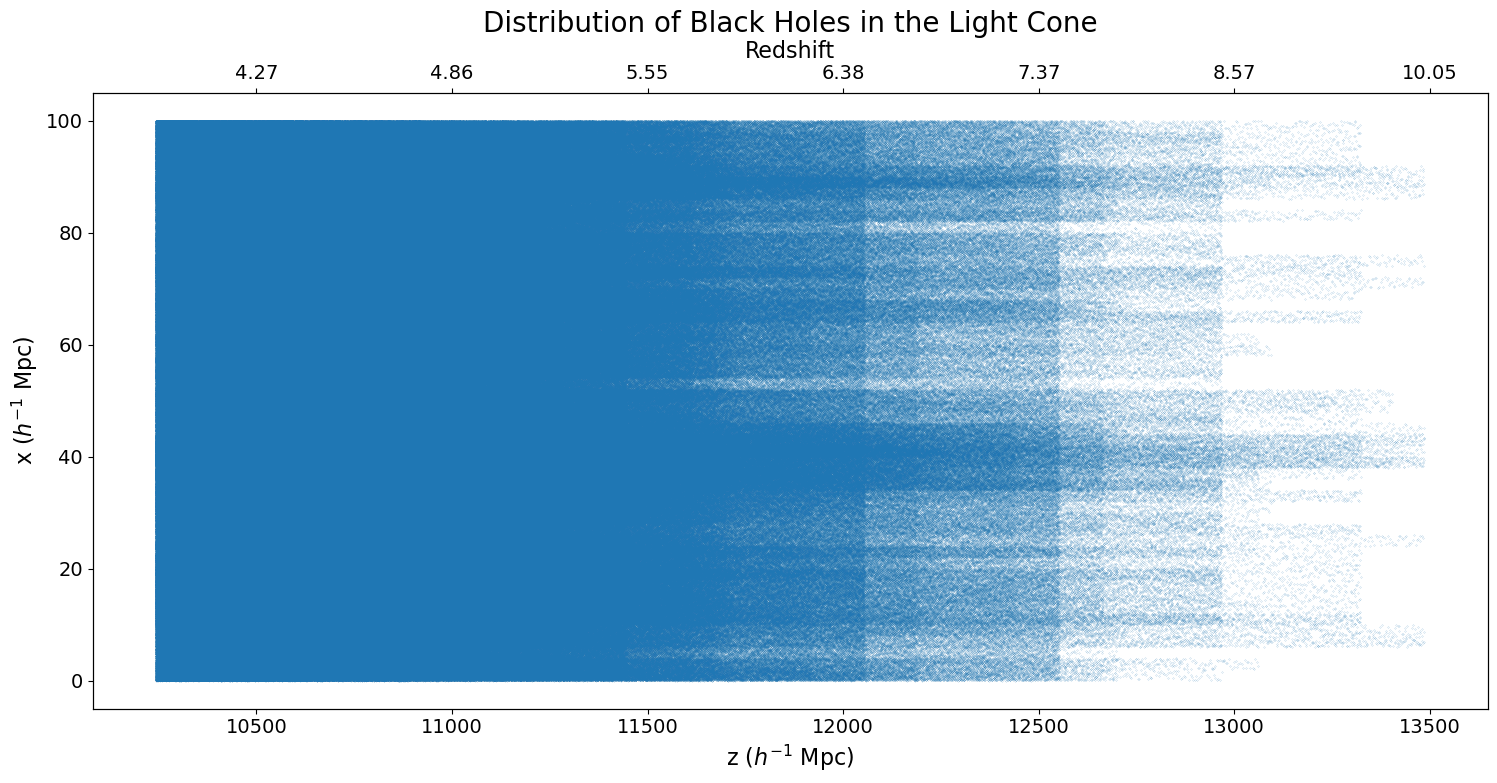

Total number of black holes in the light cone: 4956387


In [4]:
# Load the light cone data from the file and plot the distribution of black holes in the light cone.
# I want the plot to be a 2d scatter plot of the x, z coordinates of the black holes in the light cone.

import matplotlib.pyplot as plt
from astropy.cosmology import z_at_value
from astropy import units as u
import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
# Define h
h = 0.7

# Load the light cone data from the file
bh_coordinates = np.load(DATA_DIRECTORY + 'bh_coordinates_lightcone.npy')

# Set global font size
plt.rcParams.update({'font.size': 14})

# Plot the distribution of black holes in the light cone with x in the vertical axis and z in the horizontal axis.
# Make a figure which is longer in the horizontal direction.
fig, ax1 = plt.subplots(figsize=(18, 8))
ax1.scatter(bh_coordinates[:, 2], bh_coordinates[:, 0], s=0.01)
ax1.set_xlabel(r'z ($h^{-1}$ Mpc)', fontsize=16)
ax1.set_ylabel(r'x ($h^{-1}$ Mpc)', fontsize=16)
ax1.set_title('Distribution of Black Holes in the Light Cone', fontsize=20)

# Make a second axis on top of the plot to show the redshifts corresponding to the z coordinates. I need the same number of ticks as the first axis but the 
# tick labels should be the redshifts corresponding to the z coordinates.
ax2 = ax1.twiny()
ax2.set_xlabel('Redshift', fontsize=16)

# Get the limits of the ax1 axis
ax1_xlims = ax1.get_xlim()

# Set the limits of the ax2 axis to be the same as the ax1 axis
ax2.set_xlim(ax1_xlims)

# Extract the current xtick labels
xticks = ax1.get_xticks()
# Convert the xticks to redshifts just in numbers
redshifts = [np.round(z_at_value(cosmo.comoving_distance, dist * h * u.Mpc).value,2) for dist in xticks]
# Set the xticks and labels for the top axis
ax2.set_xticks(xticks[1:-1])
ax2.set_xticklabels(redshifts[1:-1], fontsize=14)

plt.show()

# Print the total number of black holes in the light cone
print(f'Total number of black holes in the light cone: {len(bh_coordinates)}')

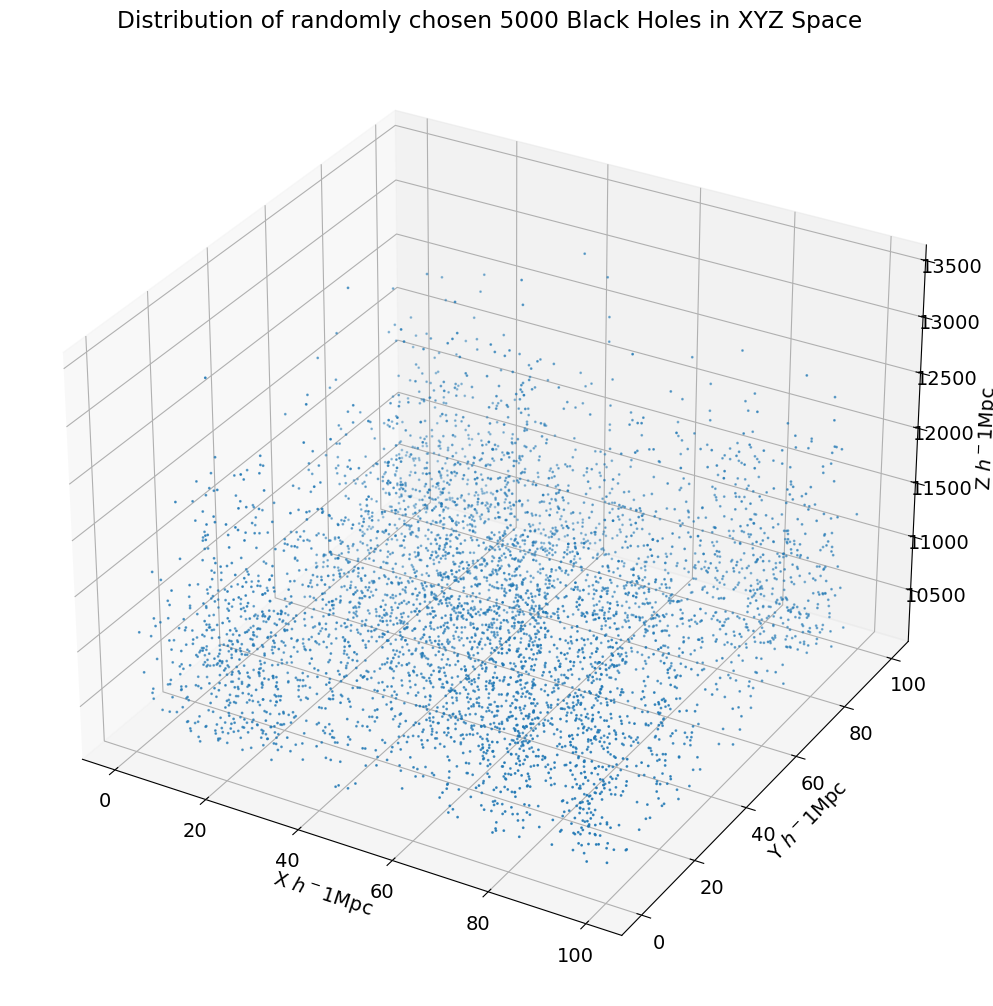

In [12]:
# Let's randomly select a subset of the black holes and plot the distribution in the x-y-z space.

# Define the number of black holes to show in the plot
num_black_holes = 5000

# randomly draw num_black_holes from the bh_coordinates
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Create a 3D scatter plot
fig = plt.figure(figsize=(15, 12)) # Increase figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, s=1)  # Decrease marker size

# Set labels and title
ax.set_xlabel(r'X $h^-1$Mpc')
ax.set_ylabel(r'Y $h^-1$Mpc')
ax.set_zlabel(r'Z $h^-1$Mpc', labelpad=10)
ax.set_title('Distribution of randomly chosen {} Black Holes in XYZ Space'.format(num_black_holes))

# # Adjust the padding
# plt.subplots_adjust(left=0.1, right=2.0, bottom=0.1, top=0.9)

# Show the plot
plt.show()

In [ ]:
# Let's randomly select a subset of the black holes and plot the distribution in the x-y-z space.

# Define the number of black holes to show in the plot
num_black_holes = 5000

# randomly draw num_black_holes from the bh_coordinates
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 12)) # Increase figure size
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coords, y_coords, z_coords, s=1)  # Decrease marker size

# Set labels and title
ax.set_xlabel(r'X $h^-1$Mpc')
ax.set_ylabel(r'Y $h^-1$Mpc')
ax.set_zlabel(r'Z $h^-1$Mpc')
ax.set_title('Distribution of randomly chosen {} Black Holes in XYZ Space'.format(num_black_holes))


# Show the plot
plt.show()

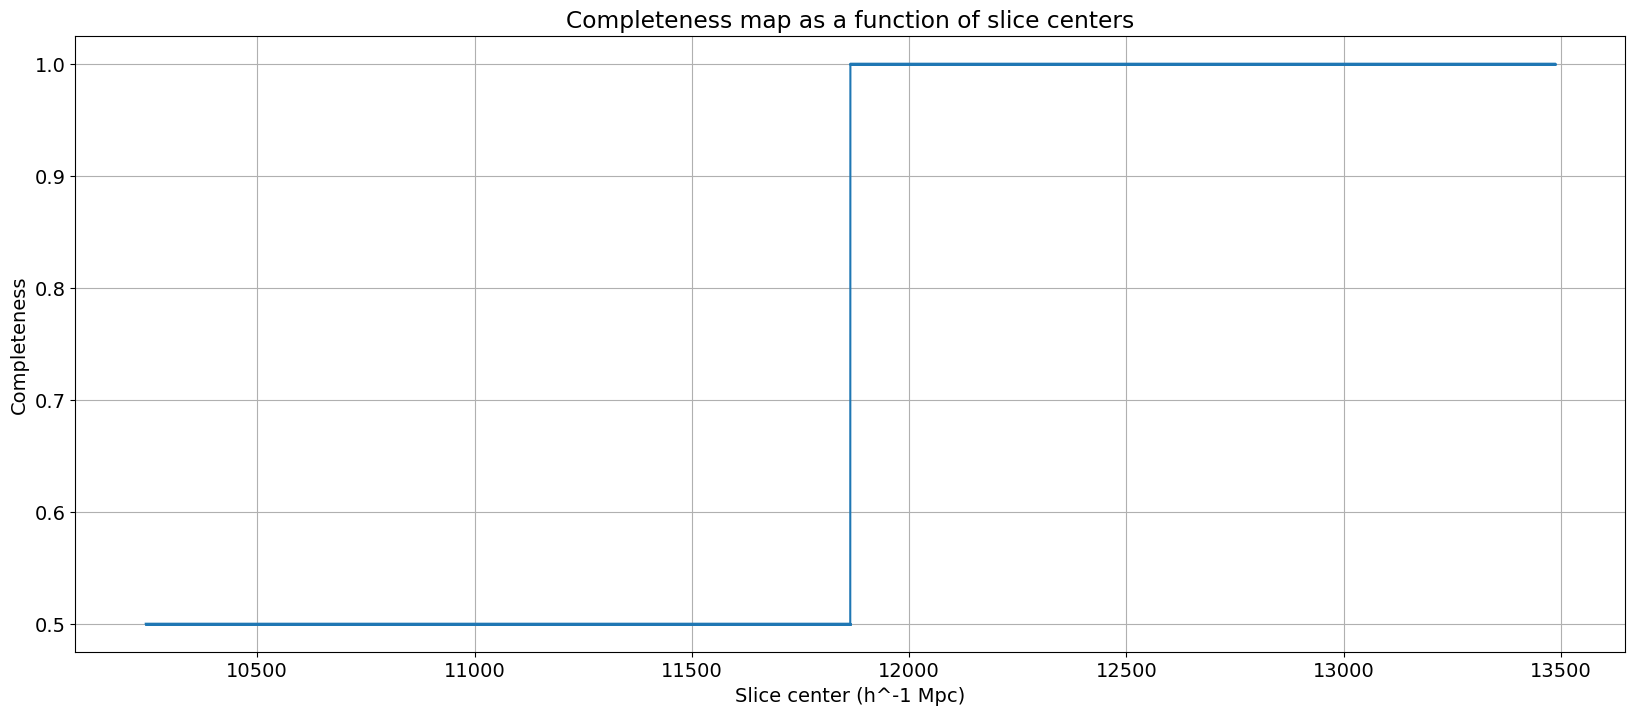

In [13]:
# I want to make a completeness map of the light cone constructed. Basically it is a function of z, which gives the fraction of the black holes in the light cone that are detected at a given redshift.
# First we have to bin the z axis into slices of 0.1 h^-1 Mpc, inorder to assign incompleteness to each slice.

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value / h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value / h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# # Define the completeness map as a function of slice centers, completeness is a random number between 0 and 1.
# # Assign the first half of slices values between 0 and 0.5 and the second half values between 0.5 and 1.
# completeness_map = np.zeros(num_slices)
# completeness_map[:num_slices//2] = np.random.uniform(0, 0.5, num_slices//2)
# completeness_map[num_slices//2:] = np.random.uniform(0.5, 1, num_slices - num_slices//2)

# Define the completeness map as a function of slice centers. Completeness is a number between 0 and 1.
# Assign the first half of slices value 0.5 and the second half value 1.
completeness_map = np.zeros(num_slices)
completeness_map[:num_slices//2] = 0.5
completeness_map[num_slices//2:] = 1 

# Now I want to plot the completeness map as a function of the slice centers.

# Plot the completeness map as a function of the slice centers
plt.figure(figsize=(20, 8))
plt.plot(slice_centers, completeness_map, marker='.', linestyle='-', markersize=1)
plt.xlabel('Slice center (h^-1 Mpc)')
plt.ylabel('Completeness')
plt.title('Completeness map as a function of slice centers')
plt.grid(True)
plt.show()

Number of selected black holes: 17661


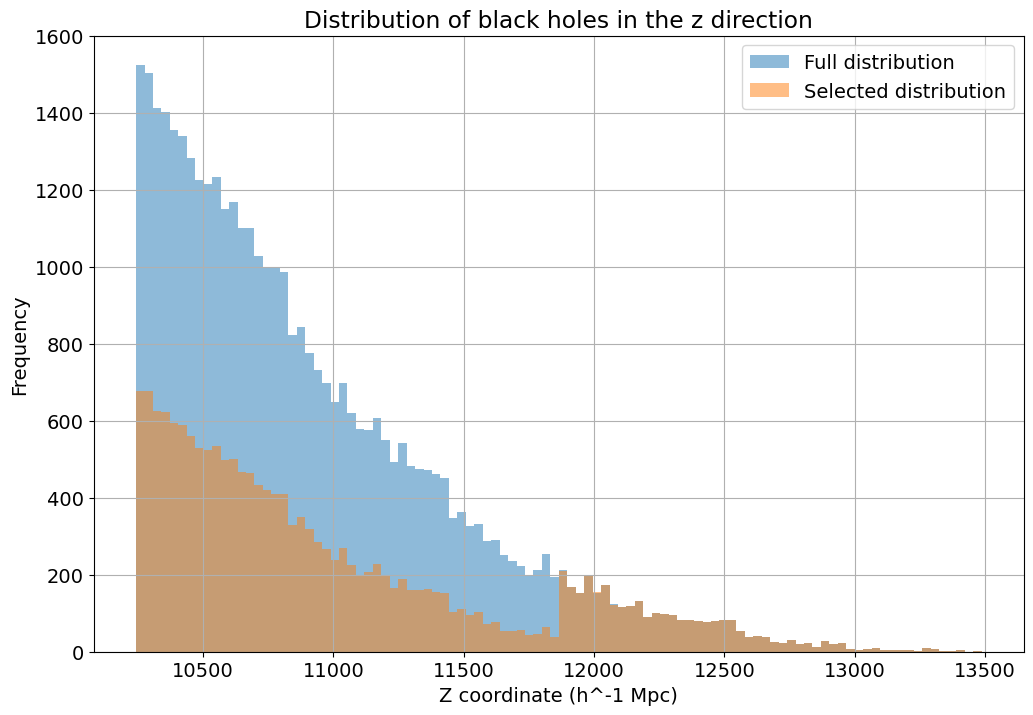

In [14]:
# Completenss map is basically the number of black holes that are selected from the given slice out of the total black holes in the slice.
# x_coords, y_coords, z_coords are the coordinates of the black holes in the light cone constructed.
# I want to find the slice to which each black hole belongs and choose randomly a fraction of black holes from each slice according to the completeness map.

# Import the kernel density estimation function from scikit-learn
from sklearn.neighbors import KernelDensity
# Import the DD function from Corrfunc
from Corrfunc.theory.DD import DD

# Import the black hole coordinates from the file
bh_coordinates = np.load(DATA_DIRECTORY + 'bh_coordinates_lightcone.npy')

# Define the number of black holes to choose for the subset
num_black_holes = 40000

# randomly draw num_black_holes from the bh_coordinates
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Define the subset of black holes to use for the correlation function
bh_pos_x = x_coords
bh_pos_y = y_coords
bh_pos_z = z_coords

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value / h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value / h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Assign each black hole to a slice based on its z coordinate
slice_indices = np.digitize(z_coords, slice_z_coords[1:], right=True)

# Choose a fraction of black holes from each slice based on the completeness map
selected_bh_indices = []
for i in range(1, num_slices + 1):
    slice_bh_indices = np.where(slice_indices == i)[0]
    num_bh_in_slice = len(slice_bh_indices)
    num_selected_bh = int(completeness_map[i - 1] * num_bh_in_slice)
    selected_slice_bh_indices = np.random.choice(slice_bh_indices, num_selected_bh, replace=False)
    selected_bh_indices.extend(selected_slice_bh_indices)

# Get the selected black hole coordinates
selected_bh_coordinates = random_bh_coordinates[selected_bh_indices]

# Get the z coordinates of the selected black holes
selected_z_coords = selected_bh_coordinates[:, 2]

# Get the x and y coordinates of the selected black holes
selected_x_coords = selected_bh_coordinates[:, 0]
selected_y_coords = selected_bh_coordinates[:, 1]

# Print the number of selected black holes
print(f'Number of selected black holes: {len(selected_bh_coordinates)}')

# Now I want to plot the distribution of the selected black holes in z direction and compare it with the full distribution.

# Create a histogram of the z coordinates of the selected black holes
plt.figure(figsize=(12, 8))
plt.hist(z_coords, bins=100, alpha=0.5, label='Full distribution')
plt.hist(selected_z_coords, bins=100, alpha=0.5, label='Selected distribution')
plt.xlabel('Z coordinate (h^-1 Mpc)')
plt.ylabel('Frequency')
plt.title('Distribution of black holes in the z direction')
plt.legend()
plt.grid(True)
plt.show()

# Now I want to calculate the correlation function using the selected black holes and compare it with the correlation function using all black holes.
# Full balck holes correlation function.

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 10 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc30k_2.csv', index=False)

# Selected black holes correlation function.

bh_pos_x = selected_x_coords
bh_pos_y = selected_y_coords
bh_pos_z = selected_z_coords

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 10 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc30k_2_incomp.csv', index=False)

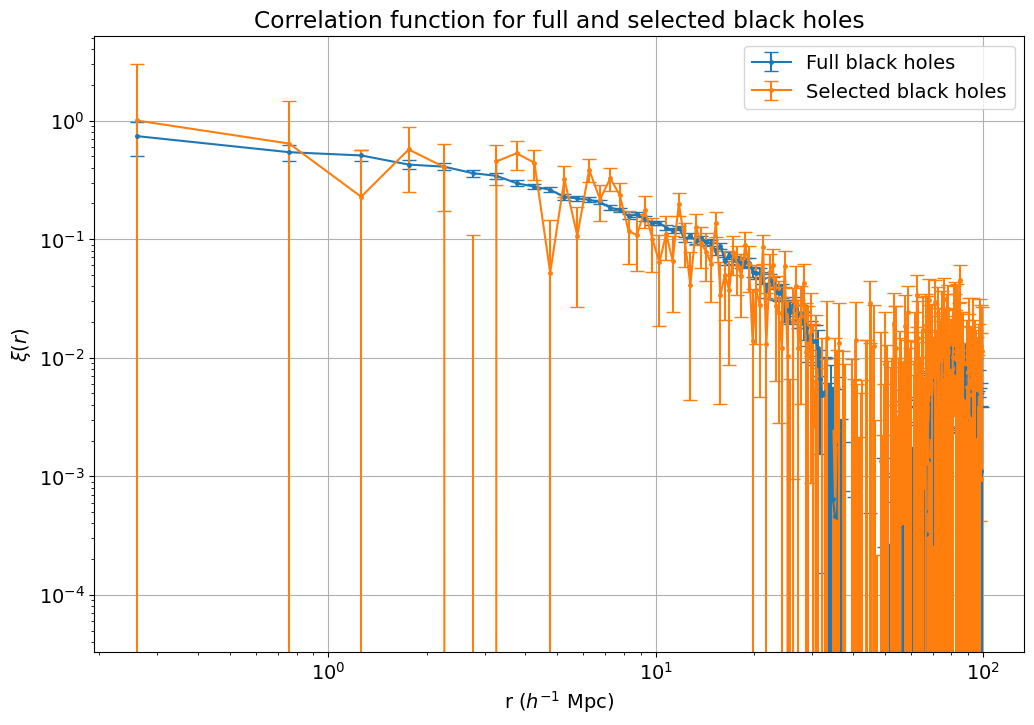

In [19]:
# Let's plot the correlation function for the full and selected black holes.

# Import pandas
import pandas as pd

# Load the correlation function data
corrfunc_full = pd.read_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc40k.csv')
corrfunc_selected = pd.read_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc40k_incomp.csv')

# Find the midpoint of each bin, as r_mid = (r_min + r_max) / 2
corrfunc_full['r mid'] = (corrfunc_full['r min'] + corrfunc_full['r max']) / 2
corrfunc_selected['r mid'] = (corrfunc_selected['r min'] + corrfunc_selected['r max']) / 2

# Plot the correlation function for the full and selected black holes
plt.figure(figsize=(12, 8))
plt.errorbar(corrfunc_full['r mid'], corrfunc_full['Landy Szalay'], yerr=corrfunc_full['Pois Error'], label='Full black holes', fmt='.-', markersize=5, capsize=5)
plt.errorbar(corrfunc_selected['r mid'], corrfunc_selected['Landy Szalay'], yerr=corrfunc_selected['Pois Error'], label='Selected black holes', fmt='.-', markersize=5, capsize=5)
plt.xlabel(r'r ($h^{-1}$ Mpc)')
plt.ylabel(r'$\xi(r)$')
plt.title('Correlation function for full and selected black holes')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()


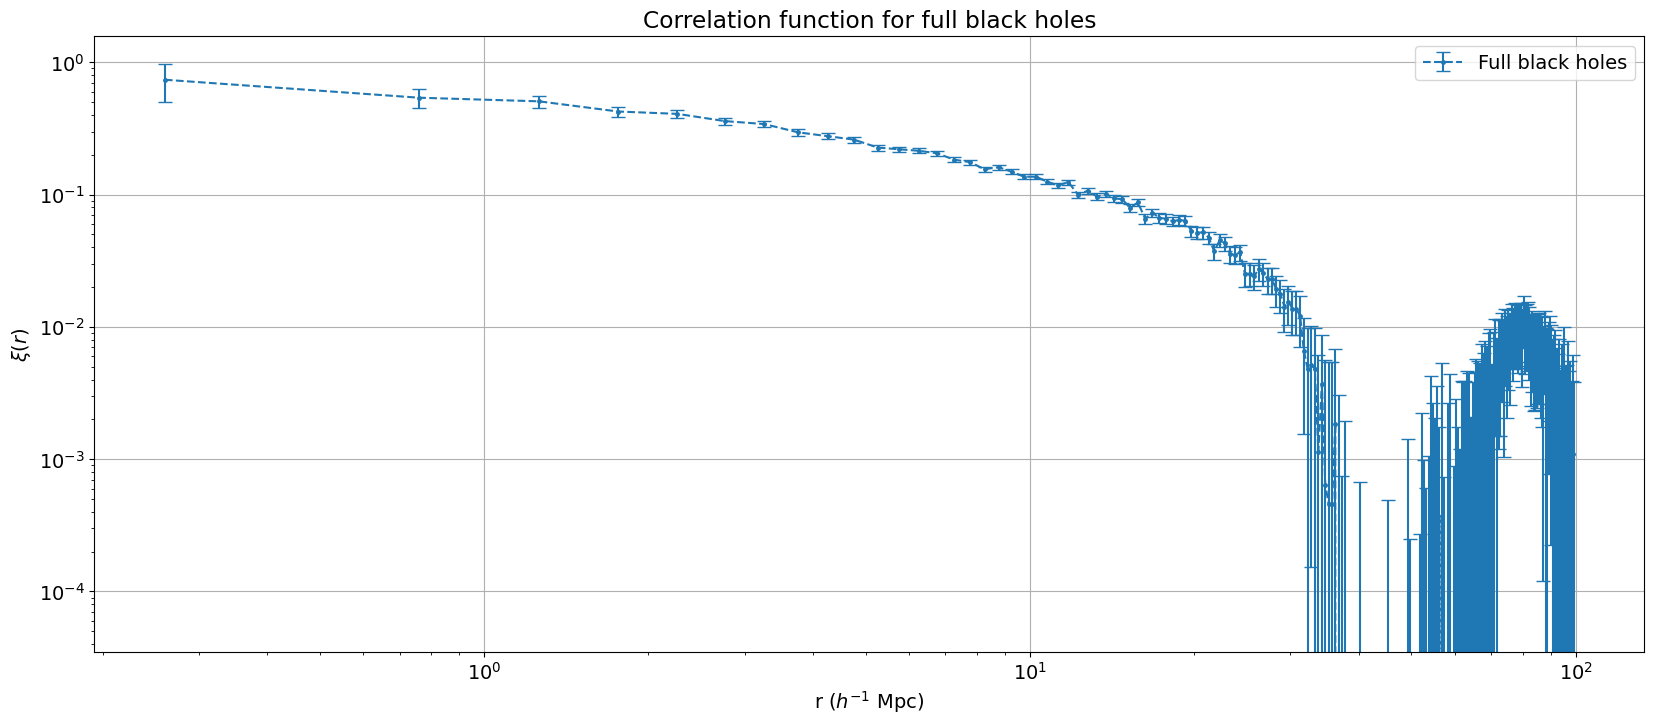

In [20]:
# Show me just the full black holes correlation function.

# Plot the correlation function for the full black holes
plt.figure(figsize=(20, 8))
plt.errorbar(corrfunc_full['r mid'], corrfunc_full['Landy Szalay'], yerr=corrfunc_full['Pois Error'], label='Full black holes', fmt='.--', markersize=5, capsize=5)
plt.xlabel(r'r ($h^{-1}$ Mpc)')
plt.ylabel(r'$\xi(r)$')
plt.title('Correlation function for full black holes')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

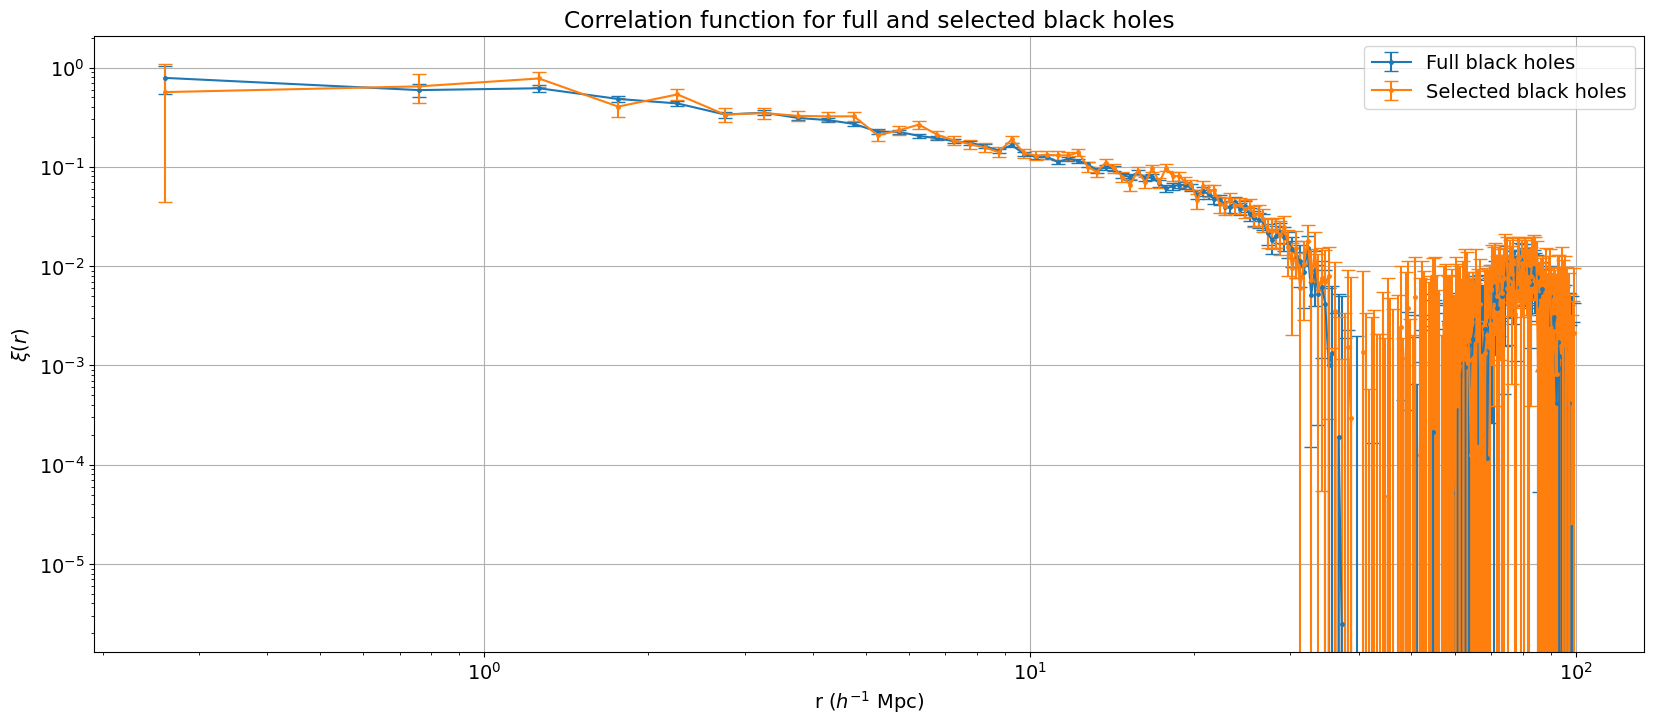

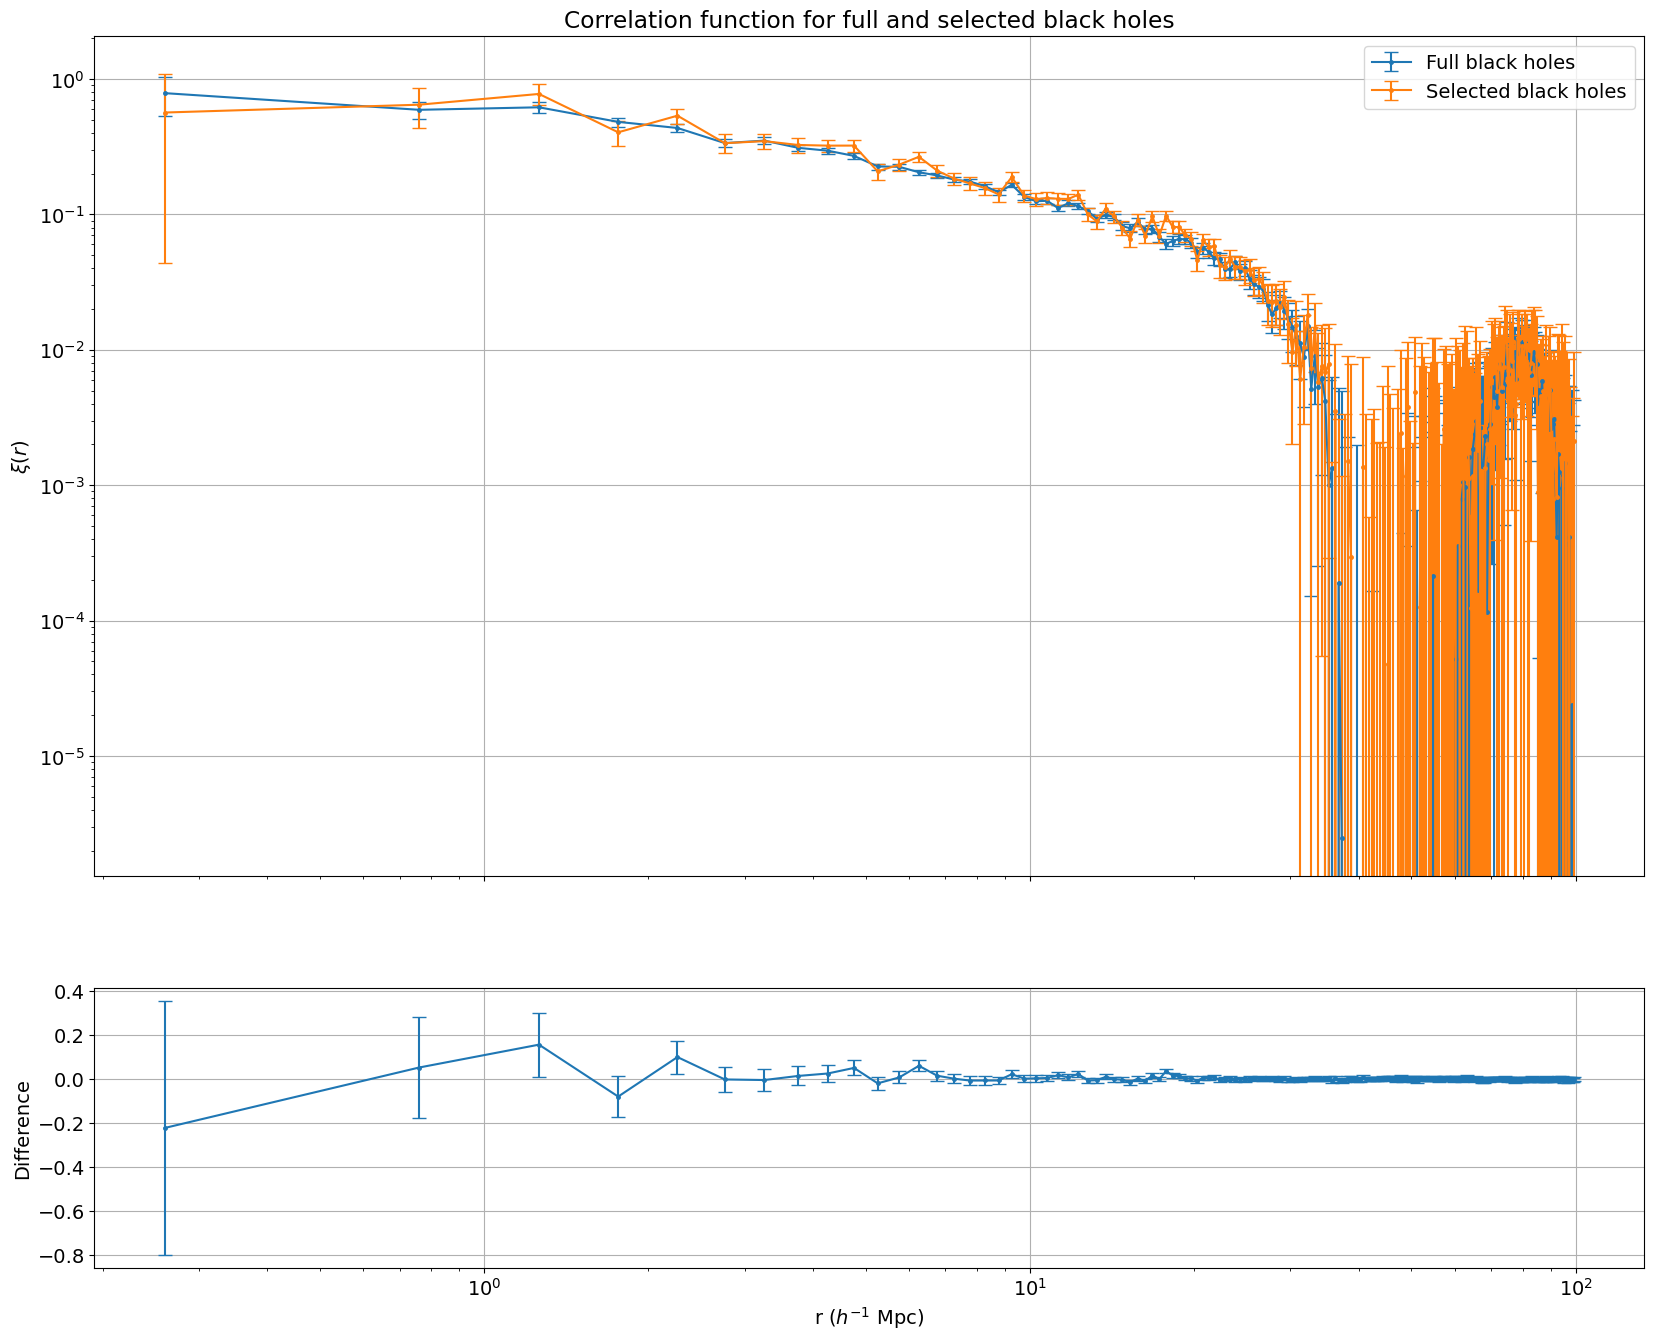

In [15]:
# Let's plot the correlation function for the full and selected black holes.

# Import pandas
import pandas as pd

# Set the default font size
plt.rcParams['font.size'] = 14

# Load the correlation function data
corrfunc_full = pd.read_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc30k_2.csv')
corrfunc_selected = pd.read_csv(DATA_DIRECTORY + 'MBIILighConeCorrfunc30k_2_incomp.csv')

# Find the midpoint of each bin, as r_mid = (r_min + r_max) / 2
corrfunc_full['r mid'] = (corrfunc_full['r min'] + corrfunc_full['r max']) / 2
corrfunc_selected['r mid'] = (corrfunc_selected['r min'] + corrfunc_selected['r max']) / 2

# Plot the correlation function for the full and selected black holes
plt.figure(figsize=(20, 8))
plt.errorbar(corrfunc_full['r mid'], corrfunc_full['Landy Szalay'], yerr=corrfunc_full['Pois Error'], label='Full black holes', fmt='.-', markersize=5, capsize=5)
plt.errorbar(corrfunc_selected['r mid'], corrfunc_selected['Landy Szalay'], yerr=corrfunc_selected['Pois Error'], label='Selected black holes', fmt='.-', markersize=5, capsize=5)
plt.xlabel(r'r ($h^{-1}$ Mpc)')
plt.ylabel(r'$\xi(r)$')
plt.title('Correlation function for full and selected black holes')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Make a subplot on the bottom showing difference between the two correlation functions.

# Plot the correlation function for the full and selected black holes
fig, ax = plt.subplots(2, 1, figsize=(20, 16), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(corrfunc_full['r mid'], corrfunc_full['Landy Szalay'], yerr=corrfunc_full['Pois Error'], label='Full black holes', fmt='.-', markersize=5, capsize=5)
ax[0].errorbar(corrfunc_selected['r mid'], corrfunc_selected['Landy Szalay'], yerr=corrfunc_selected['Pois Error'], label='Selected black holes', fmt='.-', markersize=5, capsize=5)
ax[0].set_ylabel(r'$\xi(r)$')
ax[0].set_title('Correlation function for full and selected black holes')
ax[0].legend()
ax[0].grid(True)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

# Calculate the difference between the two correlation functions
diff = corrfunc_selected['Landy Szalay'] - corrfunc_full['Landy Szalay']
err = np.sqrt(corrfunc_selected['Pois Error']**2 + corrfunc_full['Pois Error']**2)

# Plot the difference between the two correlation functions
ax[1].errorbar(corrfunc_full['r mid'], diff, yerr=err, fmt='.-', markersize=5, capsize=5)
ax[1].set_xlabel(r'r ($h^{-1}$ Mpc)')
ax[1].set_ylabel('Difference')
ax[1].grid(True)
# ax[1].set_xscale('log')

plt.show()


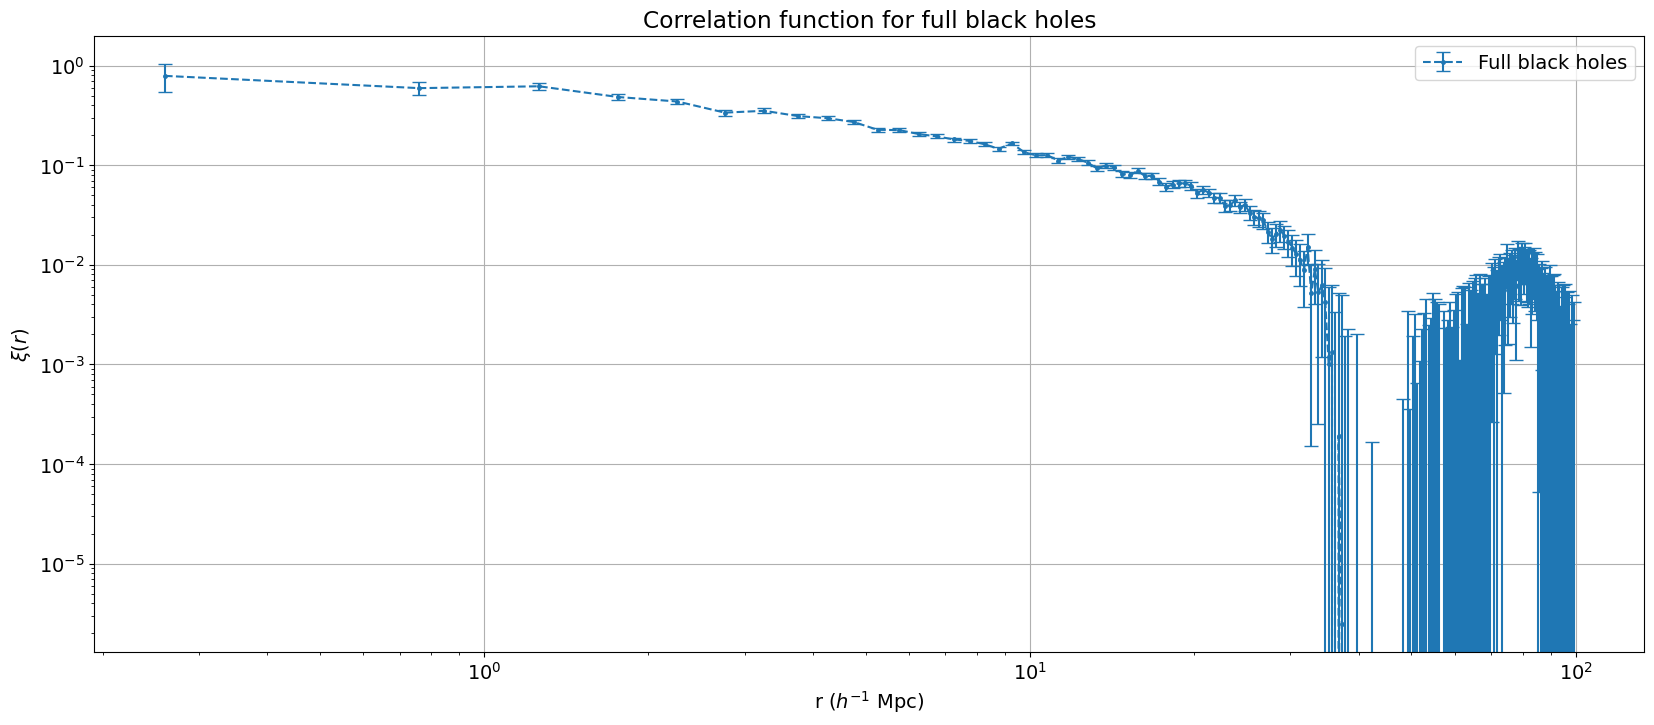

In [18]:
# Show me just the full black holes correlation function.

# Plot the correlation function for the full black holes
plt.figure(figsize=(20, 8))
plt.errorbar(corrfunc_full['r mid'], corrfunc_full['Landy Szalay'], yerr=corrfunc_full['Pois Error'], label='Full black holes', fmt='.--', markersize=5, capsize=5)
plt.xlabel(r'r ($h^{-1}$ Mpc)')
plt.ylabel(r'$\xi(r)$')
plt.title('Correlation function for full black holes')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

## Let's make various incompleteness maps

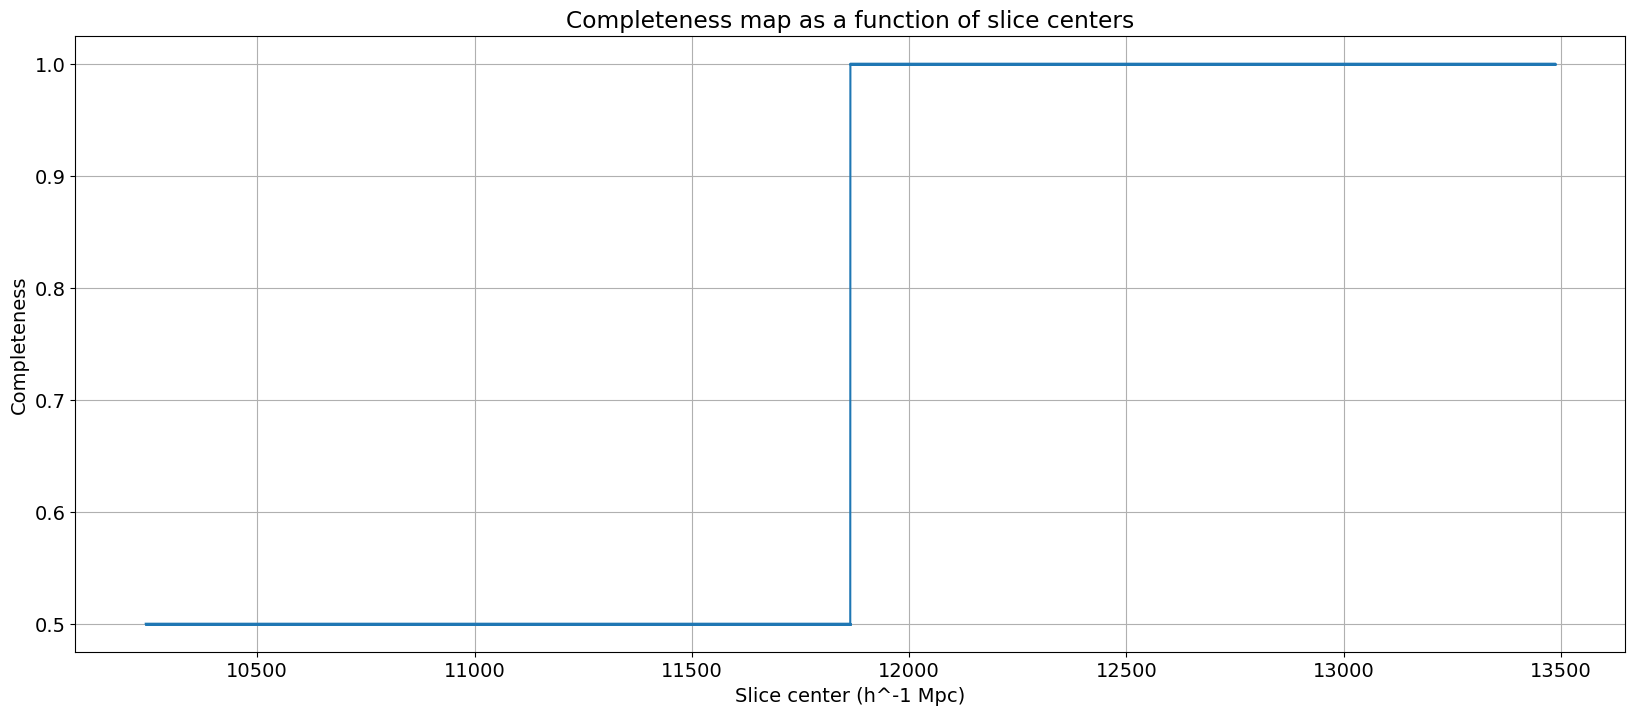

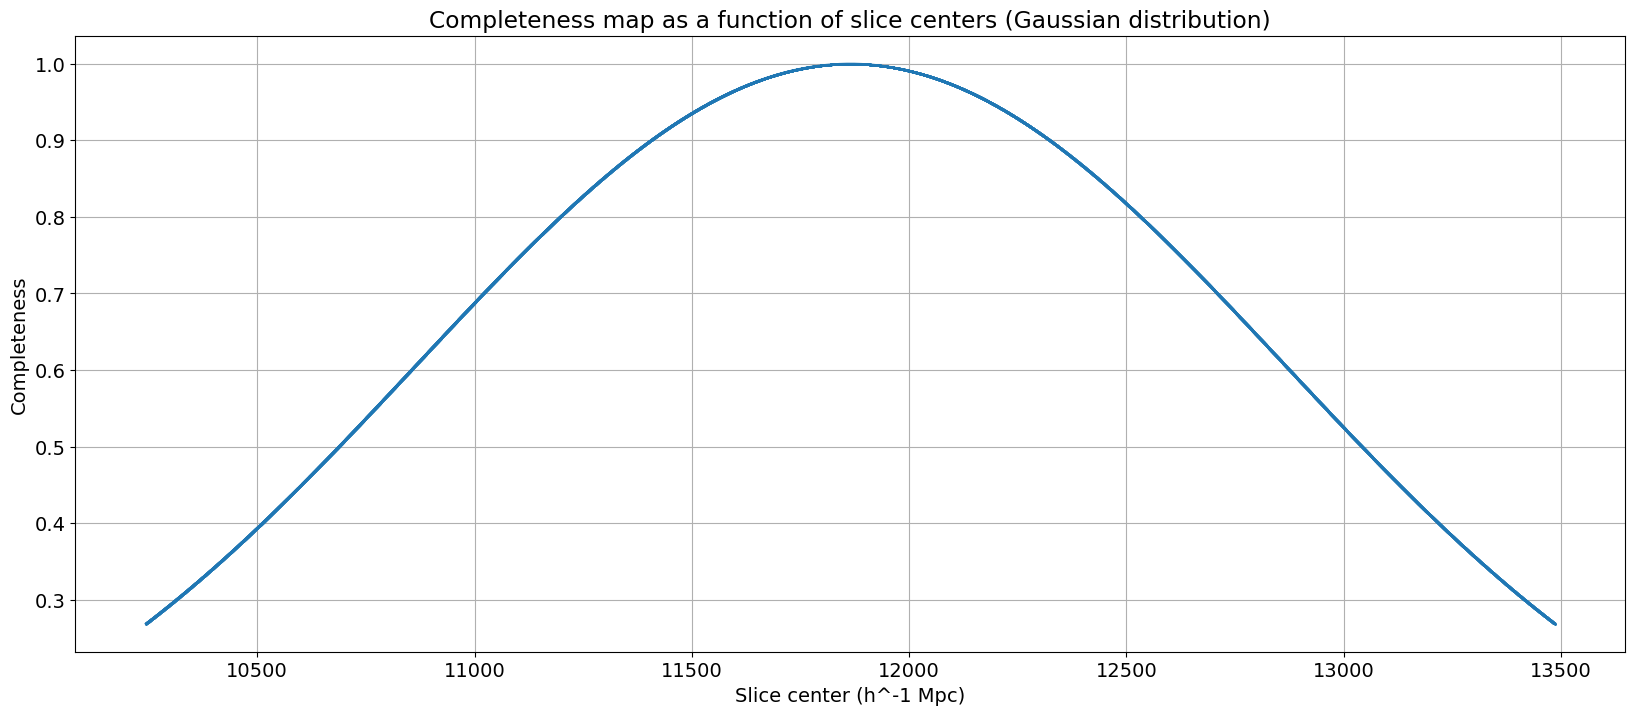

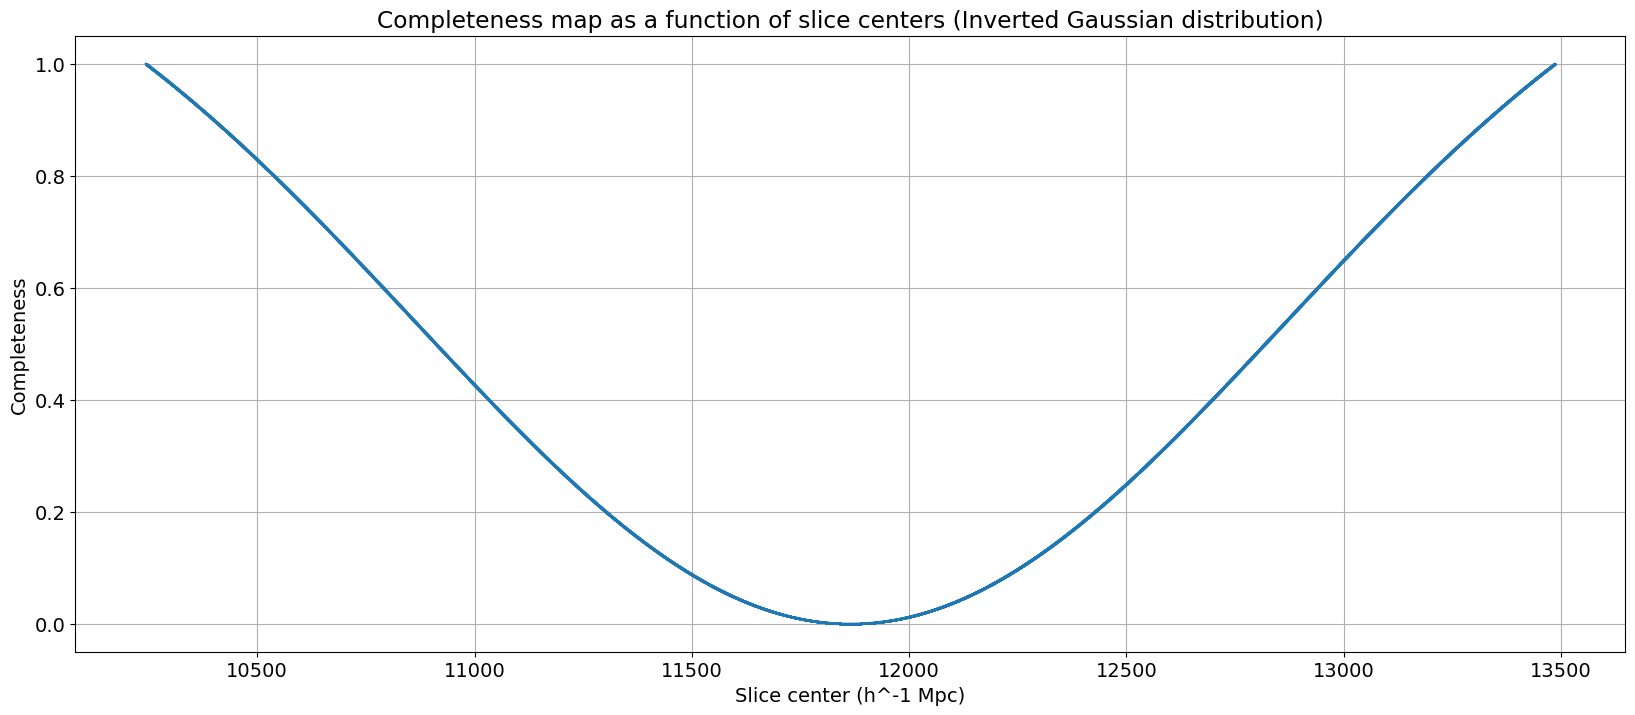

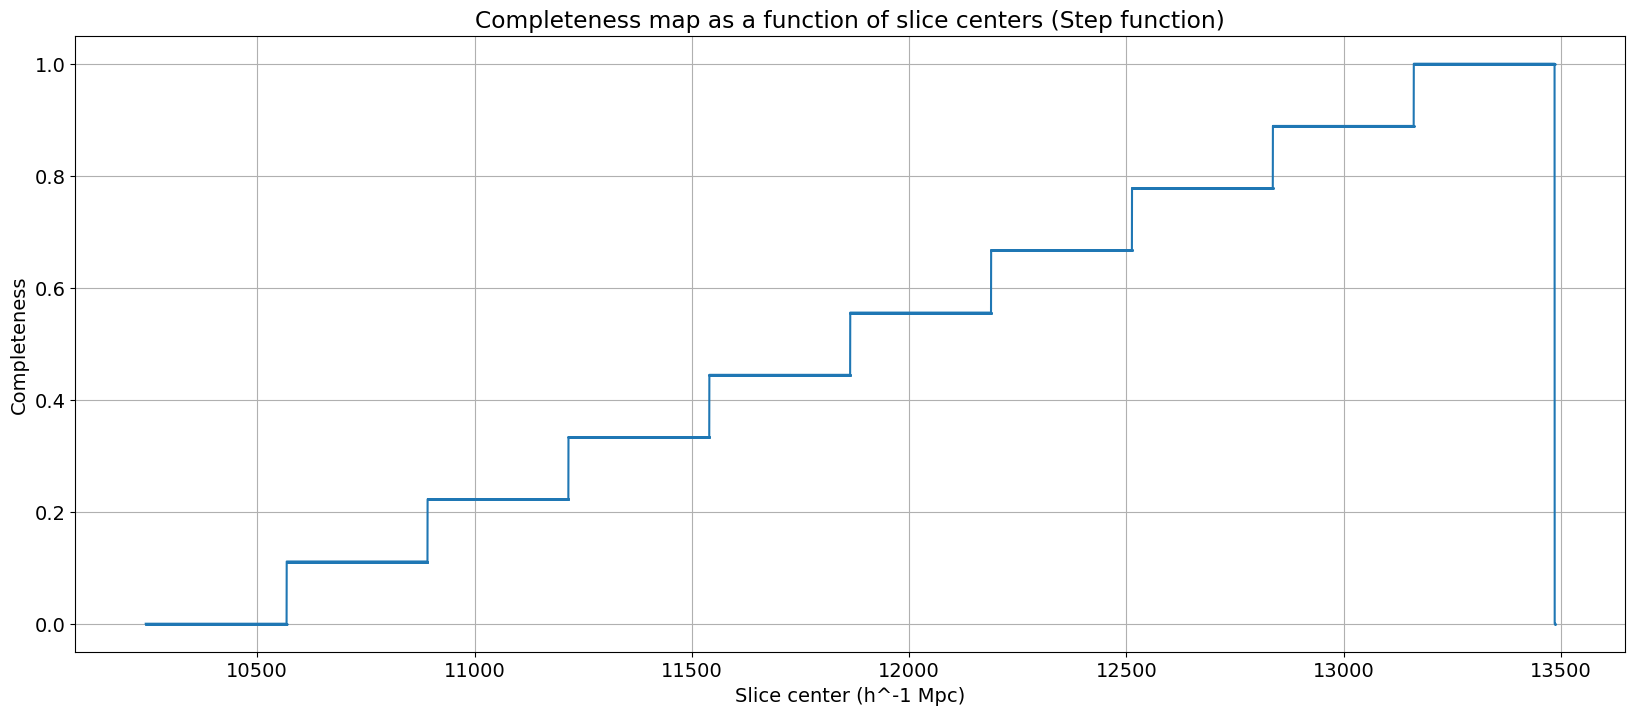

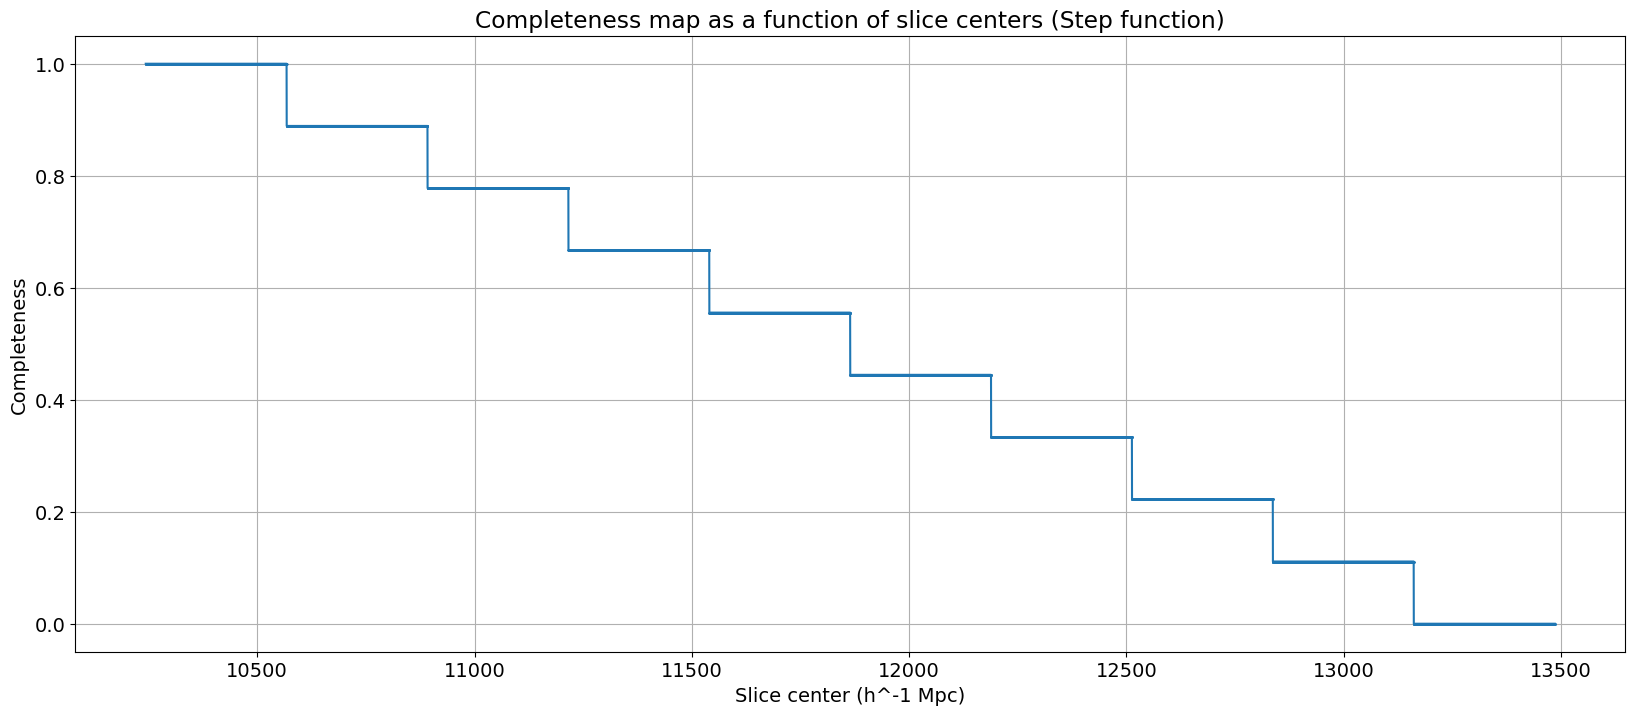

In [2]:
# I want to make a completeness map of the light cone constructed. Basically it is a function of z, which gives the fraction of the black holes in the light cone that are detected at a given redshift.
# First we have to bin the z axis into slices of 0.1 h^-1 Mpc, inorder to assign incompleteness to each slice.

import matplotlib.pyplot as plt
from astropy.cosmology import z_at_value
from astropy import units as u
import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Set the default font size
plt.rcParams['font.size'] = 14

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
# Define h
h = 0.7

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value / h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value / h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# # Define the completeness map as a function of slice centers, completeness is a random number between 0 and 1.
# # Assign the first half of slices values between 0 and 0.5 and the second half values between 0.5 and 1.
# completeness_map = np.zeros(num_slices)
# completeness_map[:num_slices//2] = np.random.uniform(0, 0.5, num_slices//2)
# completeness_map[num_slices//2:] = np.random.uniform(0.5, 1, num_slices - num_slices//2)

# Define the completeness map as a function of slice centers. Completeness is a number between 0 and 1.
# Assign the first half of slices value 0.5 and the second half value 1.
completeness_map = np.zeros(num_slices)
completeness_map[:num_slices//2] = 0.5
completeness_map[num_slices//2:] = 1

# I want to save the completeness map to a .npy file in the data directory so that I can use it in the future.
# I want to save the numpy array to a file using np.save() function.

# Save the completeness map to a file
np.save(DATA_DIRECTORY + 'completeness_map_step1.npy', completeness_map)

# Now I want to plot the completeness map as a function of the slice centers.

# Plot the completeness map as a function of the slice centers
plt.figure(figsize=(20, 8))
plt.plot(slice_centers, completeness_map, marker='.', linestyle='-', markersize=1)
plt.xlabel('Slice center (h^-1 Mpc)')
plt.ylabel('Completeness')
plt.title('Completeness map as a function of slice centers')
plt.grid(True)
plt.show()


# Now let's make another completeness map. I want the completenss map to look like a gaussian distribution. We already have slice_centers which is the center of the slices.
# I want to make a gaussian distribution centered at the center of the slices with a standard deviation of 0.1 h^-1 Mpc.

# Define the standard deviation of the gaussian distribution
sigma = 1000

# Calculate the completeness map as a gaussian distribution centered at the slice centers
completeness_map_gaussian = np.exp(-0.5 * ((slice_centers - slice_centers.mean()) / sigma) ** 2)

# Normalize the completeness map
completeness_map_gaussian /= completeness_map_gaussian.max()

# I want to save the completeness map to a .npy file in the data directory so that I can use it in the future.
# I want to save the numpy array to a file using np.save() function.

# Save the completeness map to a file
np.save(DATA_DIRECTORY + 'completeness_map_gauss.npy', completeness_map_gaussian)

# Now I want to plot the completeness map as a function of the slice centers.

# Plot the completeness map as a function of the slice centers
plt.figure(figsize=(20, 8))
plt.plot(slice_centers, completeness_map_gaussian, marker='.', linestyle='-', markersize=1)
plt.xlabel('Slice center (h^-1 Mpc)')
plt.ylabel('Completeness')
plt.title('Completeness map as a function of slice centers (Gaussian distribution)')
plt.grid(True)
plt.show()

# Now let's make another completeness map. I want the completenss map to look like an inverted gaussian distribution. We already have slice_centers which is the center of the slices.
# I want to make an inverted gaussian distribution centered at the center of the slices with a standard deviation of 1000 h^-1 Mpc.

# Define the standard deviation of the gaussian distribution
sigma = 1000

# Calculate the completeness map as an inverted gaussian distribution centered at the slice centers
completeness_map_inverted_gaussian = 1 - np.exp(-0.5 * ((slice_centers - slice_centers.mean()) / sigma) ** 2)

# Normalize the completeness map
completeness_map_inverted_gaussian /= completeness_map_inverted_gaussian.max()

# I want to save the completeness map to a .npy file in the data directory so that I can use it in the future.
# I want to save the numpy array to a file using np.save() function.

# Save the completeness map to a file
np.save(DATA_DIRECTORY + 'completeness_map_inv_gauss.npy', completeness_map_inverted_gaussian)

# Now I want to plot the completeness map as a function of the slice centers.

# Plot the completeness map as a function of the slice centers
plt.figure(figsize=(20, 8))
plt.plot(slice_centers, completeness_map_inverted_gaussian, marker='.', linestyle='-', markersize=1)
plt.xlabel('Slice center (h^-1 Mpc)')
plt.ylabel('Completeness')
plt.title('Completeness map as a function of slice centers (Inverted Gaussian distribution)')
plt.grid(True)
plt.show()

# Now let's make another completeness map. I want the completenss map to look like a step function with multiple steps. We already have slice_centers which is the center of the slices.

# Define the number of steps
num_steps = 10

# Calculate the completeness map as a step function with multiple steps
completeness_map_steps = np.zeros(num_slices)
step_size = num_slices // num_steps

for i in range(num_steps):
    completeness_map_steps[i * step_size:(i + 1) * step_size] = i / (num_steps - 1)

# I want to save the completeness map to a .npy file in the data directory so that I can use it in the future.
# I want to save the numpy array to a file using np.save() function.

# Save the completeness map to a file
np.save(DATA_DIRECTORY + 'completeness_map_ladder1.npy', completeness_map_steps)

# Now I want to plot the completeness map as a function of the slice centers.

# Plot the completeness map as a function of the slice centers
plt.figure(figsize=(20, 8))
plt.plot(slice_centers, completeness_map_steps, marker='.', linestyle='-', markersize=1)
plt.xlabel('Slice center (h^-1 Mpc)')
plt.ylabel('Completeness')
plt.title('Completeness map as a function of slice centers (Step function)')
plt.grid(True)
plt.show()


# Now let's make another completeness map. I want the completenss map to look like a step function with multiple steps. We already have slice_centers which is the center of the slices.

# Define the number of steps
num_steps = 10

# Calculate the completeness map as a step function with multiple steps
completeness_map_steps = np.zeros(num_slices)
step_size = num_slices // num_steps

for i in range(num_steps):
    completeness_map_steps[i * step_size:(i + 1) * step_size] = (num_steps - i - 1) / (num_steps - 1)

# I want to save the completeness map to a .npy file in the data directory so that I can use it in the future.
# I want to save the numpy array to a file using np.save() function.

# Save the completeness map to a file
np.save(DATA_DIRECTORY + 'completeness_map_ladder2.npy', completeness_map_steps)

# Now I want to plot the completeness map as a function of the slice centers.

# Plot the completeness map as a function of the slice centers
plt.figure(figsize=(20, 8))
plt.plot(slice_centers, completeness_map_steps, marker='.', linestyle='-', markersize=1)
plt.xlabel('Slice center (h^-1 Mpc)')
plt.ylabel('Completeness')
plt.title('Completeness map as a function of slice centers (Step function)')
plt.grid(True)
plt.show()

## How can I introduce luminostiy to the light cone? And how can it be used?

In [3]:
# 1) Load the 7 files which contains MBII black holes details in slices centered at 4, 5, 6, 7, 8, 9, 10 redshifts.
# 2) Extract the x, y, and z coordinates of the black holes.
# 3) Define the number of pixels in each dimension (50, 50, 1). and pixelated the data.
# 4) store each array which is n(x,y) for each redshift in a list called nz_arrays.


import numpy as np

file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

nz_arrays = []

for file_path in file_paths:
    # Load the data from the file
    data = np.loadtxt(file_path)
    
    # Extract the x, y, and z coordinates
    x_coordinates = data[:, 2]
    y_coordinates = data[:, 3]
    z_coordinates = data[:, 4]
    bh_lum = data[:, 8]

    # I want to introduce luminosity cuts at this point
    bh_lum_sol = bh_lum * 1.472 * 10 ** 12 # 1 M0/yr * 0.1 * c^2 equvialent to 1.472 x 10^12 L0

    ind_10_9 = np.where(bh_lum_sol > 10 ** 9)

    x_coordinates = x_coordinates[ind_10_9]
    y_coordinates = y_coordinates[ind_10_9]
    z_coordinates = z_coordinates[ind_10_9]
    
    # Define the number of pixels in each dimension
    num_pixels_x = 50
    num_pixels_y = 50
    num_pixels_z = 1
    
    # Calculate the pixel size in each dimension
    x_range = (0, 100000) #(np.min(x_coordinates), np.max(x_coordinates))
    y_range = (0, 100000) #(np.min(y_coordinates), np.max(y_coordinates))
    z_range = (-1444, 2080) #(np.min(z_coordinates), np.max(z_coordinates))
    
    pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
    pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y
    pixel_size_z = (z_range[1] - z_range[0]) / num_pixels_z
    
    # Calculate the pixel indices for each coordinate
    pixel_indices_x = ((x_coordinates - x_range[0]) / pixel_size_x).astype(int)
    pixel_indices_y = ((y_coordinates - y_range[0]) / pixel_size_y).astype(int)
    # pixel_indices_z = ((z_coordinates - z_range[0]) / pixel_size_z).astype(int)
    
    # Create an empty n(x, y, z) array
    n_array = np.zeros((num_pixels_x, num_pixels_y))
    
    # Count the number of particles in each pixel
    for i in range(len(x_coordinates)):
        n_array[pixel_indices_x[i], pixel_indices_y[i]] += 1
    
    nz_arrays.append(n_array)

# 5) convert the redshifts to comoving distances and interpolate the data using interp1d function.
# interp1d function now gives us the n(x, y) for any redshift z in the range 4 to 10.


from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Define the reduced Hubble constant
h = 0.7

# Define the redshifts
redshifts = [4, 5, 6, 7, 8, 9, 10]

# Calculate the comoving distances
new_z_axis = cosmo.comoving_distance(redshifts).value /h  # Convert to h^-1 Mpc

print(new_z_axis)

# Now we need to interpolate the data from the slices to the new z axis
import numpy as np
from scipy.interpolate import interp1d

f = interp1d(new_z_axis, nz_arrays, axis=0)

# 6) Now we need to make slices of n(x, y) which would cover the entire range of 4 - 10 redshifts.
# We use the same width of the slice of MBII data which is max_z - min_z = 3.524 h^-1 Mpc for our slices.
# Since the zero of the MBII data is not at the center of the slice, we follow the same convention for our slices.
# i.e we calculate the n(x, y) for each slice at z value, z - (max_z + min_z)/2 = 0.881 h^-1 Mpc.

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value / h
end_comoving = cosmo.comoving_distance(end_z).value / h

# Define the slice size
slice_size = 3.524  # h^-1 Mpc

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Calculate the coordinate (max_z + min_z)/2 = 0.881 h^-1 Mpc to the left of the center
slice_coords = slice_centers - 0.881

# Calculate the nz arrays for each slice
nz_slices = f(slice_coords)

# 7) Now using the n(x, y, z) we have created, we draw a distribution of black holes.
# the number of black holes drawn in each pixel is given by the value of n(x, y, z) in that pixel.
# black holes are randomly distributed in each pixel.

# Similar to slice_centers, I want to find the center of the pixels in the x and y directions.

# Define the number of pixels in each dimension
num_pixels_x = 50
num_pixels_y = 50
num_pixels_z = 2

# Calculate the pixel size in each dimension
x_range = (0, 100) #(np.min(x_coordinates), np.max(x_coordinates)) h^-1 Mpc
y_range = (0, 100) #(np.min(y_coordinates), np.max(y_coordinates))

# Calculate the pixel size in each dimension
pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y

# Calculate the pixel centers in the x and y directions
pixel_centers_x = np.linspace(x_range[0] + pixel_size_x / 2, x_range[1] - pixel_size_x / 2, num_pixels_x)
pixel_centers_y = np.linspace(y_range[0] + pixel_size_y / 2, y_range[1] - pixel_size_y / 2, num_pixels_y)

# Define the pixel center in the z direction
pixel_centers_z = slice_centers

# Now we have nz_slices as a 3d array which contains the n(x, y, z) which is the number of black holes in each pixel.
# given the number of black holes in each pixel, I want to randomly distribute black holes in each pixel according to the number of black holes in that pixel.
# I want to create an array that contains the x, y, z coordinates of each black hole that we have distributed.

# Define the number of black holes in each pixel
n_bh = nz_slices

# Initialize an empty list to store the black hole coordinates
bh_coordinates = []

# Iterate over the pixels and distribute the black holes
for k in range(num_slices):
    for i in range(num_pixels_x):
        for j in range(num_pixels_y):
            # Get the number of black holes in the current pixel
            n = round(n_bh[k, i, j])
            
            # Generate random x, y, z coordinates for the black holes in the pixel
            x_coords = np.random.uniform(low=pixel_centers_x[i] - pixel_size_x / 2, high=pixel_centers_x[i] + pixel_size_x / 2, size=n)
            y_coords = np.random.uniform(low=pixel_centers_y[j] - pixel_size_y / 2, high=pixel_centers_y[j] + pixel_size_y / 2, size=n)
            z_coords = np.random.uniform(low=pixel_centers_z[k] - slice_size / 2, high=pixel_centers_z[k] + slice_size / 2, size=n)
            
            # Append the coordinates to the list
            bh_coordinates.extend(list(zip(x_coords, y_coords, z_coords)))

# Convert the list of coordinates to a numpy array
bh_coordinates = np.array(bh_coordinates)

# This concludes the production of the light cone. bh_coordinates now consists of the x, y, z coordinates of the black holes in the light cone, extrapolated 
# from the MBII data.

[10243.38059209 11107.67213638 11781.31432606 12325.14617603
 12776.00740964 13157.63131888 13486.07089486]


KeyboardInterrupt: 

In [2]:
# Now I want to save the bh_coordinates to a file in the data directory so that I can use it in the future.
# I want to save the numpy array to a file using np.save() function.

# Import numpy
import numpy as np

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

# Save the bh_coordinates to a file
np.save(DATA_DIRECTORY + 'bh_coordinates_lightcone_gt10_9.npy', bh_coordinates)

# Now I want to load the bh_coordinates from the file and check if it is the same as the one we saved.
# I want to load the numpy array from the file using np.load() function.

# Load the bh_coordinates from the file
bh_coordinates_loaded = np.load(DATA_DIRECTORY + 'bh_coordinates_lightcone_gt10_9.npy')

# Check if the loaded array is the same as the original array
print(np.allclose(bh_coordinates, bh_coordinates_loaded))

NameError: name 'bh_coordinates' is not defined

In [3]:
# Let's say I have 100 Mpc of length which I call delta_z. I want to know what will be the corresponding redshift range for this length at a given redshift z.
# I want to calculate the redshift range for the length delta_z at redshift z.

from astropy.cosmology import FlatLambdaCDM
from astropy.cosmology import z_at_value
import astropy.units as u

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Define the redshift
z = 4

# Define the comoving distance
delta_z = 100  # h^-1 Mpc

# Calculate the comoving distance at redshift z
comoving_distance = cosmo.comoving_distance(z).value

# Now find the start and end comoing distances for the length delta_z
start_comoving = comoving_distance - delta_z / 2
end_comoving = comoving_distance + delta_z / 2

# Convert the start and end comoving distances to redshifts
start_z = z_at_value(cosmo.comoving_distance, start_comoving * u.Mpc)
end_z = z_at_value(cosmo.comoving_distance, end_comoving * u.Mpc)

# find the difference between the start and end redshifts
delta_z_range = end_z - start_z

print(start_z, end_z, delta_z_range)


3.928602259941936 redshift 4.072931220102771 redshift 0.14432896016083507 redshift


## Making the correction with z range

In [4]:
# 1) Load the 7 files which contains MBII black holes details in slices centered at 4, 5, 6, 7, 8, 9, 10 redshifts.
# 2) Extract the x, y, and z coordinates of the black holes.
# 3) Define the number of pixels in each dimension (50, 50, 1). and pixelated the data.
# 4) store each array which is n(x,y) for each redshift in a list called nz_arrays.


import numpy as np
import matplotlib.pyplot as plt
# Import the cosmology
from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Define the reduced Hubble constant
h = 0.7

file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

nz_arrays = []

for file_path in file_paths:
    # Load the data from the file
    data = np.loadtxt(file_path)
    
    # Extract the x, y, and z coordinates
    x_coordinates = data[:, 1]
    y_coordinates = data[:, 2]
    z_coordinates = data[:, 3]
    
    # Define the number of pixels in each dimension
    num_pixels_x = 50
    num_pixels_y = 50
    num_pixels_z = 50
    
    # Calculate the pixel size in each dimension
    x_range = (0, 100000) #(np.min(x_coordinates), np.max(x_coordinates))
    y_range = (0, 100000) #(np.min(y_coordinates), np.max(y_coordinates))
    z_range = (0, 100000) #(np.min(z_coordinates), np.max(z_coordinates))
    
    pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
    pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y
    pixel_size_z = (z_range[1] - z_range[0]) / num_pixels_z
    
    # Calculate the pixel indices for each coordinate
    pixel_indices_x = ((x_coordinates - x_range[0]) / pixel_size_x).astype(int)
    pixel_indices_y = ((y_coordinates - y_range[0]) / pixel_size_y).astype(int)
    pixel_indices_z = ((z_coordinates - z_range[0]) / pixel_size_z).astype(int)
    
    # Create an empty n(x, y, z) array
    n_array = np.zeros((num_pixels_x, num_pixels_y, num_pixels_z))
    
    # Count the number of particles in each pixel
    for i in range(len(x_coordinates)):
        n_array[pixel_indices_x[i], pixel_indices_y[i], pixel_indices_z[i]] += 1
    
    nz_arrays.append(n_array)

# Now each array in nz_arrays contains the n(x, y, z) for each redshift slice centered at 4, 5, 6, 7, 8, 9, 10.
# But I want to split each array into different arrays in z direction, each array will contain the n(x, y) for a given z value.
# Then assign the comoving distance to each slice since we know the pixel_size_z to be the length of each slice.indices

# First convert the redshifts to comoving distances
# Define the redshifts
redshifts = [4, 5, 6, 7, 8, 9, 10]

# Calculate the comoving distances
new_z_axis = cosmo.comoving_distance(redshifts).value * h  # Convert to h^-1 Mpc

# Split each array in nz_arrays into n(x, y)
nxy_arrays = []

for nz_array in nz_arrays:
    # Get the shape of the nz_array
    nz_shape = nz_array.shape
    
    # Split the nz_array along the z-axis
    nxy_slices = np.split(nz_array, nz_shape[2], axis=2)

    # Remove the unnecessary dimension
    nxy_slices = [np.squeeze(slice, axis=2) for slice in nxy_slices]
    
    # Append the n(x, y) slices to the nxy_arrays list
    nxy_arrays.extend(nxy_slices)

# convert nxy_arrays into numpy array
nxy_arrays = np.array(nxy_arrays)

# Now I want to assign the comoving distance to each slice in nxy_arrays. But inorder
# to do that I need to convert each point in new_z_axis into nz_shape[2] number of points.

# We have comoving distance for redshift 4 in new_z_axis. Now minus it by the pixel_size_z/2 to get the comoving distance for the 25th slice.
# Then add pixel_size_z to get the comoving distance for the 26th slice and so on.
# Thus in place of new_z_axis, we will have nz_shape[2] number of comoving distances for each redshift.

# Define the number of pixels in z direction
num_pixels_z = 50

# Calculate the pixel size in z direction
pixel_size_z = pixel_size_z/1000  # Convert to h^-1 Mpc

# Calculate the comoving distances for each slice
slice_comoving_distances = []

# Define an empty array for slice centers
slice_centers = []

# Calculate the length of box in z direction
z_length = (z_range[1] - z_range[0])/1000  # Convert to h^-1 Mpc

for z in new_z_axis:
    # Calculate the start comoving distance for the slice
    start_comoving = z - z_length / 2
    
    # Calculate the end comoving distance for the slice
    end_comoving = z + z_length / 2
    
    # Calculate the comoving distances for the slice
    slice_comoving_distances = np.linspace(start_comoving, end_comoving, num_pixels_z + 1)

    # Calculate the center of the slices and append to the slice_centers array
    slice_centers.extend((slice_comoving_distances[:-1] + slice_comoving_distances[1:]) / 2)

# Now we have the slice_centers array which contains the comoving distance for each slice in the z direction.
# Also have nxy_arrays which contains the n(x, y) corresponding to slice_centers.

# Now I want to interpolate the data in nxy_arrays to get the n(x, y) for any comoving distance in the range of slice_centers.
# I will use interp1d function for this purpose.
from scipy.interpolate import interp1d

# Interpolate the data in nxy_arrays
f = interp1d(slice_centers, nxy_arrays, axis=0)

# Now we have the interpolated data in f. We can use f to get the n(x, y) for any comoving distance in the range of slice_centers.
# Let's fill using f the range from start_z to end_z

# Define the start and end comoving distances
start_comoving = slice_centers[0]
end_comoving = slice_centers[-1]

# Divide this range into slices of pixel_size_z.
# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / pixel_size_z)

# Calculate the comoving distances of the slices
new_slice_centers = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Now make the new nxy_arrays using f for the new_slice_centers.
new_nxy_arrays = f(new_slice_centers)

# 7) Now using the n(x, y, z) we have created, we draw a distribution of black holes.
# the number of black holes drawn in each pixel is given by the value of n(x, y, z) in that pixel.
# black holes are randomly distributed in each pixel.

# Convert pixel_size_x and pixel_size_y to h^-1 Mpc
pixel_size_x = pixel_size_x/1000
pixel_size_y = pixel_size_y/1000

# Convert x_range and y_range to h^-1 Mpc
x_range = (x_range[0]/1000, x_range[1]/1000)
y_range = (y_range[0]/1000, y_range[1]/1000)

# Similar to slice_centers, I want to find the center of the pixels in the x and y directions.
pixel_centers_x = np.linspace(x_range[0] + pixel_size_x / 2, x_range[1] - pixel_size_x / 2, num_pixels_x)
pixel_centers_y = np.linspace(y_range[0] + pixel_size_y / 2, y_range[1] - pixel_size_y / 2, num_pixels_y)

# Define the pixel center in the z direction
pixel_centers_z = new_slice_centers

# Now we have new_nxy_arrays as a 3d array which contains the n(x, y, z) which is the number of black holes in each pixel.
# given the number of black holes in each pixel, I want to randomly distribute black holes in each pixel according to the number of black holes in that pixel.
# I want to create an array that contains the x, y, z coordinates of each black hole that we have distributed.

# Define the number of black holes in each pixel
n_bh = new_nxy_arrays

# Initialize an empty list to store the black hole coordinates
bh_coordinates = []

# Iterate over the pixels and distribute the black holes
for k in range(num_slices):
    for i in range(num_pixels_x):
        for j in range(num_pixels_y):
            # Get the number of black holes in the current pixel
            n = round(n_bh[k, i, j])
            
            # Generate random x, y, z coordinates for the black holes in the pixel
            x_coords = np.random.uniform(low=pixel_centers_x[i] - pixel_size_x / 2, high=pixel_centers_x[i] + pixel_size_x / 2, size=n)
            y_coords = np.random.uniform(low=pixel_centers_y[j] - pixel_size_y / 2, high=pixel_centers_y[j] + pixel_size_y / 2, size=n)
            z_coords = np.random.uniform(low=pixel_centers_z[k] - pixel_size_z / 2, high=pixel_centers_z[k] + pixel_size_z / 2, size=n)
            
            # Append the coordinates to the list
            bh_coordinates.extend(list(zip(x_coords, y_coords, z_coords)))

# Convert the list of coordinates to a numpy array
bh_coordinates = np.array(bh_coordinates)

# This concludes the production of the light cone. bh_coordinates now consists of the x, y, z coordinates of the black holes in the light cone, extrapolated
# from the MBII data.

# Now I want to save the bh_coordinates to a file in the data directory so that I can use it in the future.
# I want to save the numpy array to a file using np.save() function.

# Import numpy
import numpy as np

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

# Save the bh_coordinates to a file
np.save(DATA_DIRECTORY + 'bh_coordinates_lightcone.npy', bh_coordinates)

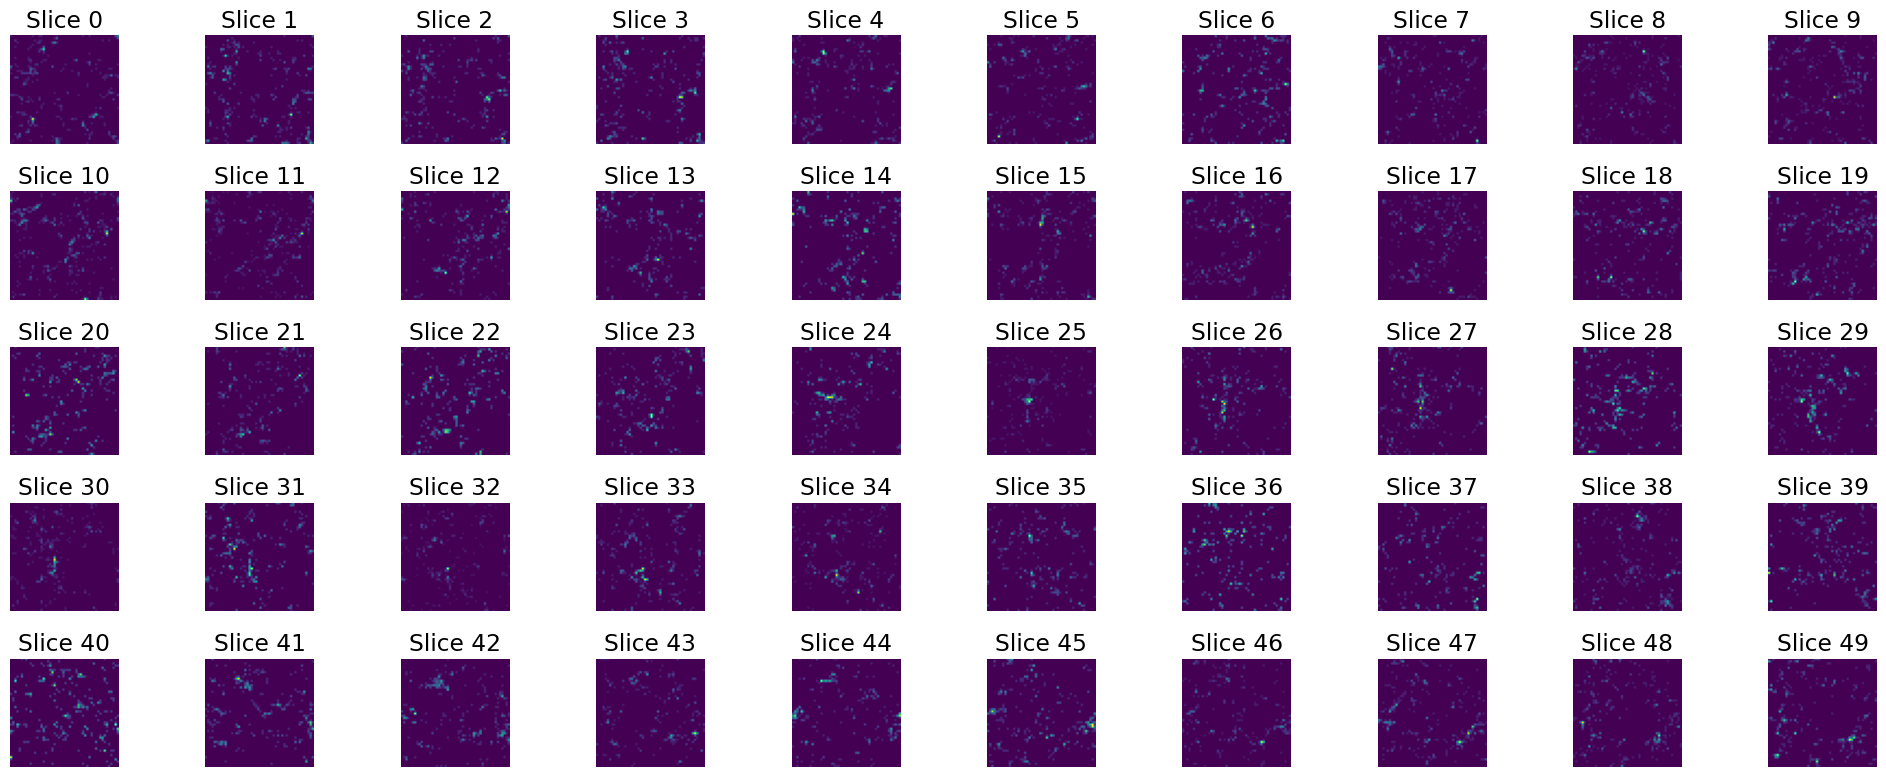

In [7]:
# Make a color plot of the first 50 arrays in nxy_arrays.

# Plot the first 50 arrays in nxy_arrays
plt.figure(figsize=(20, 8))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(nxy_arrays[i], origin='lower', cmap='viridis')
    plt.title(f'Slice {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()


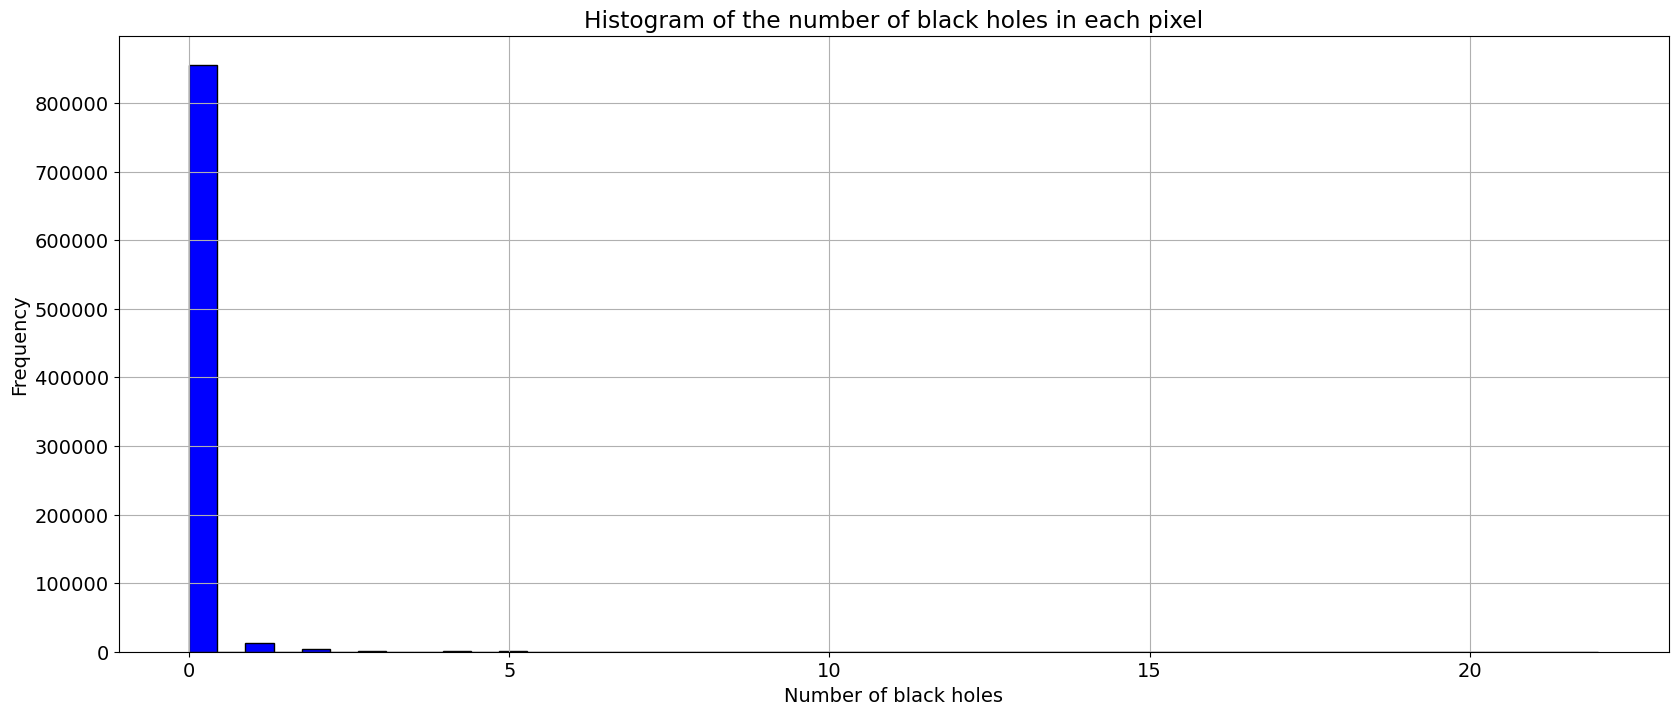

In [9]:
# Make a histogram of the number of black holes in each pixel in the nxy_arrays.

# Flatten the nxy_arrays
nxy_flat = nxy_arrays.flatten()

# Plot the histogram
plt.figure(figsize=(20, 8))
plt.hist(nxy_flat, bins=50, color='blue', edgecolor='black')
plt.xlabel('Number of black holes')
plt.ylabel('Frequency')
plt.title('Histogram of the number of black holes in each pixel')
plt.grid(True)
plt.show()



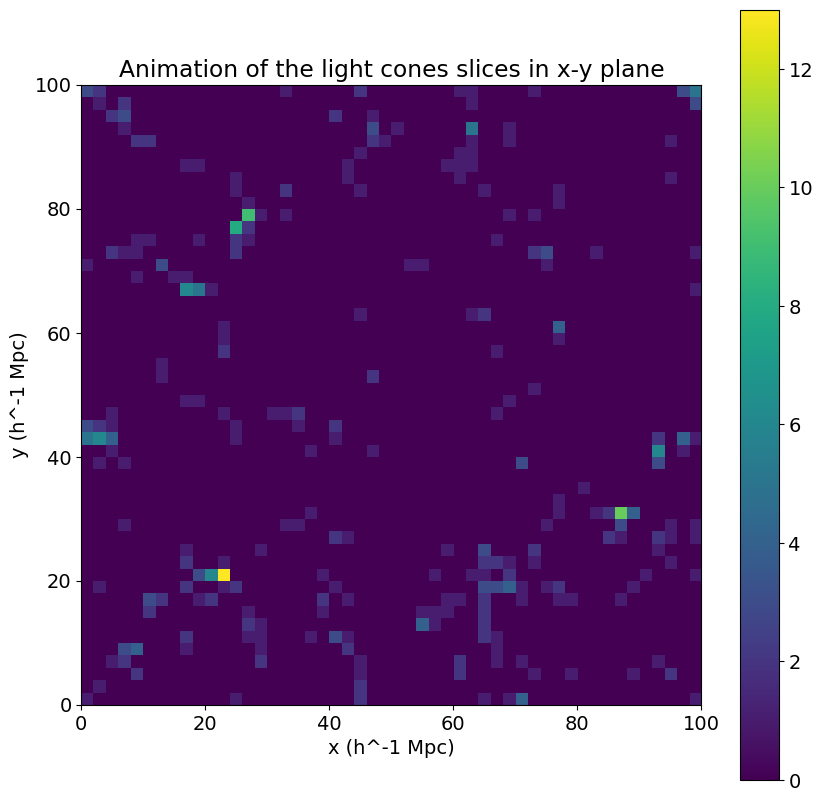

In [8]:
# Make an animation of the 2d slices in new_nxy_arrays.

# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the number of frames
num_frames = len(new_nxy_arrays)

# Create the initial plot
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(new_nxy_arrays[0].T, origin='lower', cmap='viridis', extent=[x_range[0], x_range[1], y_range[0], y_range[1]])
plt.colorbar(im)

# Set the labels and title
ax.set_xlabel('x (h^-1 Mpc)')
ax.set_ylabel('y (h^-1 Mpc)')
ax.set_title('Animation of the light cones slices in x-y plane')


# Define the update function
def update(frame):
    im.set_data(new_nxy_arrays[frame].T)
    return im

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=200)

# Save the animation to a file
ani.save(DATA_DIRECTORY + 'lightcone_animation.mp4', writer='ffmpeg')

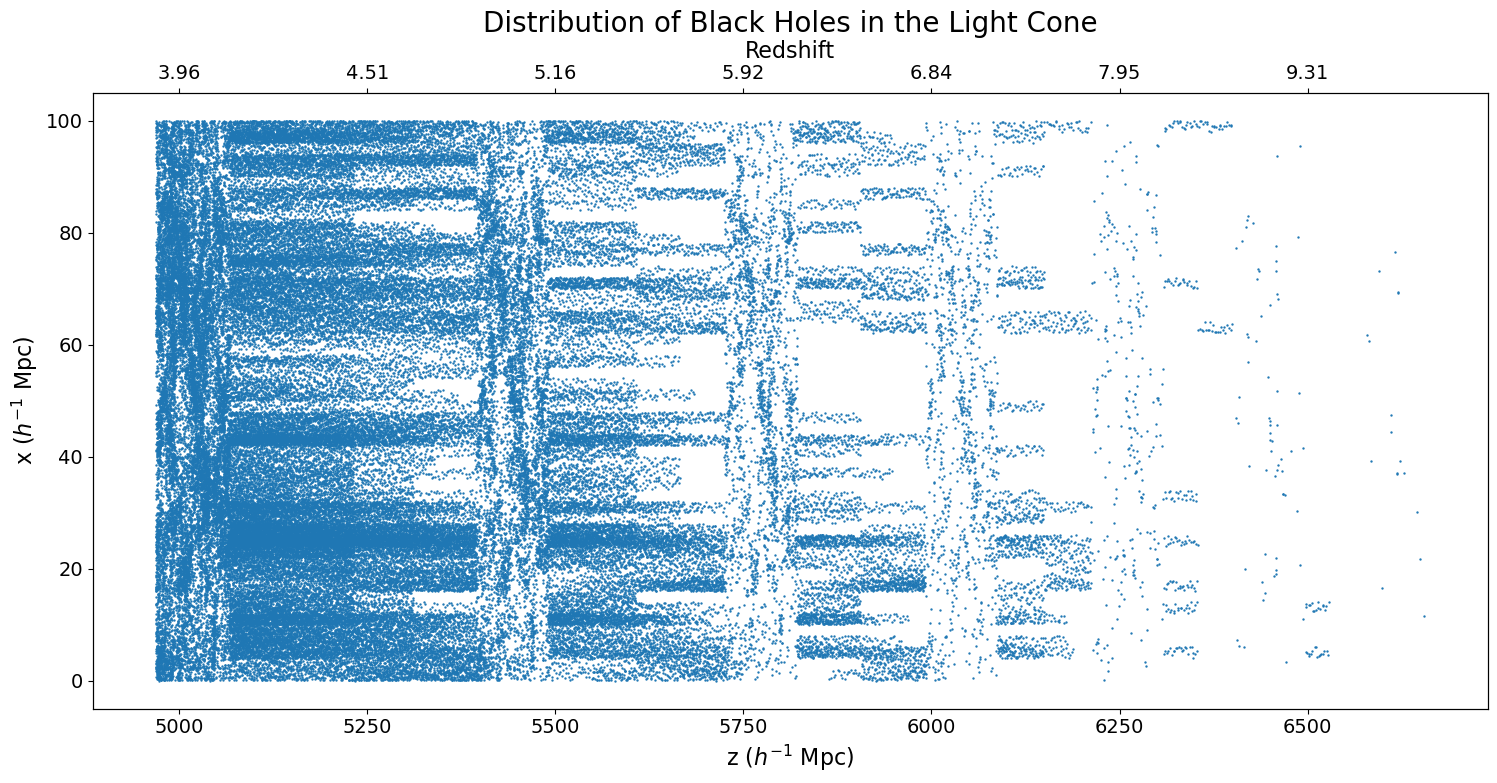

Total number of black holes in the light cone: 103865


In [1]:
# Load the light cone data from the file and plot the distribution of black holes in the light cone.
# I want the plot to be a 2d scatter plot of the x, z coordinates of the black holes in the light cone.

import matplotlib.pyplot as plt
from astropy.cosmology import z_at_value
from astropy import units as u
import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
# Define h
h = 0.7

# Load the light cone data from the file
bh_coordinates = np.load(DATA_DIRECTORY + 'bh_coordinates_lightcone.npy')

# Set global font size
plt.rcParams.update({'font.size': 14})

# Plot the distribution of black holes in the light cone with x in the vertical axis and z in the horizontal axis.
# Make a figure which is longer in the horizontal direction.
fig, ax1 = plt.subplots(figsize=(18, 8))
ax1.scatter(bh_coordinates[:, 2], bh_coordinates[:, 0], s=0.5)
ax1.set_xlabel(r'z ($h^{-1}$ Mpc)', fontsize=16)
ax1.set_ylabel(r'x ($h^{-1}$ Mpc)', fontsize=16)
ax1.set_title('Distribution of Black Holes in the Light Cone', fontsize=20)

# Make a second axis on top of the plot to show the redshifts corresponding to the z coordinates. I need the same number of ticks as the first axis but the 
# tick labels should be the redshifts corresponding to the z coordinates.
ax2 = ax1.twiny()
ax2.set_xlabel('Redshift', fontsize=16)

# Get the limits of the ax1 axis
ax1_xlims = ax1.get_xlim()

# Set the limits of the ax2 axis to be the same as the ax1 axis
ax2.set_xlim(ax1_xlims)

# Extract the current xtick labels
xticks = ax1.get_xticks()
# Convert the xticks to redshifts just in numbers
redshifts = [np.round(z_at_value(cosmo.comoving_distance, dist / h * u.Mpc).value,2) for dist in xticks]
# Set the xticks and labels for the top axis
ax2.set_xticks(xticks[1:-1])
ax2.set_xticklabels(redshifts[1:-1], fontsize=14)

plt.show()

# Print the total number of black holes in the light cone
print(f'Total number of black holes in the light cone: {len(bh_coordinates)}')

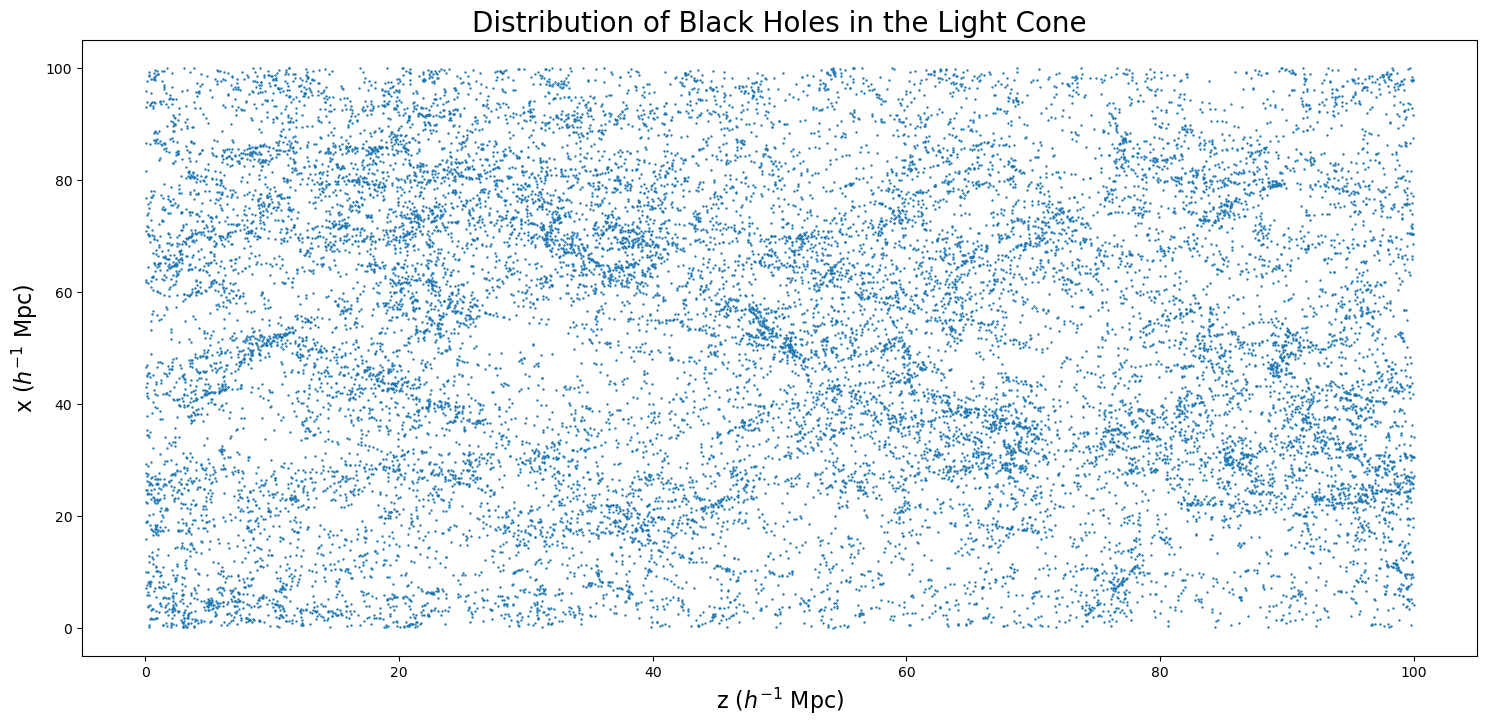

Total number of black holes in the light cone: 20425


In [3]:
import numpy as np
import matplotlib.pyplot as plt

file_name = '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt'

data = np.loadtxt(file_name)

# Extract the x, y, and z coordinates
x_coordinates = data[:, 1]/1000 # Convert to h^-1 Mpc
y_coordinates = data[:, 2]/1000 # Convert to h^-1 Mpc
z_coordinates = data[:, 3]/1000 # Convert to h^-1 Mpc

# Plot the distribution of black holes in the light cone with x in the vertical axis and z in the horizontal axis.
plt.figure(figsize=(18, 8))
plt.scatter(z_coordinates, x_coordinates, s=0.5)
plt.xlabel(r'z ($h^{-1}$ Mpc)', fontsize=16)
plt.ylabel(r'x ($h^{-1}$ Mpc)', fontsize=16)
plt.title('Distribution of Black Holes in the Light Cone', fontsize=20)
plt.show()

print(f'Total number of black holes in the light cone: {len(x_coordinates)}')

## Let's try with the whole slice?

In [12]:
# 1) Load the 7 files which contains MBII black holes details in slices centered at 4, 5, 6, 7, 8, 9, 10 redshifts.
# 2) Extract the x, y, and z coordinates of the black holes.
# 3) Define the number of pixels in each dimension (50, 50, 1). and pixelated the data.
# 4) store each array which is n(x,y) for each redshift in a list called nz_arrays.


import numpy as np
import matplotlib.pyplot as plt
# Import interp1d
from scipy.interpolate import interp1d
# Import the cosmology
from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Define the reduced Hubble constant
h = 0.7

file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

nz_arrays = []

for file_path in file_paths:
    # Load the data from the file
    data = np.loadtxt(file_path)
    
    # Extract the x, y, and z coordinates
    x_coordinates = data[:, 1]
    y_coordinates = data[:, 2]
    z_coordinates = data[:, 3]
    
    # Define the number of pixels in each dimension
    num_pixels_x = 50
    num_pixels_y = 50
    num_pixels_z = 50
    
    # Calculate the pixel size in each dimension
    x_range = (0, 100000) #(np.min(x_coordinates), np.max(x_coordinates))
    y_range = (0, 100000) #(np.min(y_coordinates), np.max(y_coordinates))
    z_range = (0, 100000) #(np.min(z_coordinates), np.max(z_coordinates))
    
    pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
    pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y
    pixel_size_z = (z_range[1] - z_range[0]) / num_pixels_z
    
    # Calculate the pixel indices for each coordinate
    pixel_indices_x = ((x_coordinates - x_range[0]) / pixel_size_x).astype(int)
    pixel_indices_y = ((y_coordinates - y_range[0]) / pixel_size_y).astype(int)
    pixel_indices_z = ((z_coordinates - z_range[0]) / pixel_size_z).astype(int)
    
    # Create an empty n(x, y, z) array
    n_array = np.zeros((num_pixels_x, num_pixels_y, num_pixels_z))
    
    # Count the number of particles in each pixel
    for i in range(len(x_coordinates)):
        n_array[pixel_indices_x[i], pixel_indices_y[i], pixel_indices_z[i]] += 1
    
    nz_arrays.append(n_array)

# Now each array in nz_arrays contains the n(x, y, z) for each redshift slice centered at 4, 5, 6, 7, 8, 9, 10.

# First convert the redshifts to comoving distances
# Define the redshifts
redshifts = [4, 5, 6, 7, 8, 9, 10]

# Calculate the comoving distances
new_z_axis = cosmo.comoving_distance(redshifts).value * h  # Convert to h^-1 Mpc

# These are the slice centers in the z direction for each redshift slice.

# Now I want to interpolate the data in nz_arrays to get the n(x, y, z) for any comoving distance in the range of new_z_axis.
f = interp1d(new_z_axis, nz_arrays, axis=0)

# Now we have the interpolated data in f. We can use f to get the n(x, y, z) for any comoving distance in the range of slice_centers.
# Let's fill using f the range from start_z to end_z

# Define the start and end comoving distances
start_comoving = new_z_axis[0]
end_comoving = new_z_axis[-1]

# Find the z length of the box
z_length = (z_range[1] - z_range[0])/1000  # Convert to h^-1 Mpc

# Divide this range into slices of pixel_size_z.
# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / z_length)

# Calculate the comoving distances of the slices
new_slice_centers = np.linspace(start_comoving, end_comoving, num_slices + 1)

#Now make the new nz_arrays using f for the new_slice_centers.
new_nz_arrays = f(new_slice_centers)

# 7) Now using the n(x, y, z) we have created, we draw a distribution of black holes.
# the number of black holes drawn in each pixel is given by the value of n(x, y, z) in that pixel.
# black holes are randomly distributed in each pixel.

# Convert pixel_size_x and pixel_size_y to h^-1 Mpc
pixel_size_x = pixel_size_x/1000
pixel_size_y = pixel_size_y/1000
pixel_size_z = pixel_size_z/1000

# Convert x_range and y_range to h^-1 Mpc
x_range = (x_range[0]/1000, x_range[1]/1000)
y_range = (y_range[0]/1000, y_range[1]/1000)
z_range = (z_range[0]/1000, z_range[1]/1000)

# Similar to slice_centers, I want to find the center of the pixels in the x and y directions.
pixel_centers_x = np.linspace(x_range[0] + pixel_size_x / 2, x_range[1] - pixel_size_x / 2, num_pixels_x)
pixel_centers_y = np.linspace(y_range[0] + pixel_size_y / 2, y_range[1] - pixel_size_y / 2, num_pixels_y)
pixel_centers_z = []   

# find the center of the pixels in the z direction
for z in new_slice_centers:
    # Calculate the start comoving distance for the slice
    start_comoving = z - z_length / 2
    
    # Calculate the end comoving distance for the slice
    end_comoving = z + z_length / 2
    
    # Calculate the comoving distances for the slice
    slice_comoving_distances = np.linspace(start_comoving, end_comoving, num_pixels_z + 1)

    # Calculate the center of the slices and append to the slice_centers array
    pixel_centers_z.extend((slice_comoving_distances[:-1] + slice_comoving_distances[1:]) / 2)

# Split each array in nz_arrays into n(x, y)
nxy_arrays = []

for nz_array in new_nz_arrays:
    # Get the shape of the nz_array
    nz_shape = nz_array.shape
    
    # Split the nz_array along the z-axis
    nxy_slices = np.split(nz_array, nz_shape[2], axis=2)

    # Remove the unnecessary dimension
    nxy_slices = [np.squeeze(slice, axis=2) for slice in nxy_slices]
    
    # Append the n(x, y) slices to the nxy_arrays list
    nxy_arrays.extend(nxy_slices)

# convert nxy_arrays into numpy array
nxy_arrays = np.array(nxy_arrays)

# Define the number of black holes in each pixel
n_bh = nxy_arrays

# Initialize an empty list to store the black hole coordinates
bh_coordinates = []

# Calculate the number of slices
new_num_slices = len(pixel_centers_z)

# Iterate over the pixels and distribute the black holes
for k in range(new_num_slices):
    for i in range(num_pixels_x):
        for j in range(num_pixels_y):
            # Get the number of black holes in the current pixel
            n = round(n_bh[k, i, j])
            
            # Generate random x, y, z coordinates for the black holes in the pixel
            x_coords = np.random.uniform(low=pixel_centers_x[i] - pixel_size_x / 2, high=pixel_centers_x[i] + pixel_size_x / 2, size=n)
            y_coords = np.random.uniform(low=pixel_centers_y[j] - pixel_size_y / 2, high=pixel_centers_y[j] + pixel_size_y / 2, size=n)
            z_coords = np.random.uniform(low=pixel_centers_z[k] - pixel_size_z / 2, high=pixel_centers_z[k] + pixel_size_z / 2, size=n)
            
            # Append the coordinates to the list
            bh_coordinates.extend(list(zip(x_coords, y_coords, z_coords)))

# Convert the list of coordinates to a numpy array
bh_coordinates = np.array(bh_coordinates)

# This concludes the production of the light cone. bh_coordinates now consists of the x, y, z coordinates of the black holes in the light cone, extrapolated
# from the MBII data.

# Now I want to save the bh_coordinates to a file in the data directory so that I can use it in the future.
# I want to save the numpy array to a file using np.save() function.

# Import numpy
import numpy as np

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

# Save the bh_coordinates to a file
np.save(DATA_DIRECTORY + 'bh_coordinates_lightcone_p2.npy', bh_coordinates)

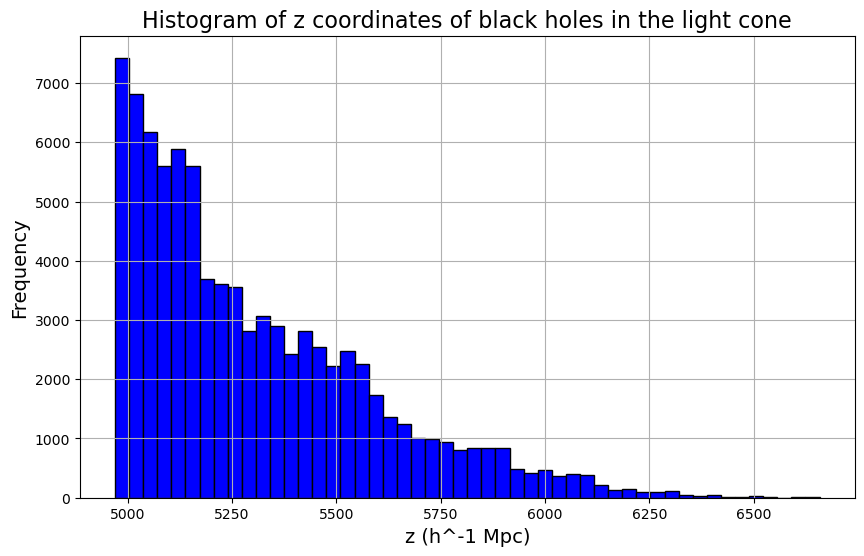

In [13]:
# Let's make a plot of the histogram of black holes in the light cone in the z direction.
# I want to make a histogram of the z coordinates of the black holes in the light cone.

# Plot the histogram of the z coordinates of the black holes in the light cone
plt.figure(figsize=(10, 6))
plt.hist(bh_coordinates[:, 2], bins=50, color='blue', edgecolor='black')
plt.xlabel('z (h^-1 Mpc)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of z coordinates of black holes in the light cone', fontsize=16)
plt.grid(True)
plt.show()


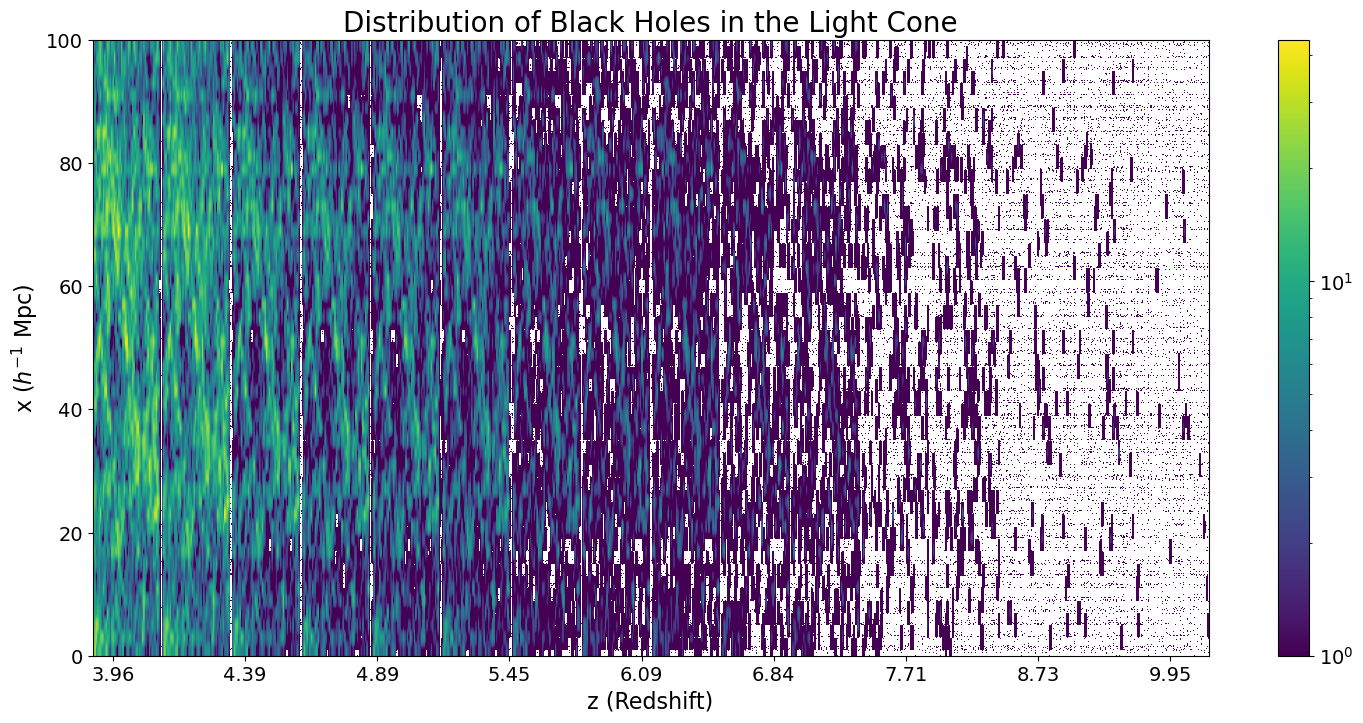

Total number of black holes in the light cone: 85983


In [50]:
# Load the light cone data from the file and plot the distribution of black holes in the light cone.
# I want the plot to be a 2d scatter plot of the x, z coordinates of the black holes in the light cone.

import matplotlib.pyplot as plt
from astropy.cosmology import z_at_value
from astropy import units as u
import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
# Define h
h = 0.7

# Load the light cone data from the file
bh_coordinates = np.load(DATA_DIRECTORY + 'bh_coordinates_lightcone_p2.npy')

# Extract the x, y, and z coordinates
x_coordinates = bh_coordinates[:, 0]
y_coordinates = bh_coordinates[:, 1]
z_coordinates = bh_coordinates[:, 2]

# define the number of pixels in each dimension
num_pixels_x = 50
num_pixels_y = 50
num_pixels_z = 800

# Calculate the pixel size in each dimension
x_range = (0, 100) #(np.min(x_coordinates), np.max(x_coordinates))
y_range = (0, 100) #(np.min(y_coordinates), np.max(y_coordinates))

# z_range is from comoving distance of redshift 4 - half of 100 h^-1 Mpc to comoving distance of redshift 10 + half of 100 h^-1 Mpc
z_range = (cosmo.comoving_distance(4).value * h - 50, cosmo.comoving_distance(10).value * h + 50)

pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y
pixel_size_z = (z_range[1] - z_range[0]) / num_pixels_z

# Calculate the pixel indices for each coordinate
pixel_indices_x = ((x_coordinates - x_range[0]) / pixel_size_x).astype(int)
pixel_indices_y = ((y_coordinates - y_range[0]) / pixel_size_y).astype(int)
pixel_indices_z = ((z_coordinates - z_range[0]) / pixel_size_z).astype(int)

# Create an empty n(x, y, z) array
n_array = np.zeros((num_pixels_x, num_pixels_y, num_pixels_z))

# Count the number of particles in each pixel
for i in range(len(x_coordinates)):
    n_array[pixel_indices_x[i], pixel_indices_y[i], pixel_indices_z[i]] += 1

# Let get the n(x, z) by summing over y
nxz_array = np.sum(n_array, axis=1)

# Set global font size
plt.rcParams.update({'font.size': 14})

# Set appropriate values for vmin and vmax based on the data range
vmin = np.min(nxz_array)
vmax = np.max(nxz_array)

# Make a color plot of the n(x, z) array
fig, ax1 = plt.subplots(figsize=(18, 8))
im = ax1.imshow(nxz_array, origin='lower', cmap='viridis', extent=[z_range[0], z_range[1], x_range[0], x_range[1]], norm='log')
plt.colorbar(im)
ax1.set_ylabel(r'x ($h^{-1}$ Mpc)', fontsize=16)
ax1.set_xlabel(r'z (Redshift)', fontsize=16)
ax1.set_title('Distribution of Black Holes in the Light Cone', fontsize=20)

# Convert the xticks to redshifts
xticks = ax1.get_xticks()
redshifts = [np.round(z_at_value(cosmo.comoving_distance, dist / h * u.Mpc).value,2) for dist in xticks]
ax1.set_xticks(xticks[1:-1])
ax1.set_xticklabels(redshifts[1:-1], fontsize=14)

# # make the color bar log scale
# from matplotlib.colors import LogNorm
# im.set_norm(LogNorm())

# fix the aspect ratio
ax1.set_aspect('auto')

plt.show()

# Print the total number of black holes in the light cone
print(f'Total number of black holes in the light cone: {len(bh_coordinates)}')

# Set appropriate values for vmin and vmax based on the data range
vmin = np.min(nxz_array)
vmax = np.max(nxz_array)

# # Make a color plot of the n(x, z) array with the fixed vmin and vmax
# fig, ax1 = plt.subplots(figsize=(18, 8))
# im = ax1.imshow(nxz_array, origin='lower', cmap='viridis', extent=[z_range[0], z_range[1], x_range[0], x_range[1]], vmin=vmin, vmax=vmax)
# plt.colorbar(im)
# ax1.set_xlabel(r'x ($h^{-1}$ Mpc)', fontsize=16)
# ax1.set_ylabel(r'z ($h^{-1}$ Mpc)', fontsize=16)
# ax1.set_title('Distribution of Black Holes in the Light Cone', fontsize=20)

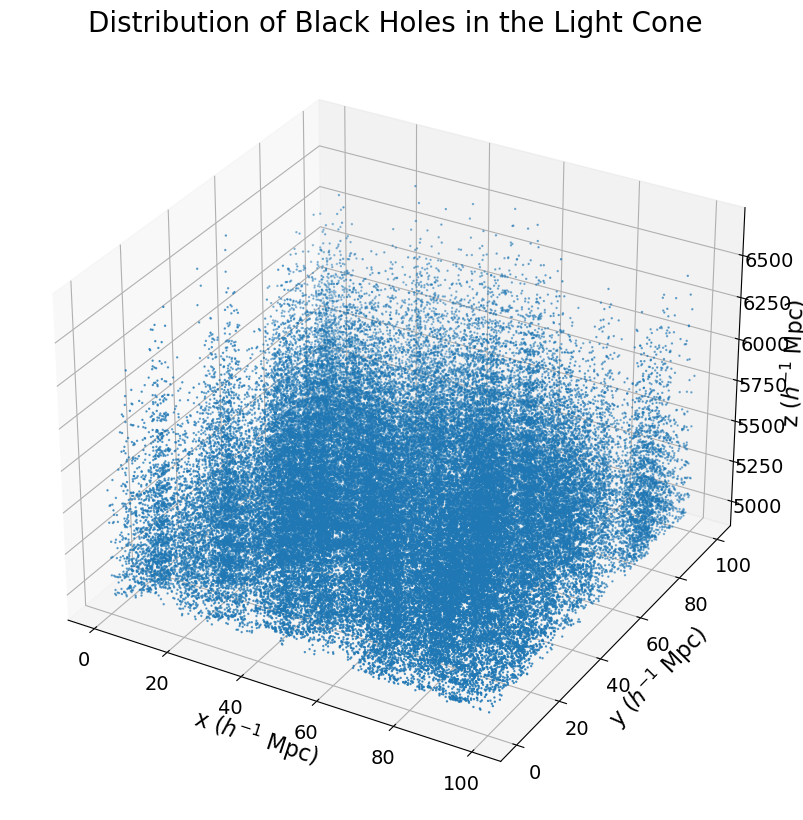

In [17]:
# Make a scatter plot of the black holes in the light cone.
# I want to make a 3d scatter plot of the x, y, z coordinates of the black holes in the light cone.

from mpl_toolkits.mplot3d import Axes3D

# Set global font size
plt.rcParams.update({'font.size': 14})

# Make a 3d scatter plot of the black holes in the light cone
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bh_coordinates[:, 0], bh_coordinates[:, 1], bh_coordinates[:, 2], s=0.5)
ax.set_xlabel(r'x ($h^{-1}$ Mpc)', fontsize=16)
ax.set_ylabel(r'y ($h^{-1}$ Mpc)', fontsize=16)
ax.set_zlabel(r'z ($h^{-1}$ Mpc)', fontsize=16)
ax.set_title('Distribution of Black Holes in the Light Cone', fontsize=20)
plt.show()


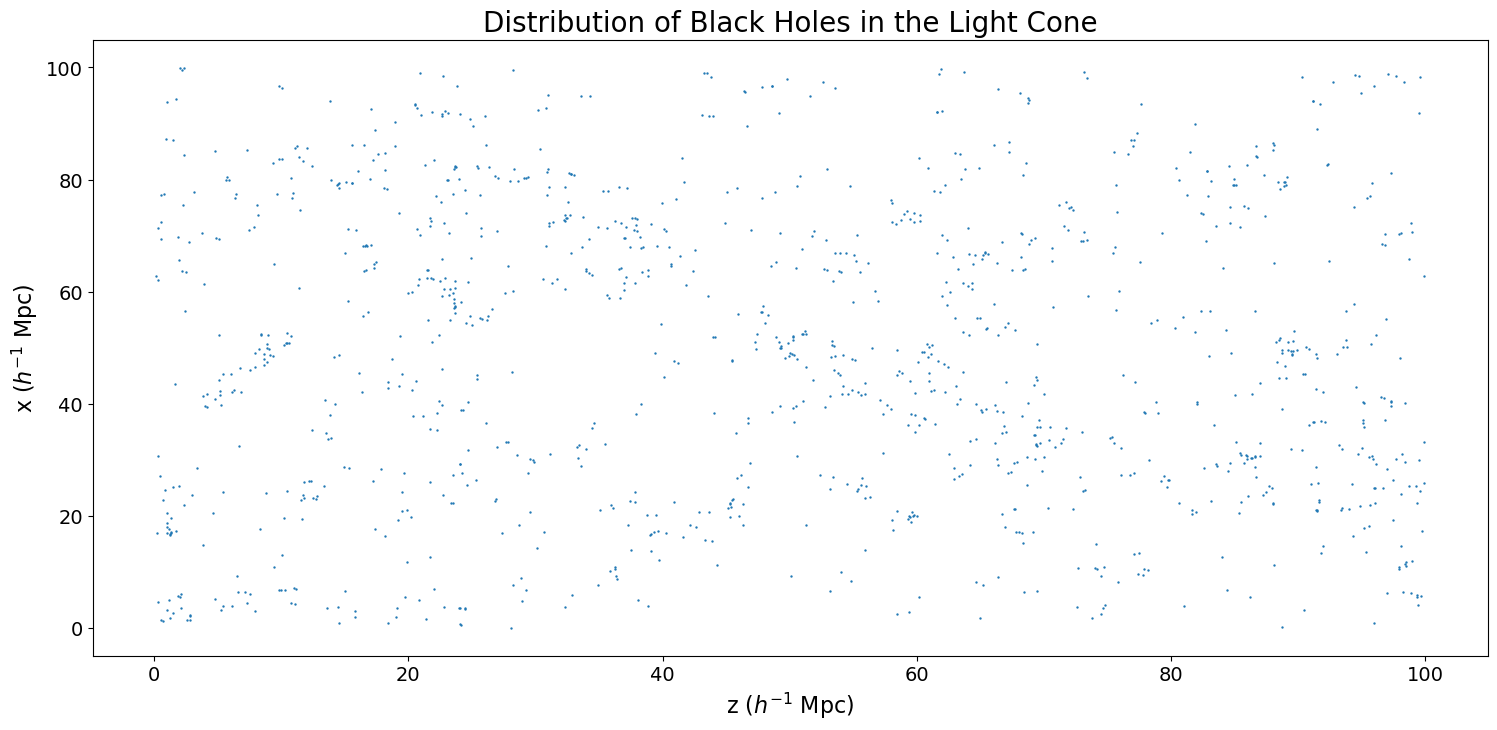

Total number of black holes in the light cone: 1222


In [29]:
file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

import numpy as np
import matplotlib.pyplot as plt

file_name = file_paths[3]

data = np.loadtxt(file_name)

# Extract the x, y, and z coordinates
x_coordinates = data[:, 1]/1000 # Convert to h^-1 Mpc
y_coordinates = data[:, 2]/1000 # Convert to h^-1 Mpc
z_coordinates = data[:, 3]/1000 # Convert to h^-1 Mpc

# Plot the distribution of black holes in the light cone with x in the vertical axis and z in the horizontal axis.
plt.figure(figsize=(18, 8))
plt.scatter(z_coordinates, x_coordinates, s=0.5)
plt.xlabel(r'z ($h^{-1}$ Mpc)', fontsize=16)
plt.ylabel(r'x ($h^{-1}$ Mpc)', fontsize=16)
plt.title('Distribution of Black Holes in the Light Cone', fontsize=20)
plt.show()

print(f'Total number of black holes in the light cone: {len(x_coordinates)}')


## Running the correlation function codes on these obtianed black holes.

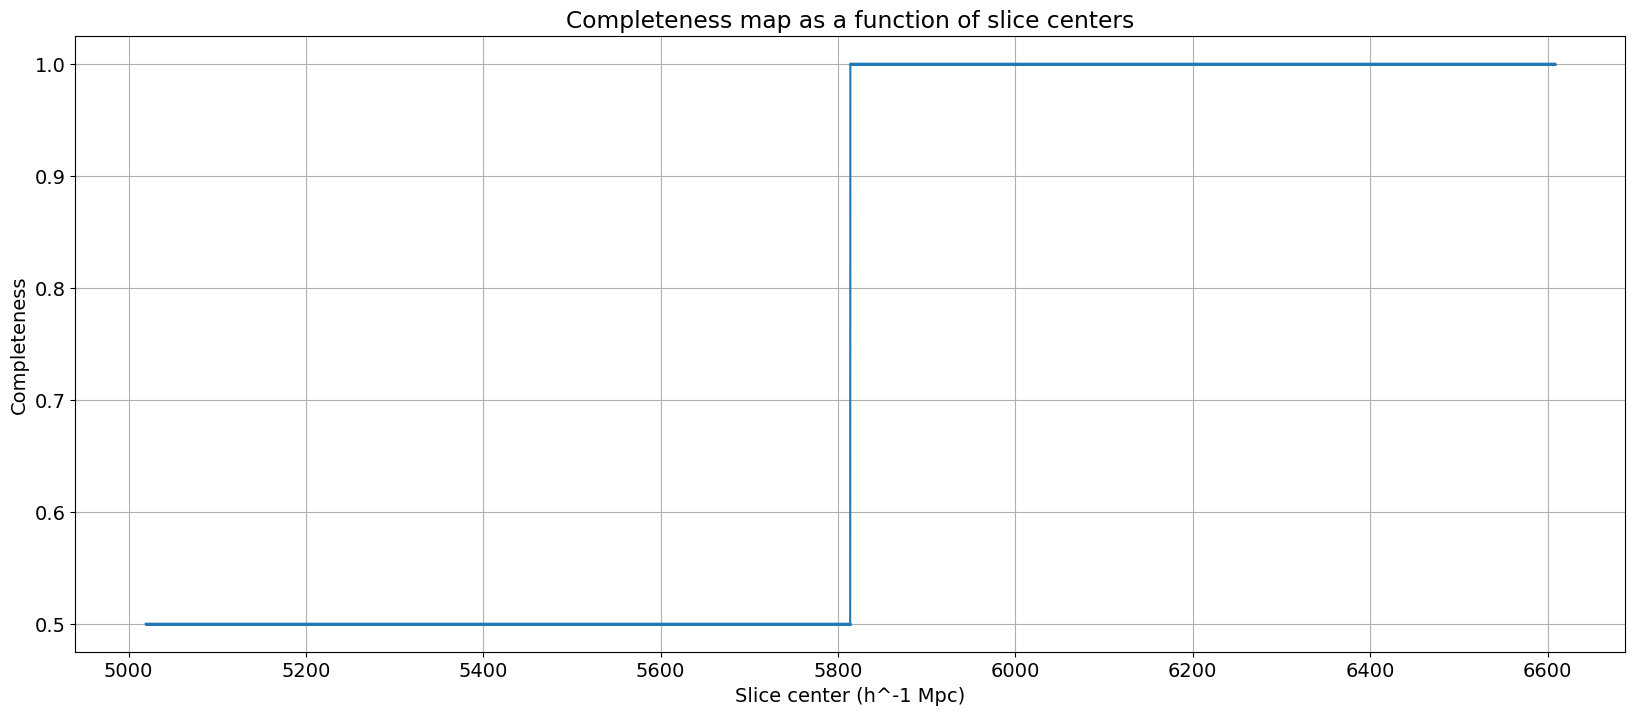

In [35]:
# Completeness map is created here
# I want to make a completeness map of the light cone constructed. Basically it is a function of z, which gives the fraction of the black holes in the light cone that are detected at a given redshift.
# First we have to bin the z axis into slices of 0.1 h^-1 Mpc, inorder to assign incompleteness to each slice.

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value * h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value * h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# # Define the completeness map as a function of slice centers, completeness is a random number between 0 and 1.
# # Assign the first half of slices values between 0 and 0.5 and the second half values between 0.5 and 1.
# completeness_map = np.zeros(num_slices)
# completeness_map[:num_slices//2] = np.random.uniform(0, 0.5, num_slices//2)
# completeness_map[num_slices//2:] = np.random.uniform(0.5, 1, num_slices - num_slices//2)

# Define the completeness map as a function of slice centers. Completeness is a number between 0 and 1.
# Assign the first half of slices value 0.5 and the second half value 1.
completeness_map = np.zeros(num_slices)
completeness_map[:num_slices//2] = 0.5
completeness_map[num_slices//2:] = 1 

# Now I want to plot the completeness map as a function of the slice centers.

# Plot the completeness map as a function of the slice centers
plt.figure(figsize=(20, 8))
plt.plot(slice_centers, completeness_map, marker='.', linestyle='-', markersize=1)
plt.xlabel('Slice center (h^-1 Mpc)')
plt.ylabel('Completeness')
plt.title('Completeness map as a function of slice centers')
plt.grid(True)
plt.show()

Number of selected black holes: 3249


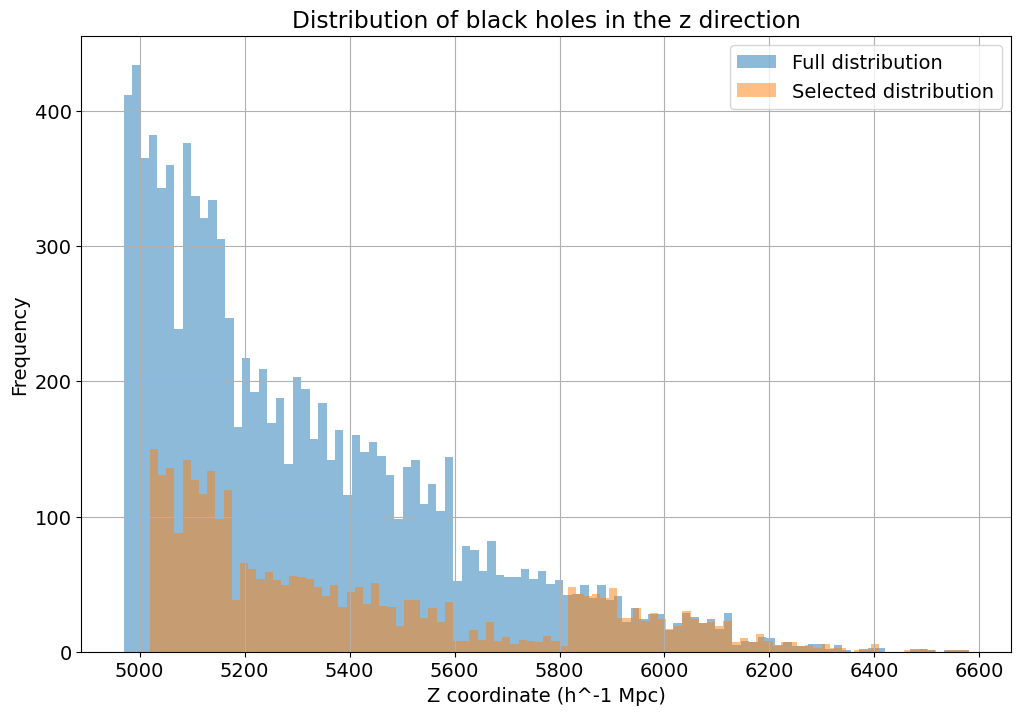

[Warning] The CPU supports AVX2 but the compiler does not.  Can you try another compiler?
[Warning] The CPU supports AVX but the compiler does not.  Can you try another compiler?
[Warning] The CPU supports SSE4.2 but the compiler does not.  Can you try another compiler?
[Warning] The CPU supports SSE4.1 but the compiler does not.  Can you try another compiler?
[Warning] The CPU supports SSSE3 but the compiler does not.  Can you try another compiler?


In [36]:
# Completenss map is basically the number of black holes that are selected from the given slice out of the total black holes in the slice.
# x_coords, y_coords, z_coords are the coordinates of the black holes in the light cone constructed.
# I want to find the slice to which each black hole belongs and choose randomly a fraction of black holes from each slice according to the completeness map.

# Import the kernel density estimation function from scikit-learn
from sklearn.neighbors import KernelDensity
# Import the DD function from Corrfunc
from Corrfunc.theory.DD import DD

# Import the black hole coordinates from the file
bh_coordinates = np.load(DATA_DIRECTORY + 'bh_coordinates_lightcone_p2.npy')

# Define the number of black holes to choose for the subset
num_black_holes = 10000

# randomly draw num_black_holes from the bh_coordinates
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Define the subset of black holes to use for the correlation function
bh_pos_x = x_coords
bh_pos_y = y_coords
bh_pos_z = z_coords

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value * h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value * h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Assign each black hole to a slice based on its z coordinate
slice_indices = np.digitize(z_coords, slice_z_coords[1:], right=True)

# Choose a fraction of black holes from each slice based on the completeness map
selected_bh_indices = []
for i in range(1, num_slices + 1):
    slice_bh_indices = np.where(slice_indices == i)[0]
    num_bh_in_slice = len(slice_bh_indices)
    num_selected_bh = int(completeness_map[i - 1] * num_bh_in_slice)
    selected_slice_bh_indices = np.random.choice(slice_bh_indices, num_selected_bh, replace=False)
    selected_bh_indices.extend(selected_slice_bh_indices)

# Get the selected black hole coordinates
selected_bh_coordinates = random_bh_coordinates[selected_bh_indices]

# Get the z coordinates of the selected black holes
selected_z_coords = selected_bh_coordinates[:, 2]

# Get the x and y coordinates of the selected black holes
selected_x_coords = selected_bh_coordinates[:, 0]
selected_y_coords = selected_bh_coordinates[:, 1]

# Print the number of selected black holes
print(f'Number of selected black holes: {len(selected_bh_coordinates)}')

# Now I want to plot the distribution of the selected black holes in z direction and compare it with the full distribution.

# Create a histogram of the z coordinates of the selected black holes
plt.figure(figsize=(12, 8))
plt.hist(z_coords, bins=100, alpha=0.5, label='Full distribution')
plt.hist(selected_z_coords, bins=100, alpha=0.5, label='Selected distribution')
plt.xlabel('Z coordinate (h^-1 Mpc)')
plt.ylabel('Frequency')
plt.title('Distribution of black holes in the z direction')
plt.legend()
plt.grid(True)
plt.show()

# Now I want to calculate the correlation function using the selected black holes and compare it with the correlation function using all black holes.
# Full balck holes correlation function.

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 5 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILighCone_p2_Corrfunc10k.csv', index=False)

# Selected black holes correlation function.

bh_pos_x = selected_x_coords
bh_pos_y = selected_y_coords
bh_pos_z = selected_z_coords

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 10 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILighCone_p2_Corrfunc10k_incomp.csv', index=False)

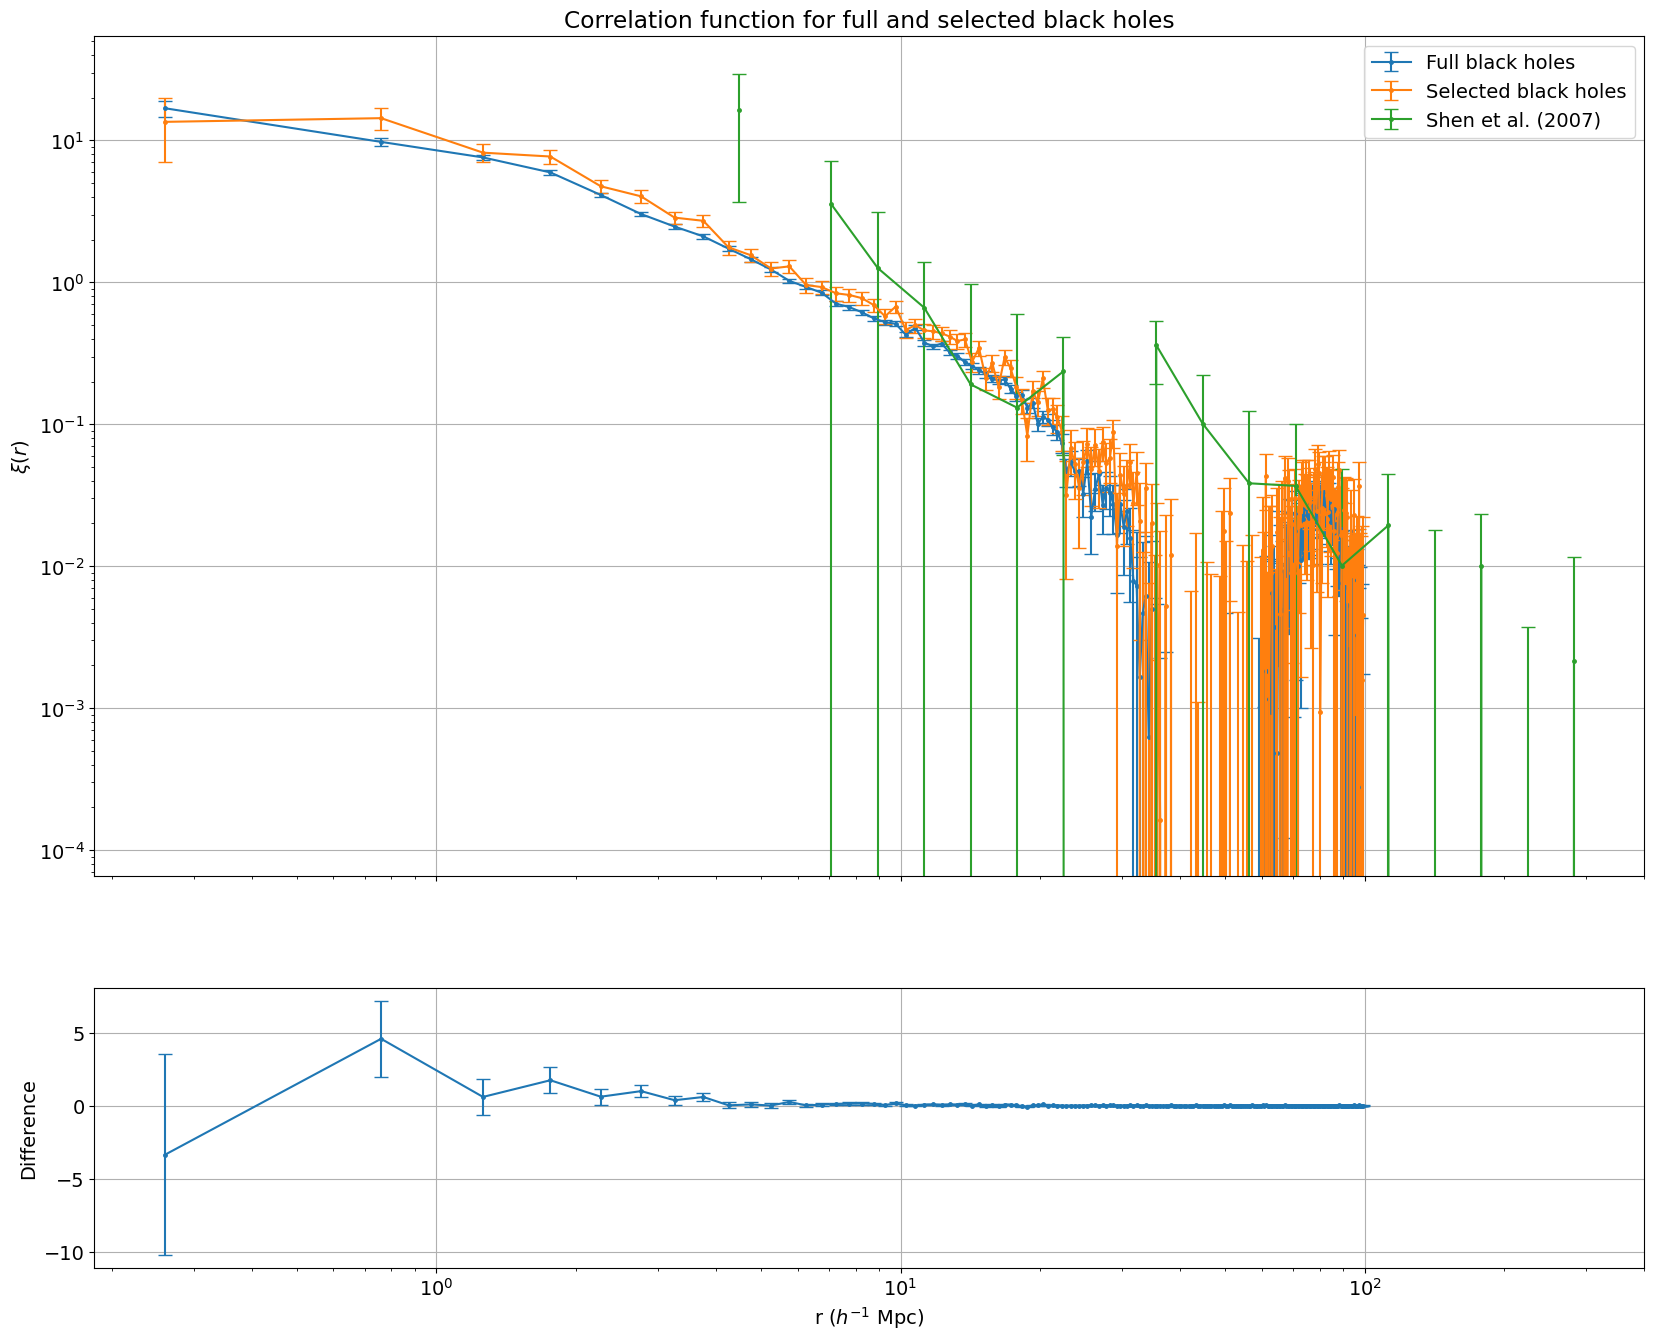

In [41]:
# Let's plot the correlation function for the full and selected black holes.

# import pandas
import pandas as pd
# import numpy ma
import numpy.ma as ma

# Load the correlation function data
corrfunc_full = pd.read_csv(DATA_DIRECTORY + 'MBIILighCone_p2_Corrfunc10k.csv')
corrfunc_selected = pd.read_csv(DATA_DIRECTORY + 'MBIILighCone_p2_Corrfunc10k_incomp.csv')

# Find the midpoint of each bin, as r_mid = (r_min + r_max) / 2
corrfunc_full['r mid'] = (corrfunc_full['r min'] + corrfunc_full['r max']) / 2
corrfunc_selected['r mid'] = (corrfunc_selected['r min'] + corrfunc_selected['r max']) / 2

# Define the Shen et al. (2007) correlation function for comparison
s_bins = np.logspace(start=np.log10(1.9868), stop=np.log10(314.915), num=23)
s_mid = (s_bins[:-1] + s_bins[1:])/2

shen_original = ma.masked_values([0, 0, 0, 16.5, 0, 3.54, 1.26, 0.663, 0.191, 0.131, 0.236, -0.280, 0.361, 0.101, 0.0384, 0.0368, 0.0101, 0.0194, -0.00396, 0.0101, -0.00296, 0.00214], 0)
shen_original_error = ma.masked_values([0, 0, 0, 12.8, 0, 3.61, 1.88, 0.733, 0.786, 0.472, 0.175, 0.223, 0.170, 0.121, 0.0862, 0.0644, 0.0382, \
                                    0.0250, 0.0219, 0.0134, 0.00672, 0.00953], 0)

# Make a subplot on the bottom showing difference between the two correlation functions.

# Plot the correlation function for the full and selected black holes
fig, ax = plt.subplots(2, 1, figsize=(20, 16), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(corrfunc_full['r mid'], corrfunc_full['Landy Szalay'], yerr=corrfunc_full['Pois Error'], label='Full black holes', fmt='.-', markersize=5, capsize=5)
ax[0].errorbar(corrfunc_selected['r mid'], corrfunc_selected['Landy Szalay'], yerr=corrfunc_selected['Pois Error'], label='Selected black holes', fmt='.-', markersize=5, capsize=5)
ax[0].set_ylabel(r'$\xi(r)$')
ax[0].set_title('Correlation function for full and selected black holes')
ax[0].grid(True)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

# Plot the Shen et al. (2007) correlation function for comparison
ax[0].errorbar(s_mid, shen_original, yerr=shen_original_error, label='Shen et al. (2007)', fmt='.-', markersize=5, capsize=5)

# Calculate the difference between the two correlation functions
diff = corrfunc_selected['Landy Szalay'] - corrfunc_full['Landy Szalay']
err = np.sqrt(corrfunc_selected['Pois Error']**2 + corrfunc_full['Pois Error']**2)

# Plot the difference between the two correlation functions
ax[1].errorbar(corrfunc_full['r mid'], diff, yerr=err, fmt='.-', markersize=5, capsize=5)
ax[1].set_xlabel(r'r ($h^{-1}$ Mpc)')
ax[1].set_ylabel('Difference')
ax[1].grid(True)
# ax[1].set_xscale('log')

ax[0].legend()

plt.show()

## Trying the same bins as shen et al. 2007

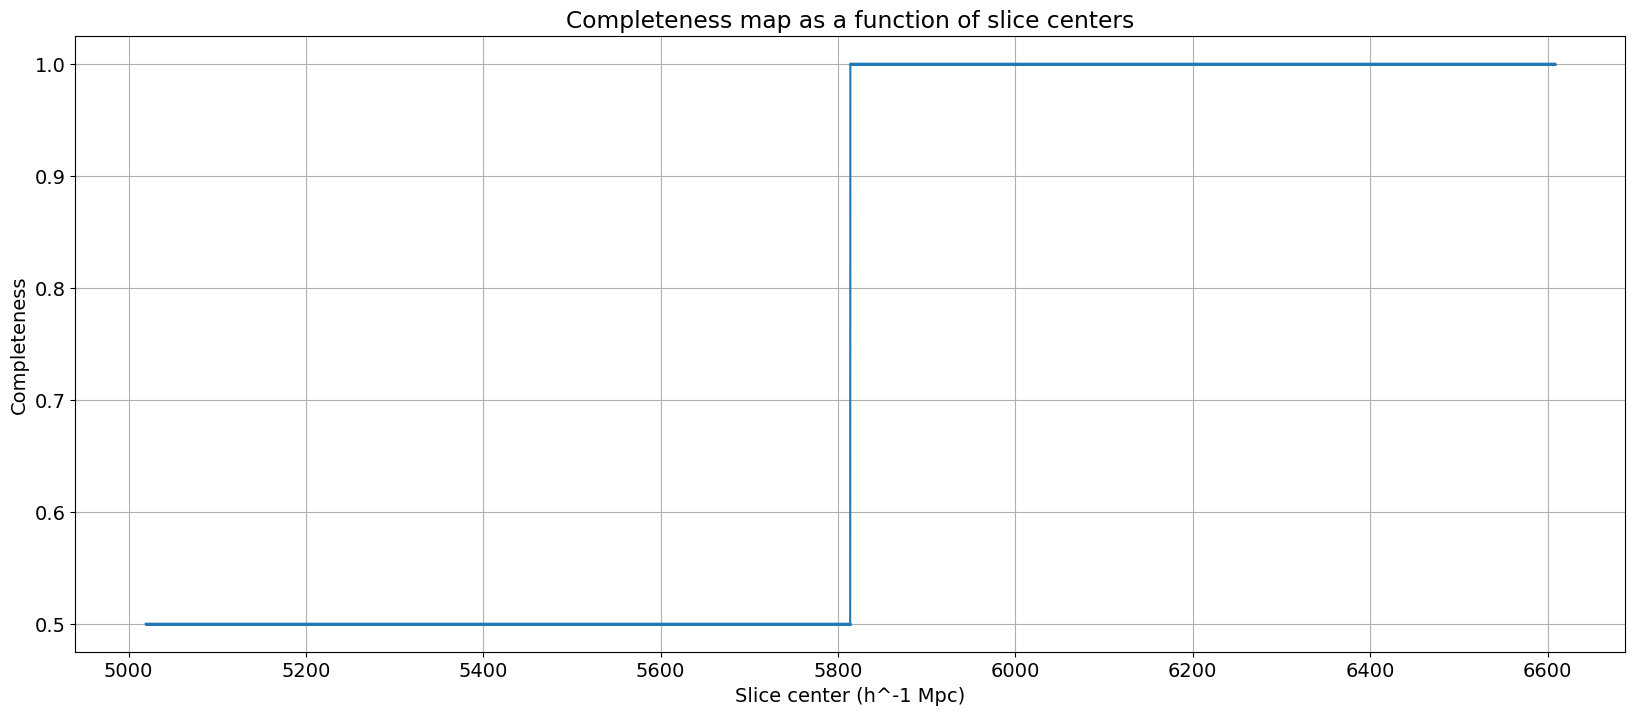

In [42]:
# Completeness map is created here
# I want to make a completeness map of the light cone constructed. Basically it is a function of z, which gives the fraction of the black holes in the light cone that are detected at a given redshift.
# First we have to bin the z axis into slices of 0.1 h^-1 Mpc, inorder to assign incompleteness to each slice.

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value * h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value * h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# # Define the completeness map as a function of slice centers, completeness is a random number between 0 and 1.
# # Assign the first half of slices values between 0 and 0.5 and the second half values between 0.5 and 1.
# completeness_map = np.zeros(num_slices)
# completeness_map[:num_slices//2] = np.random.uniform(0, 0.5, num_slices//2)
# completeness_map[num_slices//2:] = np.random.uniform(0.5, 1, num_slices - num_slices//2)

# Define the completeness map as a function of slice centers. Completeness is a number between 0 and 1.
# Assign the first half of slices value 0.5 and the second half value 1.
completeness_map = np.zeros(num_slices)
completeness_map[:num_slices//2] = 0.5
completeness_map[num_slices//2:] = 1 

# Now I want to plot the completeness map as a function of the slice centers.

# Plot the completeness map as a function of the slice centers
plt.figure(figsize=(20, 8))
plt.plot(slice_centers, completeness_map, marker='.', linestyle='-', markersize=1)
plt.xlabel('Slice center (h^-1 Mpc)')
plt.ylabel('Completeness')
plt.title('Completeness map as a function of slice centers')
plt.grid(True)
plt.show()

Number of selected black holes: 3283


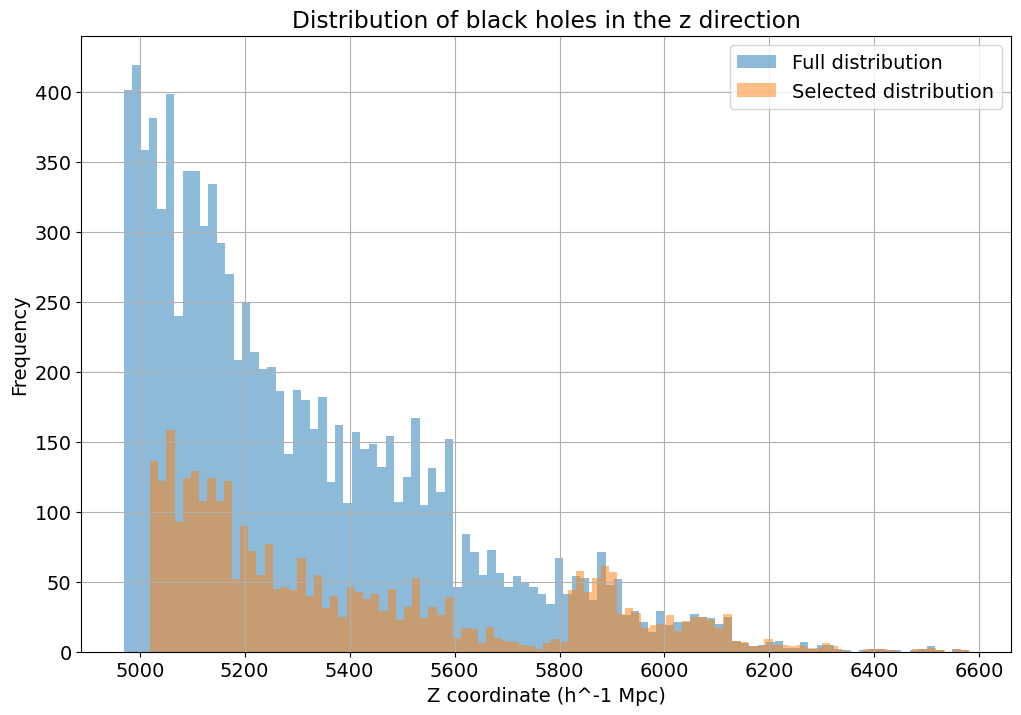

In [43]:
# Completenss map is basically the number of black holes that are selected from the given slice out of the total black holes in the slice.
# x_coords, y_coords, z_coords are the coordinates of the black holes in the light cone constructed.
# I want to find the slice to which each black hole belongs and choose randomly a fraction of black holes from each slice according to the completeness map.

# Import the kernel density estimation function from scikit-learn
from sklearn.neighbors import KernelDensity
# Import the DD function from Corrfunc
from Corrfunc.theory.DD import DD

# Import the black hole coordinates from the file
bh_coordinates = np.load(DATA_DIRECTORY + 'bh_coordinates_lightcone_p2.npy')

# Define the number of black holes to choose for the subset
num_black_holes = 10000

# randomly draw num_black_holes from the bh_coordinates
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Define the subset of black holes to use for the correlation function
bh_pos_x = x_coords
bh_pos_y = y_coords
bh_pos_z = z_coords

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value * h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value * h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Assign each black hole to a slice based on its z coordinate
slice_indices = np.digitize(z_coords, slice_z_coords[1:], right=True)

# Choose a fraction of black holes from each slice based on the completeness map
selected_bh_indices = []
for i in range(1, num_slices + 1):
    slice_bh_indices = np.where(slice_indices == i)[0]
    num_bh_in_slice = len(slice_bh_indices)
    num_selected_bh = int(completeness_map[i - 1] * num_bh_in_slice)
    selected_slice_bh_indices = np.random.choice(slice_bh_indices, num_selected_bh, replace=False)
    selected_bh_indices.extend(selected_slice_bh_indices)

# Get the selected black hole coordinates
selected_bh_coordinates = random_bh_coordinates[selected_bh_indices]

# Get the z coordinates of the selected black holes
selected_z_coords = selected_bh_coordinates[:, 2]

# Get the x and y coordinates of the selected black holes
selected_x_coords = selected_bh_coordinates[:, 0]
selected_y_coords = selected_bh_coordinates[:, 1]

# Print the number of selected black holes
print(f'Number of selected black holes: {len(selected_bh_coordinates)}')

# Now I want to plot the distribution of the selected black holes in z direction and compare it with the full distribution.

# Create a histogram of the z coordinates of the selected black holes
plt.figure(figsize=(12, 8))
plt.hist(z_coords, bins=100, alpha=0.5, label='Full distribution')
plt.hist(selected_z_coords, bins=100, alpha=0.5, label='Selected distribution')
plt.xlabel('Z coordinate (h^-1 Mpc)')
plt.ylabel('Frequency')
plt.title('Distribution of black holes in the z direction')
plt.legend()
plt.grid(True)
plt.show()

# Now I want to calculate the correlation function using the selected black holes and compare it with the correlation function using all black holes.
# Full balck holes correlation function.

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 5 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.logspace(start=np.log10(1.9868), stop=np.log10(314.915), num=23) #np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILighCone_p2_Corrfunc10k_binShen.csv', index=False)

# Selected black holes correlation function.

bh_pos_x = selected_x_coords
bh_pos_y = selected_y_coords
bh_pos_z = selected_z_coords

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 10 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.logspace(start=np.log10(1.9868), stop=np.log10(314.915), num=23) #np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILighCone_p2_Corrfunc10k_incomp_binShen.csv', index=False)

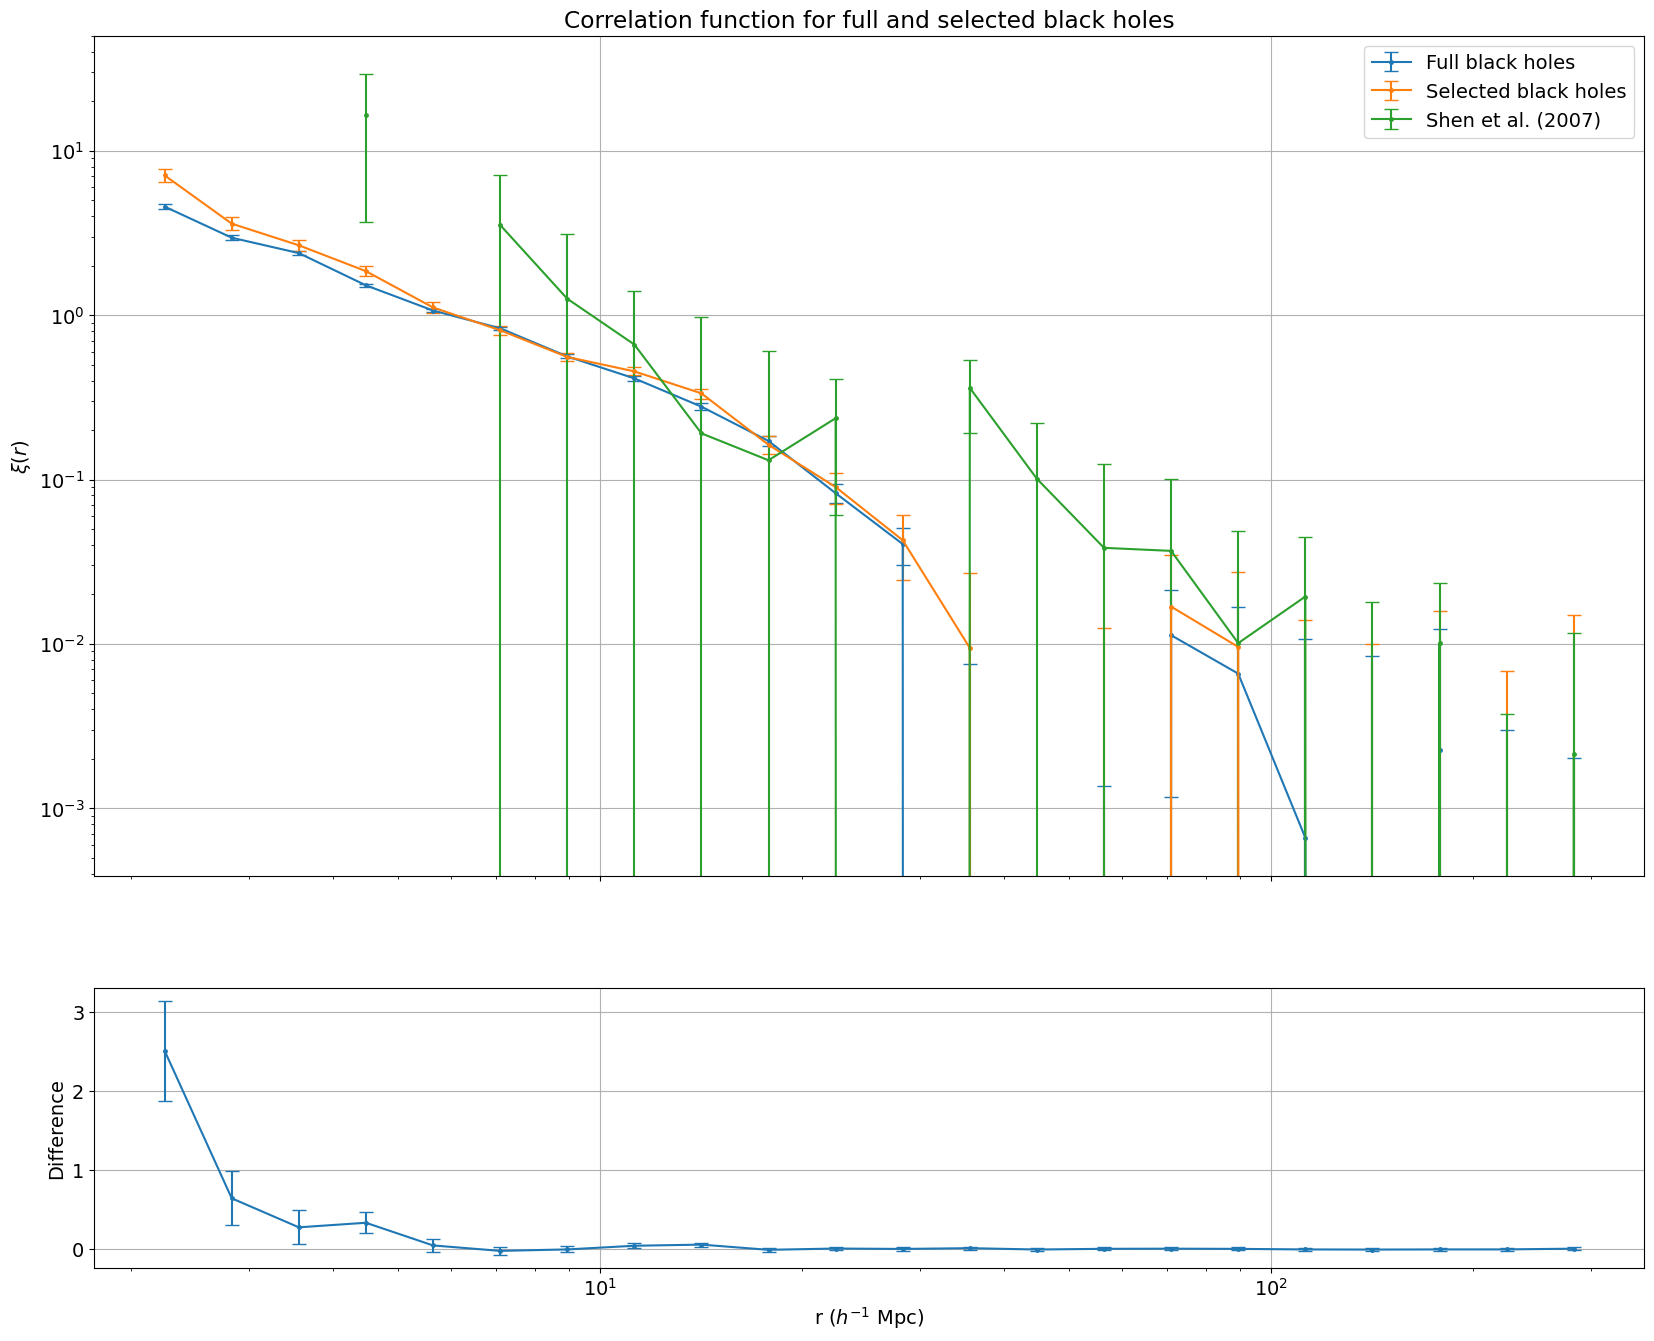

In [44]:
# Let's plot the correlation function for the full and selected black holes.

# import pandas
import pandas as pd
# import numpy ma
import numpy.ma as ma

# Load the correlation function data
corrfunc_full = pd.read_csv(DATA_DIRECTORY + 'MBIILighCone_p2_Corrfunc10k_binShen.csv')
corrfunc_selected = pd.read_csv(DATA_DIRECTORY + 'MBIILighCone_p2_Corrfunc10k_incomp_binShen.csv')

# Find the midpoint of each bin, as r_mid = (r_min + r_max) / 2
corrfunc_full['r mid'] = (corrfunc_full['r min'] + corrfunc_full['r max']) / 2
corrfunc_selected['r mid'] = (corrfunc_selected['r min'] + corrfunc_selected['r max']) / 2

# Define the Shen et al. (2007) correlation function for comparison
s_bins = np.logspace(start=np.log10(1.9868), stop=np.log10(314.915), num=23)
s_mid = (s_bins[:-1] + s_bins[1:])/2

shen_original = ma.masked_values([0, 0, 0, 16.5, 0, 3.54, 1.26, 0.663, 0.191, 0.131, 0.236, -0.280, 0.361, 0.101, 0.0384, 0.0368, 0.0101, 0.0194, -0.00396, 0.0101, -0.00296, 0.00214], 0)
shen_original_error = ma.masked_values([0, 0, 0, 12.8, 0, 3.61, 1.88, 0.733, 0.786, 0.472, 0.175, 0.223, 0.170, 0.121, 0.0862, 0.0644, 0.0382, \
                                    0.0250, 0.0219, 0.0134, 0.00672, 0.00953], 0)

# Make a subplot on the bottom showing difference between the two correlation functions.

# Plot the correlation function for the full and selected black holes
fig, ax = plt.subplots(2, 1, figsize=(20, 16), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(corrfunc_full['r mid'], corrfunc_full['Landy Szalay'], yerr=corrfunc_full['Pois Error'], label='Full black holes', fmt='.-', markersize=5, capsize=5)
ax[0].errorbar(corrfunc_selected['r mid'], corrfunc_selected['Landy Szalay'], yerr=corrfunc_selected['Pois Error'], label='Selected black holes', fmt='.-', markersize=5, capsize=5)
ax[0].set_ylabel(r'$\xi(r)$')
ax[0].set_title('Correlation function for full and selected black holes')
ax[0].grid(True)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

# Plot the Shen et al. (2007) correlation function for comparison
ax[0].errorbar(s_mid, shen_original, yerr=shen_original_error, label='Shen et al. (2007)', fmt='.-', markersize=5, capsize=5)

# Calculate the difference between the two correlation functions
diff = corrfunc_selected['Landy Szalay'] - corrfunc_full['Landy Szalay']
err = np.sqrt(corrfunc_selected['Pois Error']**2 + corrfunc_full['Pois Error']**2)

# Plot the difference between the two correlation functions
ax[1].errorbar(corrfunc_full['r mid'], diff, yerr=err, fmt='.-', markersize=5, capsize=5)
ax[1].set_xlabel(r'r ($h^{-1}$ Mpc)')
ax[1].set_ylabel('Difference')
ax[1].grid(True)
# ax[1].set_xscale('log')

ax[0].legend()

plt.show()

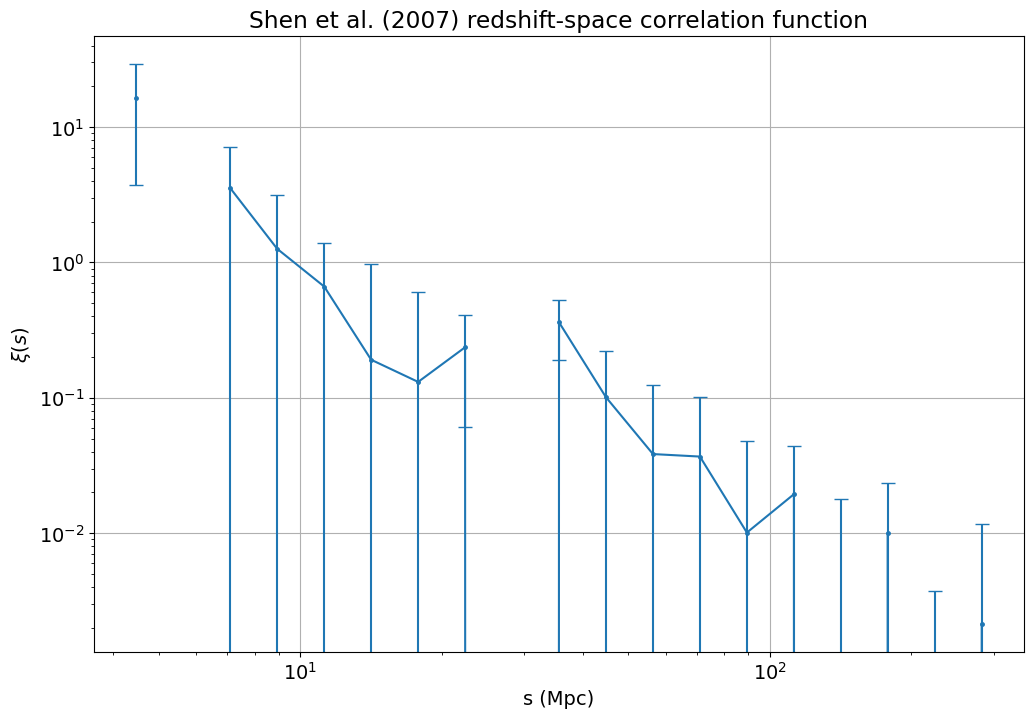

In [47]:
# Read a file from the data folder named ShenRedSpaceCorrFuncData.txt, Extract coloumns 0, 4 and 5 from the file.

# Read the data from the file
data = np.genfromtxt(DATA_DIRECTORY + 'ShenRedSpaceCorrFuncData.txt')

# Extract the columns
r = data[:, 0]
xi = data[:, 4]
err = data[:, 5]

# Plot the correlation function
plt.figure(figsize=(12, 8))
plt.errorbar(r, xi, yerr=err, fmt='.-', markersize=5, capsize=5)
plt.xlabel('s (Mpc)')
plt.ylabel(r'$\xi(s)$')
plt.title('Shen et al. (2007) redshift-space correlation function')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()


## Making light cones in different luminosity bins

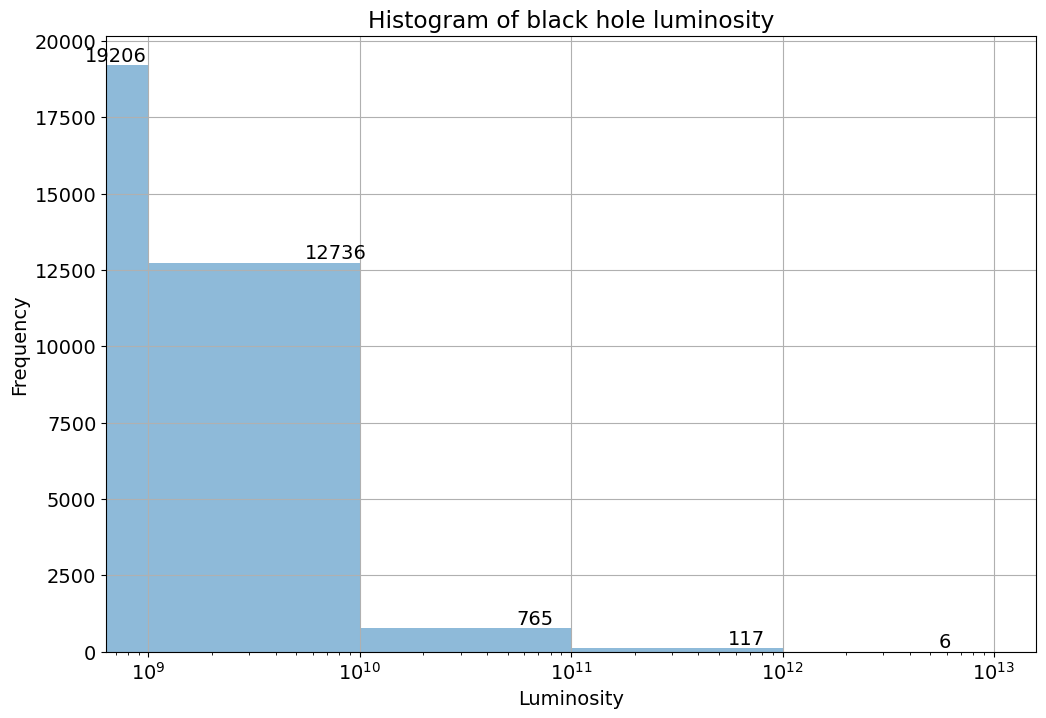

In [18]:
# Here I want to calculate the number of black holes in each slice which belongs to a luminosity bin

import numpy as np

file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

# First combine the data from all the files into a single array
data = np.concatenate([np.genfromtxt(file_path) for file_path in file_paths])

# Get the luminosity of the black holes
bh_lum = data[:, 8]
luminosity = bh_lum * 1.472 * 10 ** 12 # 1 M0/yr * 0.1 * c^2 equvialent to 1.472 x 10^12 L0

# Define the luminosity bins
luminosity_bins = [0, 1e9, 1e10, 1e11, 1e12, 1e13]

# Make a histogram of the luminosity
plt.figure(figsize=(12, 8))
plt.hist(luminosity, bins=luminosity_bins, alpha=0.5)
plt.xlabel('Luminosity')
plt.ylabel('Frequency')
plt.title('Histogram of black hole luminosity')
plt.xscale('log')
plt.grid(True)

# I want to have the number of black hole in each bin written on top of the bars.

# Get the bin counts and bin edges
counts, edges = np.histogram(luminosity, bins=luminosity_bins)

# Calculate the bin centers
bin_centers = (edges[:-1] + edges[1:]) / 2

# Write the counts on top of the bars
for i, count in enumerate(counts):
    plt.text(bin_centers[i], count, str(count), ha='left', va='bottom')


plt.show()



In [22]:
# 1) Load the 7 files which contains MBII black holes details in slices centered at 4, 5, 6, 7, 8, 9, 10 redshifts.
# 2) Extract the x, y, and z coordinates of the black holes.
# 3) Define the number of pixels in each dimension (50, 50, 1). and pixelated the data.
# 4) store each array which is n(x,y) for each redshift in a list called nz_arrays.


import numpy as np
import matplotlib.pyplot as plt
# Import interp1d
from scipy.interpolate import interp1d
# Import the cosmology
from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Define the reduced Hubble constant
h = 0.7

file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

nz_arrays = []

# defining the luminosity bin
min_lum = 1e12
max_lum = 1e13

for file_path in file_paths:
    # Load the data from the file
    data = np.loadtxt(file_path)
    
    # Extract the x, y, and z coordinates
    x_coordinates = data[:, 1]
    y_coordinates = data[:, 2]
    z_coordinates = data[:, 3]
    bh_lum = data[:, 8]

    # I want to introduce luminosity cuts at this point
    bh_lum_sol = bh_lum * 1.472 * 10 ** 12 # 1 M0/yr * 0.1 * c^2 equvialent to 1.472 x 10^12 L0

    # now get the indices of the black holes that are within the luminosity range
    ind_lum = np.where((bh_lum_sol >= min_lum) & (bh_lum_sol < max_lum))[0]

    x_coordinates = x_coordinates[ind_lum]
    y_coordinates = y_coordinates[ind_lum]
    z_coordinates = z_coordinates[ind_lum]    

    # Define the number of pixels in each dimension
    num_pixels_x = 50
    num_pixels_y = 50
    num_pixels_z = 50
    
    # Calculate the pixel size in each dimension
    x_range = (0, 100000) #(np.min(x_coordinates), np.max(x_coordinates))
    y_range = (0, 100000) #(np.min(y_coordinates), np.max(y_coordinates))
    z_range = (0, 100000) #(np.min(z_coordinates), np.max(z_coordinates))
    
    pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
    pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y
    pixel_size_z = (z_range[1] - z_range[0]) / num_pixels_z
    
    # Calculate the pixel indices for each coordinate
    pixel_indices_x = ((x_coordinates - x_range[0]) / pixel_size_x).astype(int)
    pixel_indices_y = ((y_coordinates - y_range[0]) / pixel_size_y).astype(int)
    pixel_indices_z = ((z_coordinates - z_range[0]) / pixel_size_z).astype(int)
    
    # Create an empty n(x, y, z) array
    n_array = np.zeros((num_pixels_x, num_pixels_y, num_pixels_z))
    
    # Count the number of particles in each pixel
    for i in range(len(x_coordinates)):
        n_array[pixel_indices_x[i], pixel_indices_y[i], pixel_indices_z[i]] += 1
    
    nz_arrays.append(n_array)

# Now each array in nz_arrays contains the n(x, y, z) for each redshift slice centered at 4, 5, 6, 7, 8, 9, 10.

# First convert the redshifts to comoving distances
# Define the redshifts
redshifts = [4, 5, 6, 7, 8, 9, 10]

# Calculate the comoving distances
new_z_axis = cosmo.comoving_distance(redshifts).value * h  # Convert to h^-1 Mpc

# These are the slice centers in the z direction for each redshift slice.

# Now I want to interpolate the data in nz_arrays to get the n(x, y, z) for any comoving distance in the range of new_z_axis.
f = interp1d(new_z_axis, nz_arrays, axis=0)

# Now we have the interpolated data in f. We can use f to get the n(x, y, z) for any comoving distance in the range of slice_centers.
# Let's fill using f the range from start_z to end_z

# Define the start and end comoving distances
start_comoving = new_z_axis[0]
end_comoving = new_z_axis[-1]

# Find the z length of the box
z_length = (z_range[1] - z_range[0])/1000  # Convert to h^-1 Mpc

# Divide this range into slices of pixel_size_z.
# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / z_length)

# Calculate the comoving distances of the slices
new_slice_centers = np.linspace(start_comoving, end_comoving, num_slices + 1)

#Now make the new nz_arrays using f for the new_slice_centers.
new_nz_arrays = f(new_slice_centers)

# 7) Now using the n(x, y, z) we have created, we draw a distribution of black holes.
# the number of black holes drawn in each pixel is given by the value of n(x, y, z) in that pixel.
# black holes are randomly distributed in each pixel.

# Convert pixel_size_x and pixel_size_y to h^-1 Mpc
pixel_size_x = pixel_size_x/1000
pixel_size_y = pixel_size_y/1000
pixel_size_z = pixel_size_z/1000

# Convert x_range and y_range to h^-1 Mpc
x_range = (x_range[0]/1000, x_range[1]/1000)
y_range = (y_range[0]/1000, y_range[1]/1000)
z_range = (z_range[0]/1000, z_range[1]/1000)

# Similar to slice_centers, I want to find the center of the pixels in the x and y directions.
pixel_centers_x = np.linspace(x_range[0] + pixel_size_x / 2, x_range[1] - pixel_size_x / 2, num_pixels_x)
pixel_centers_y = np.linspace(y_range[0] + pixel_size_y / 2, y_range[1] - pixel_size_y / 2, num_pixels_y)
pixel_centers_z = []   

# find the center of the pixels in the z direction
for z in new_slice_centers:
    # Calculate the start comoving distance for the slice
    start_comoving = z - z_length / 2
    
    # Calculate the end comoving distance for the slice
    end_comoving = z + z_length / 2
    
    # Calculate the comoving distances for the slice
    slice_comoving_distances = np.linspace(start_comoving, end_comoving, num_pixels_z + 1)

    # Calculate the center of the slices and append to the slice_centers array
    pixel_centers_z.extend((slice_comoving_distances[:-1] + slice_comoving_distances[1:]) / 2)

# Split each array in nz_arrays into n(x, y)
nxy_arrays = []

for nz_array in new_nz_arrays:
    # Get the shape of the nz_array
    nz_shape = nz_array.shape
    
    # Split the nz_array along the z-axis
    nxy_slices = np.split(nz_array, nz_shape[2], axis=2)

    # Remove the unnecessary dimension
    nxy_slices = [np.squeeze(slice, axis=2) for slice in nxy_slices]
    
    # Append the n(x, y) slices to the nxy_arrays list
    nxy_arrays.extend(nxy_slices)

# convert nxy_arrays into numpy array
nxy_arrays = np.array(nxy_arrays)

# Define the number of black holes in each pixel
n_bh = nxy_arrays

# Initialize an empty list to store the black hole coordinates
bh_coordinates = []

# Calculate the number of slices
new_num_slices = len(pixel_centers_z)

# Iterate over the pixels and distribute the black holes
for k in range(new_num_slices):
    for i in range(num_pixels_x):
        for j in range(num_pixels_y):
            # Get the number of black holes in the current pixel
            n = round(n_bh[k, i, j])
            
            # Generate random x, y, z coordinates for the black holes in the pixel
            x_coords = np.random.uniform(low=pixel_centers_x[i] - pixel_size_x / 2, high=pixel_centers_x[i] + pixel_size_x / 2, size=n)
            y_coords = np.random.uniform(low=pixel_centers_y[j] - pixel_size_y / 2, high=pixel_centers_y[j] + pixel_size_y / 2, size=n)
            z_coords = np.random.uniform(low=pixel_centers_z[k] - pixel_size_z / 2, high=pixel_centers_z[k] + pixel_size_z / 2, size=n)
            
            # Append the coordinates to the list
            bh_coordinates.extend(list(zip(x_coords, y_coords, z_coords)))

# Convert the list of coordinates to a numpy array
bh_coordinates = np.array(bh_coordinates)

# This concludes the production of the light cone. bh_coordinates now consists of the x, y, z coordinates of the black holes in the light cone, extrapolated
# from the MBII data.

# Now I want to save the bh_coordinates to a file in the data directory so that I can use it in the future.
# I want to save the numpy array to a file using np.save() function.

# Import numpy
import numpy as np

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/MBIIbhIncompOverlf/"

# Save the bh_coordinates to a file
np.save(DATA_DIRECTORY + 'bh_coordinates_lightcone_p2_12lt13.npy', bh_coordinates)

## Let's package the correlation function code so that we can input different completeness map and get the corresponding change in the 2pcf.

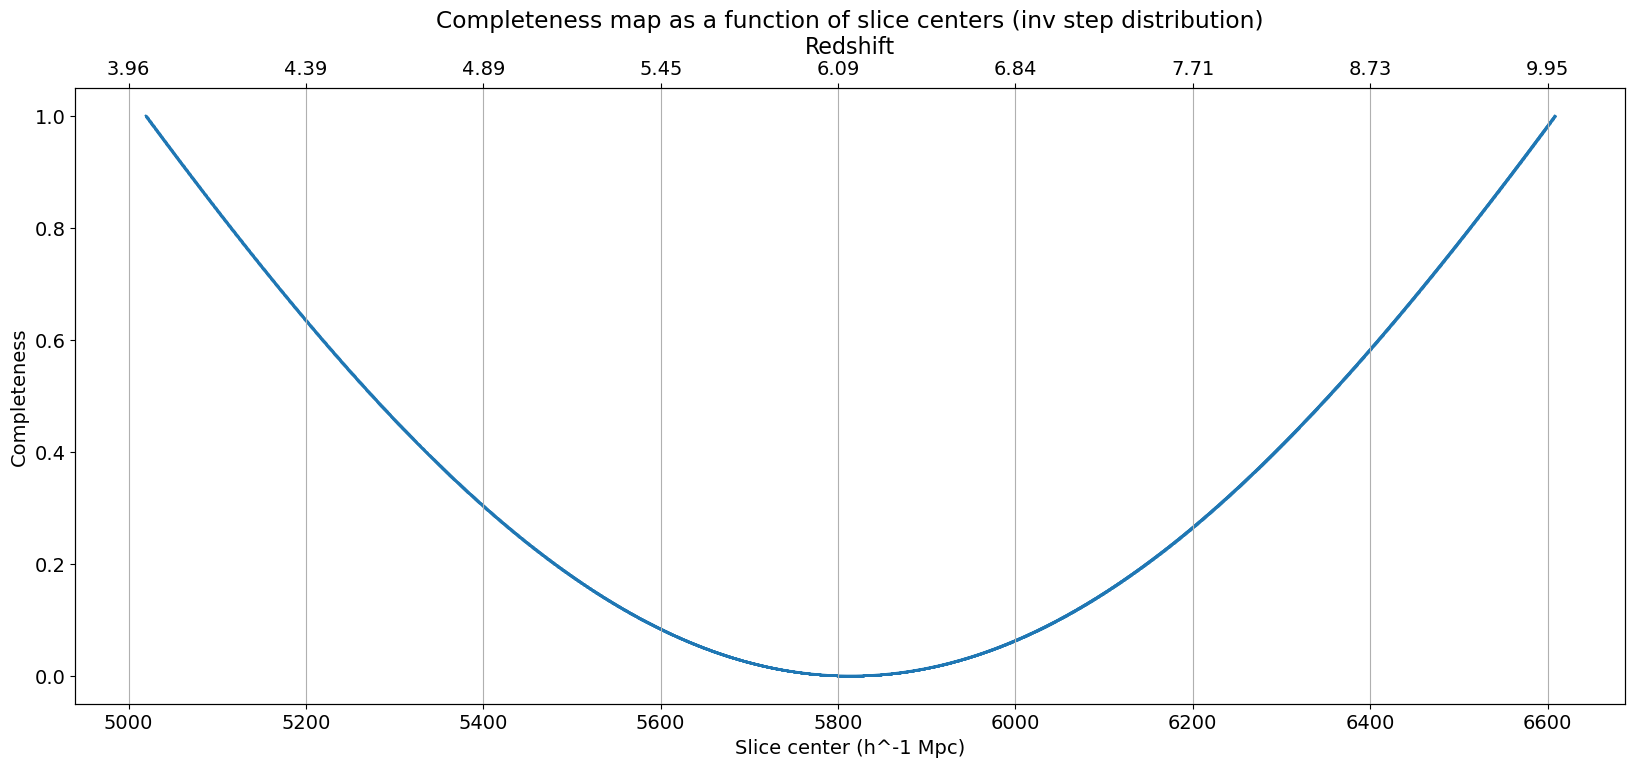

In [8]:
# I want to make a completeness map of the light cone constructed. Basically it is a function of z, which gives the fraction of the black holes in the light cone that are detected at a given redshift.
# First we have to bin the z axis into slices of 0.1 h^-1 Mpc, inorder to assign incompleteness to each slice.

import matplotlib.pyplot as plt
from astropy.cosmology import z_at_value
from astropy import units as u
import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Set the default font size
plt.rcParams['font.size'] = 14

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/MBIIbhIncompOverlf/"

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
# Define h
h = 0.7

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value * h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value * h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Now let's make another completeness map. I want the completenss map to look like a step function with multiple steps. We already have slice_centers which is the center of the slices.

# Define the number of steps
num_steps = 10

# Calculate the completeness map as a step function with multiple steps
completeness_map_steps = np.zeros(num_slices)
step_size = num_slices // num_steps

for i in range(num_steps):
    completeness_map_steps[i * step_size:(i + 1) * step_size] = (num_steps - i - 1) / (num_steps - 1)

completeness_map = completeness_map_steps

# Now I want to plot the completeness map as a function of the slice centers.

# Plot the completeness map as a function of the slice centers
fig, ax1 = plt.subplots(figsize=(20, 8))
ax1.plot(slice_centers, completeness_map, marker='.', linestyle='-', markersize=1)

# Make a second axis on top of the plot to show the redshifts corresponding to the z coordinates. I need the same number of ticks as the first axis but the 
# tick labels should be the redshifts corresponding to the z coordinates.
ax2 = ax1.twiny()
ax2.set_xlabel('Redshift', fontsize=16)

# Get the limits of the ax1 axis
ax1_xlims = ax1.get_xlim()

# Set the limits of the ax2 axis to be the same as the ax1 axis
ax2.set_xlim(ax1_xlims)

# Extract the current xtick labels
xticks = ax1.get_xticks()
# Convert the xticks to redshifts just in numbers
redshifts = [np.round(z_at_value(cosmo.comoving_distance, dist / h * u.Mpc).value,2) for dist in xticks]
# Set the xticks and labels for the top axis
ax2.set_xticks(xticks[1:-1])
ax2.set_xticklabels(redshifts[1:-1], fontsize=14)

ax1.set_xlabel('Slice center (h^-1 Mpc)')
ax1.set_ylabel('Completeness')
plt.title('Completeness map as a function of slice centers (inv step distribution)')
plt.grid(True)
plt.show()

# I want to save the completeness map to a file for later use. I will save the slice centers and the completeness values to a CSV file.
# Save the completeness map to a CSV file
completeness_data = np.column_stack((slice_centers, completeness_map))
np.savetxt(DATA_DIRECTORY + 'completeness_map_gaussinv.csv', completeness_data, delimiter=',', header='Slice center (h^-1 Mpc), Completeness', comments='')

Number of selected black holes: 112


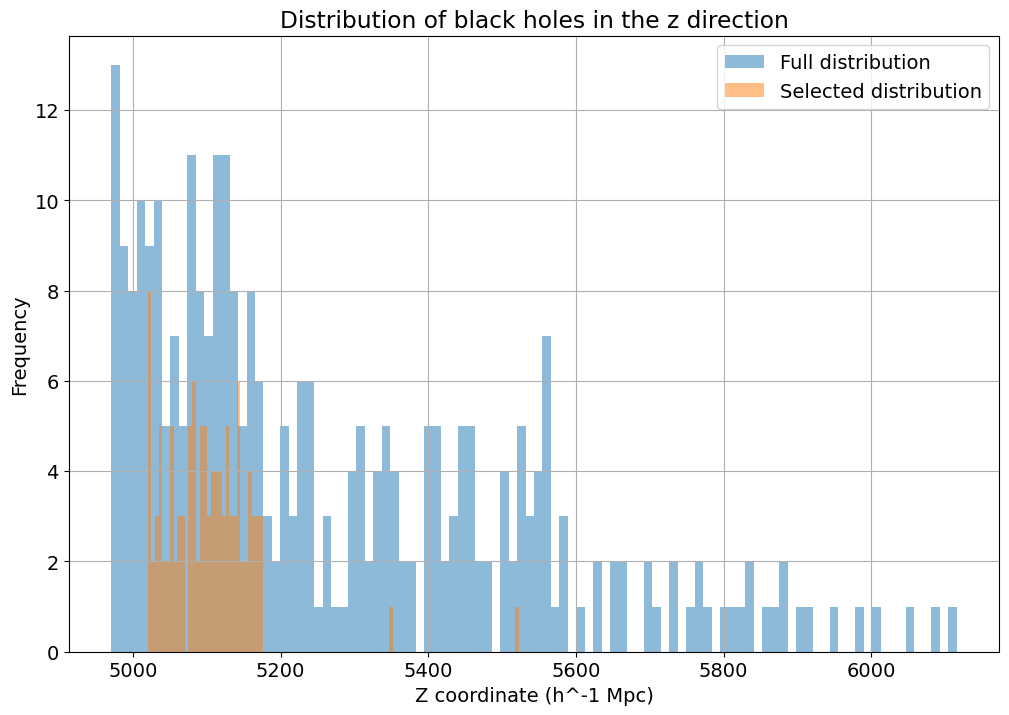

In [26]:
# The idea is to automate the process of calculating the correlation function for the full and selected black holes given the 
# completeness map. This code takes the completeness map as input and calculates the correlation function for the full and selected
# black holes and outputs the calculated correlaion function .csv files.  

import matplotlib.pyplot as plt
from astropy.cosmology import z_at_value
from astropy import units as u
import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Set the default font size
plt.rcParams['font.size'] = 14

# Define the path to data directory
DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/MBIIbhIncompOverlf/"

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
# Define h
h = 0.7

# Completenss map is basically the number of black holes that are selected from the given slice out of the total black holes in the slice.
# x_coords, y_coords, z_coords are the coordinates of the black holes in the light cone constructed.
# I want to find the slice to which each black hole belongs and choose randomly a fraction of black holes from each slice according to the completeness map.

# Import the kernel density estimation function from scikit-learn
from sklearn.neighbors import KernelDensity
# Import the DD function from Corrfunc
from Corrfunc.theory.DD import DD

# Read the completeness map from the file
completeness_data = np.loadtxt(DATA_DIRECTORY + 'completeness_map_step.csv', delimiter=',', skiprows=1)
slice_centers = completeness_data[:, 0]
completeness_map = completeness_data[:, 1]

# Import the black hole coordinates from the file
bh_coordinates = np.load(DATA_DIRECTORY + 'bh_coordinates_lightcone_p2_11lt12.npy')

# Define the number of black holes to choose for the subset
num_black_holes = 10000

# randomly draw num_black_holes from the bh_coordinates
if num_black_holes > bh_coordinates.shape[0]:
    num_black_holes = bh_coordinates.shape[0]
random_indices = np.random.choice(bh_coordinates.shape[0], num_black_holes, replace=False)
random_bh_coordinates = bh_coordinates[random_indices]

# Get the z coordinates of the black holes
z_coords = random_bh_coordinates[:, 2]

# Get the x and y coordinates of the black holes
x_coords = random_bh_coordinates[:, 0]
y_coords = random_bh_coordinates[:, 1]

# Define the subset of black holes to use for the correlation function
bh_pos_x = x_coords
bh_pos_y = y_coords
bh_pos_z = z_coords

# Define the slice size
slice_size = 0.1  # h^-1 Mpc

# Define the start and end redshifts
start_z = 4
end_z = 10

# Convert the start and end redshifts to comoving distances
start_comoving = cosmo.comoving_distance(start_z).value * h # h^-1 Mpc
end_comoving = cosmo.comoving_distance(end_z).value * h

# Calculate the number of slices
num_slices = int((end_comoving - start_comoving) / slice_size)

# Calculate the z coordinates of the slices
slice_z_coords = np.linspace(start_comoving, end_comoving, num_slices + 1)

# Calculate the center of the slices
slice_centers = (slice_z_coords[:-1] + slice_z_coords[1:]) / 2

# Assign each black hole to a slice based on its z coordinate
slice_indices = np.digitize(z_coords, slice_z_coords[1:], right=True)

# Choose a fraction of black holes from each slice based on the completeness map
selected_bh_indices = []
for i in range(1, num_slices + 1):
    slice_bh_indices = np.where(slice_indices == i)[0]
    num_bh_in_slice = len(slice_bh_indices)
    num_selected_bh = int(completeness_map[i - 1] * num_bh_in_slice)
    selected_slice_bh_indices = np.random.choice(slice_bh_indices, num_selected_bh, replace=False)
    selected_bh_indices.extend(selected_slice_bh_indices)

# Get the selected black hole coordinates
selected_bh_coordinates = random_bh_coordinates[selected_bh_indices]

# Get the z coordinates of the selected black holes
selected_z_coords = selected_bh_coordinates[:, 2]

# Get the x and y coordinates of the selected black holes
selected_x_coords = selected_bh_coordinates[:, 0]
selected_y_coords = selected_bh_coordinates[:, 1]

# Print the number of selected black holes
print(f'Number of selected black holes: {len(selected_bh_coordinates)}')

# Now I want to plot the distribution of the selected black holes in z direction and compare it with the full distribution.

# Create a histogram of the z coordinates of the selected black holes
plt.figure(figsize=(12, 8))
plt.hist(z_coords, bins=100, alpha=0.5, label='Full distribution')
plt.hist(selected_z_coords, bins=100, alpha=0.5, label='Selected distribution')
plt.xlabel('Z coordinate (h^-1 Mpc)')
plt.ylabel('Frequency')
plt.title('Distribution of black holes in the z direction')
plt.legend()
plt.grid(True)
plt.show()

# Now I want to calculate the correlation function using the selected black holes and compare it with the correlation function using all black holes.
# Full balck holes correlation function.

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 5 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.logspace(start=np.log10(1.9868), stop=np.log10(314.915), num=23) #np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILightCone_p2_11lt12_Corrfunc10k_binShen_steps.csv', index=False)

# Selected black holes correlation function.

bh_pos_x = selected_x_coords
bh_pos_y = selected_y_coords
bh_pos_z = selected_z_coords

min_x = 0
max_x = 100 # h^-1 Mpc. Here x_coords, y_coords, z_coords are in h^-1 Mpc unlike the black holes coordinates directly from the MBII data.
min_y = 0
max_y = 100

mult = 10 ## Number of random points used as a multiple of number of data points
z_bin_size = 0.005   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [0.5]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z), np.max(bh_pos_z), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.logspace(start=np.log10(1.9868), stop=np.log10(314.915), num=23) #np.arange(0.01, 100, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x, Y1 = bh_pos_y, Z1 = bh_pos_z, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    pois_err = (1 + LandSzal2pcf)/np.sqrt(np.minimum(DD_count, n_D))

from pandas import DataFrame

df = DataFrame({"r min":bins[0:-1], "r max":bins[1:], "DD count":DD_count, "DR count":DR_count, "RR count": RR_count, "Landy Szalay":LandSzal2pcf, "Pois Error":pois_err})

#Save the data to a file
df.to_csv(DATA_DIRECTORY + 'MBIILightCone_p2_11lt12_Corrfunc10k_incomp_binShen_steps.csv', index=False)

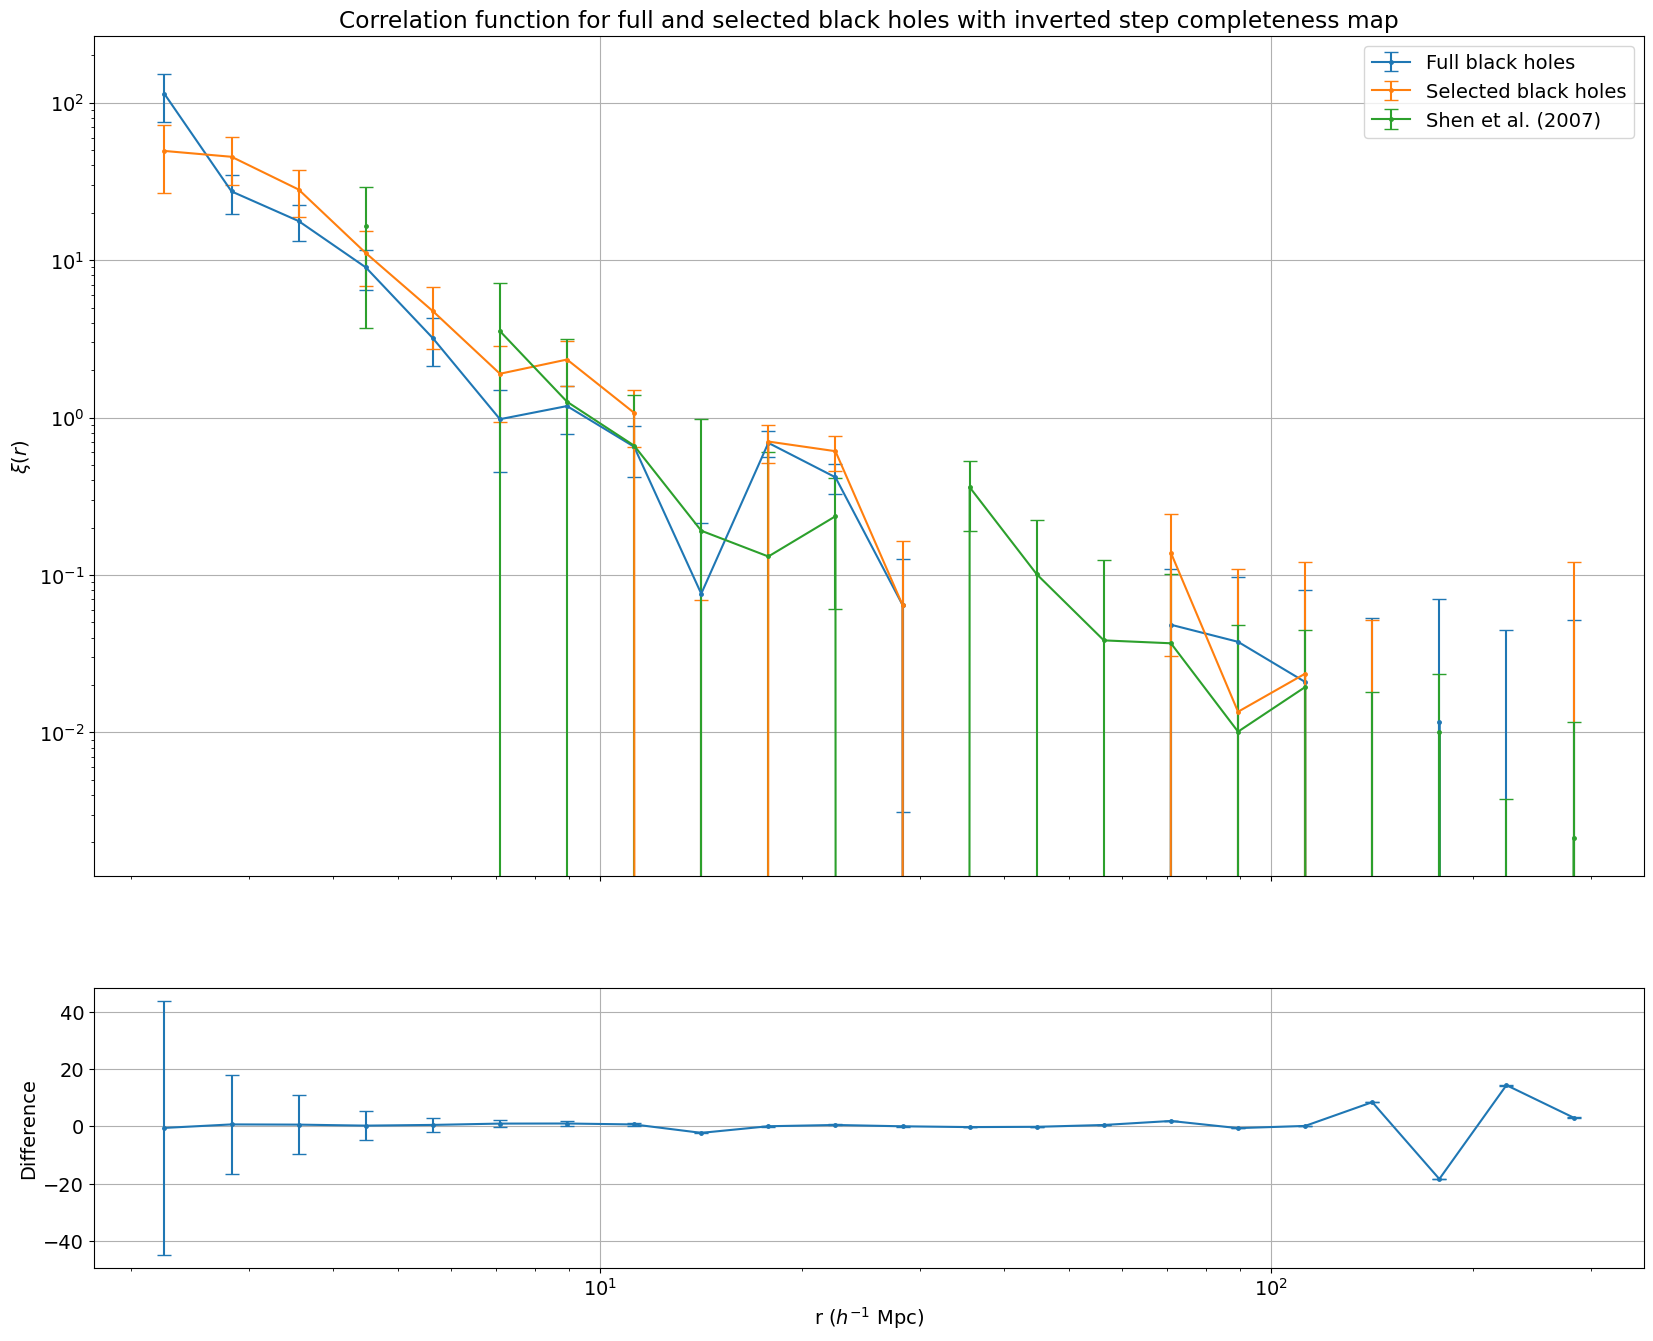

In [29]:
# Let's plot the correlation function for the full and selected black holes.

# import pandas
import pandas as pd
# import numpy ma
import numpy.ma as ma

# Load the correlation function data
corrfunc_full = pd.read_csv(DATA_DIRECTORY + 'MBIILightCone_p2_11lt12_Corrfunc10k_binShen_steps.csv')
corrfunc_selected = pd.read_csv(DATA_DIRECTORY + 'MBIILightCone_p2_11lt12_Corrfunc10k_incomp_binShen_steps.csv')

# Find the midpoint of each bin, as r_mid = (r_min + r_max) / 2
corrfunc_full['r mid'] = (corrfunc_full['r min'] + corrfunc_full['r max']) / 2
corrfunc_selected['r mid'] = (corrfunc_selected['r min'] + corrfunc_selected['r max']) / 2

# Define the Shen et al. (2007) correlation function for comparison
s_bins = np.logspace(start=np.log10(1.9868), stop=np.log10(314.915), num=23)
s_mid = (s_bins[:-1] + s_bins[1:])/2

shen_original = ma.masked_values([0, 0, 0, 16.5, 0, 3.54, 1.26, 0.663, 0.191, 0.131, 0.236, -0.280, 0.361, 0.101, 0.0384, 0.0368, 0.0101, 0.0194, -0.00396, 0.0101, -0.00296, 0.00214], 0)
shen_original_error = ma.masked_values([0, 0, 0, 12.8, 0, 3.61, 1.88, 0.733, 0.786, 0.472, 0.175, 0.223, 0.170, 0.121, 0.0862, 0.0644, 0.0382, \
                                    0.0250, 0.0219, 0.0134, 0.00672, 0.00953], 0)

# Make a subplot on the bottom showing difference between the two correlation functions.

# Plot the correlation function for the full and selected black holes
fig, ax = plt.subplots(2, 1, figsize=(20, 16), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(corrfunc_full['r mid'], corrfunc_full['Landy Szalay'], yerr=corrfunc_full['Pois Error'], label='Full black holes', fmt='.-', markersize=5, capsize=5)
ax[0].errorbar(corrfunc_selected['r mid'], corrfunc_selected['Landy Szalay'], yerr=corrfunc_selected['Pois Error'], label='Selected black holes', fmt='.-', markersize=5, capsize=5)
ax[0].set_ylabel(r'$\xi(r)$')
ax[0].set_title('Correlation function for full and selected black holes with inverted step completeness map')
ax[0].grid(True)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

# Plot the Shen et al. (2007) correlation function for comparison
ax[0].errorbar(s_mid, shen_original, yerr=shen_original_error, label='Shen et al. (2007)', fmt='.-', markersize=5, capsize=5)

# Calculate the difference between the two correlation functions
diff = (corrfunc_selected['Landy Szalay'] - corrfunc_full['Landy Szalay'])/corrfunc_full['Landy Szalay']
err = np.sqrt(corrfunc_selected['Pois Error']**2 + corrfunc_full['Pois Error']**2)

# Plot the difference between the two correlation functions
ax[1].errorbar(corrfunc_full['r mid'], diff, yerr=err, fmt='.-', markersize=5, capsize=5)
ax[1].set_xlabel(r'r ($h^{-1}$ Mpc)')
ax[1].set_ylabel('Difference')
ax[1].grid(True)
# ax[1].set_xscale('log')

ax[0].legend()

plt.show()

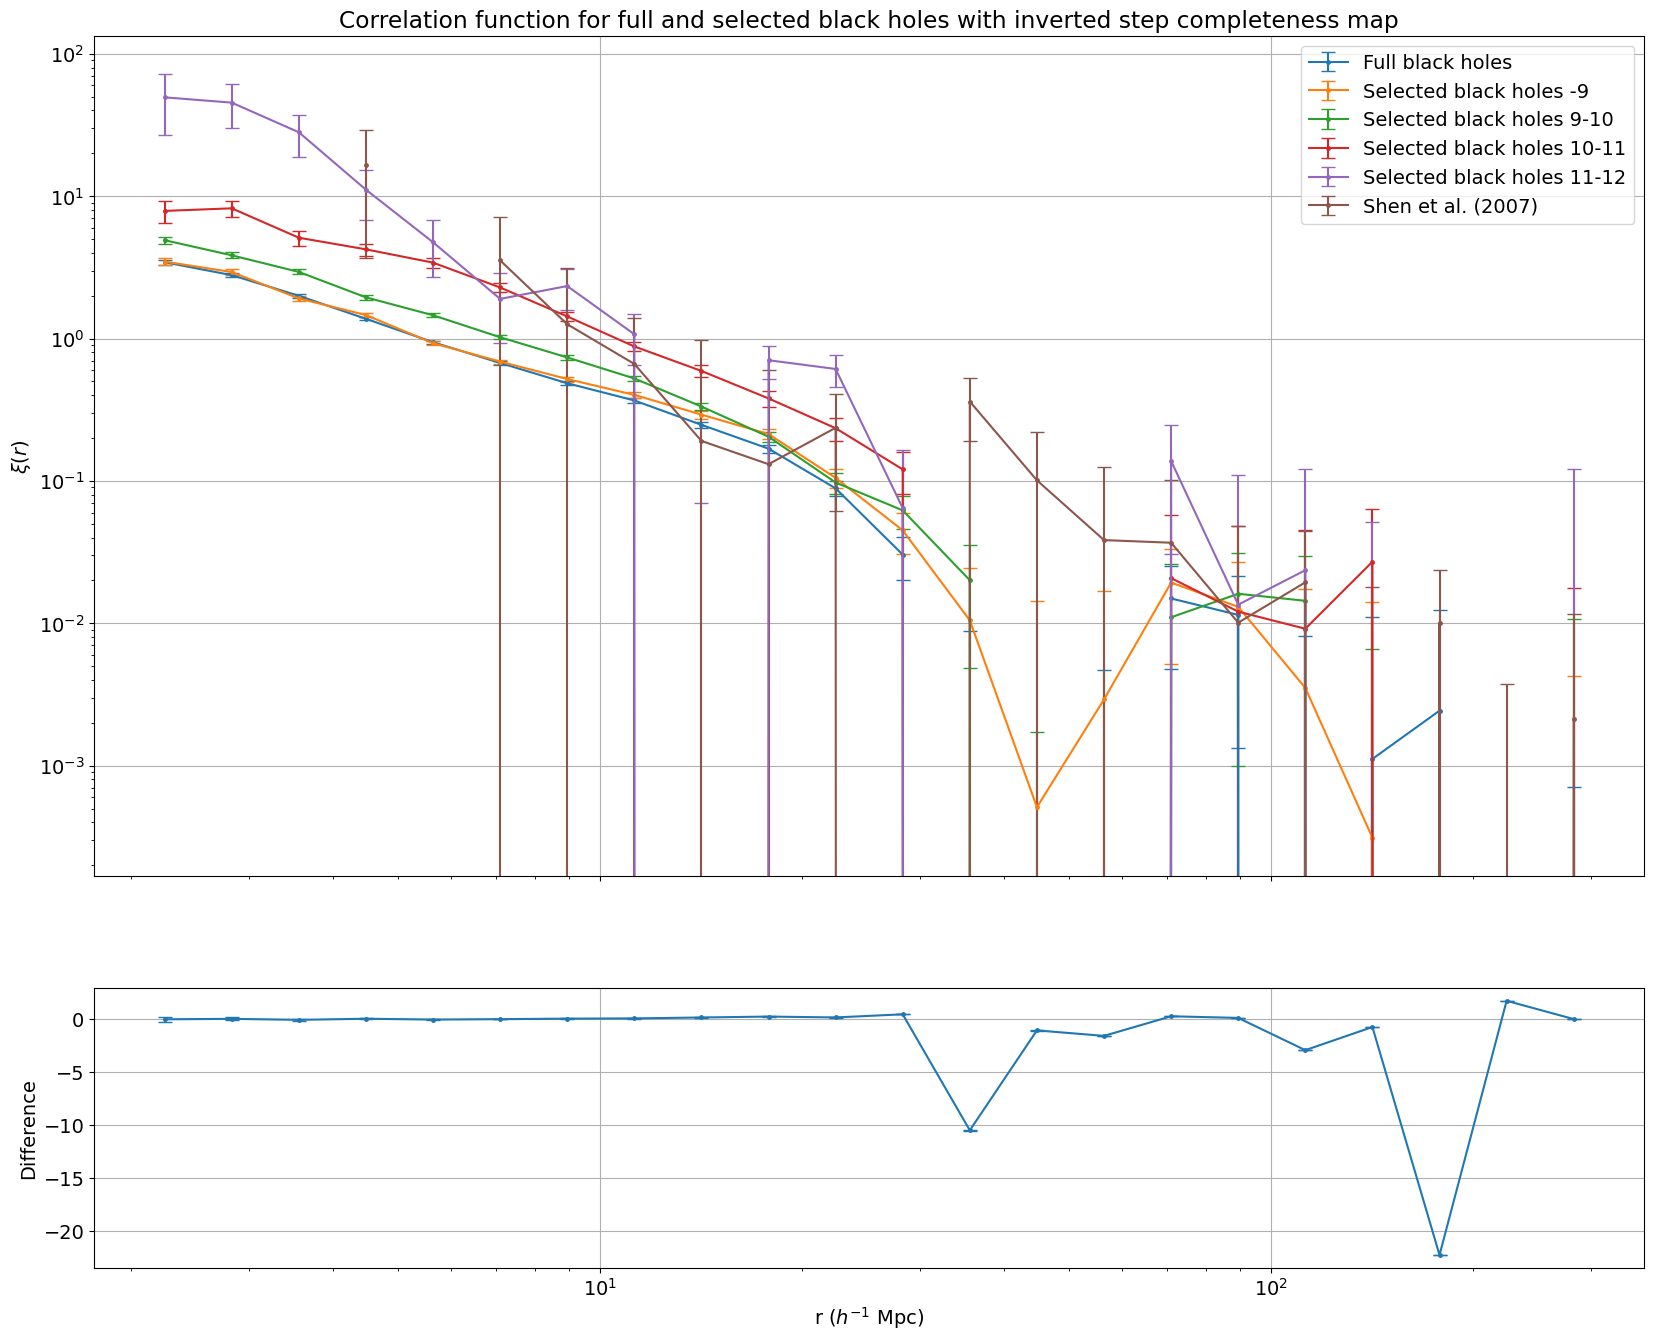

In [28]:
# Let's plot the correlation function for the full and selected black holes.

# import pandas
import pandas as pd
# import numpy ma
import numpy.ma as ma

# Load the correlation function data
corrfunc_full = pd.read_csv(DATA_DIRECTORY + 'MBIILightCone_p2_lt9_Corrfunc10k_binShen_steps.csv')
corrfunc_selected_lt9 = pd.read_csv(DATA_DIRECTORY + 'MBIILightCone_p2_lt9_Corrfunc10k_incomp_binShen_steps.csv')
corrfunc_selected_9lt10 = pd.read_csv(DATA_DIRECTORY + 'MBIILightCone_p2_9lt10_Corrfunc10k_incomp_binShen_steps.csv')
corrfunc_selected_10lt11 = pd.read_csv(DATA_DIRECTORY + 'MBIILightCone_p2_10lt11_Corrfunc10k_incomp_binShen_steps.csv')
corrfunc_selected_11lt12 = pd.read_csv(DATA_DIRECTORY + 'MBIILightCone_p2_11lt12_Corrfunc10k_incomp_binShen_steps.csv')

# Find the midpoint of each bin, as r_mid = (r_min + r_max) / 2
corrfunc_full['r mid'] = (corrfunc_full['r min'] + corrfunc_full['r max']) / 2
corrfunc_selected_lt9['r mid'] = (corrfunc_selected_lt9['r min'] + corrfunc_selected_lt9['r max']) / 2
corrfunc_selected_9lt10['r mid'] = (corrfunc_selected_9lt10['r min'] + corrfunc_selected_9lt10['r max']) / 2
corrfunc_selected_10lt11['r mid'] = (corrfunc_selected_10lt11['r min'] + corrfunc_selected_10lt11['r max']) / 2
corrfunc_selected_11lt12['r mid'] = (corrfunc_selected_11lt12['r min'] + corrfunc_selected_11lt12['r max']) / 2

# Define the Shen et al. (2007) correlation function for comparison
s_bins = np.logspace(start=np.log10(1.9868), stop=np.log10(314.915), num=23)
s_mid = (s_bins[:-1] + s_bins[1:])/2

shen_original = ma.masked_values([0, 0, 0, 16.5, 0, 3.54, 1.26, 0.663, 0.191, 0.131, 0.236, -0.280, 0.361, 0.101, 0.0384, 0.0368, 0.0101, 0.0194, -0.00396, 0.0101, -0.00296, 0.00214], 0)
shen_original_error = ma.masked_values([0, 0, 0, 12.8, 0, 3.61, 1.88, 0.733, 0.786, 0.472, 0.175, 0.223, 0.170, 0.121, 0.0862, 0.0644, 0.0382, \
                                    0.0250, 0.0219, 0.0134, 0.00672, 0.00953], 0)

# Make a subplot on the bottom showing difference between the two correlation functions.

# Plot the correlation function for the full and selected black holes
fig, ax = plt.subplots(2, 1, figsize=(20, 16), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].errorbar(corrfunc_full['r mid'], corrfunc_full['Landy Szalay'], yerr=corrfunc_full['Pois Error'], label='Full black holes', fmt='.-', markersize=5, capsize=5)
ax[0].errorbar(corrfunc_selected_lt9['r mid'], corrfunc_selected_lt9['Landy Szalay'], yerr=corrfunc_selected_lt9['Pois Error'], label='Selected black holes -9', fmt='.-', markersize=5, capsize=5)
ax[0].errorbar(corrfunc_selected_9lt10['r mid'], corrfunc_selected_9lt10['Landy Szalay'], yerr=corrfunc_selected_9lt10['Pois Error'], label='Selected black holes 9-10', fmt='.-', markersize=5, capsize=5)
ax[0].errorbar(corrfunc_selected_10lt11['r mid'], corrfunc_selected_10lt11['Landy Szalay'], yerr=corrfunc_selected_10lt11['Pois Error'], label='Selected black holes 10-11', fmt='.-', markersize=5, capsize=5)
ax[0].errorbar(corrfunc_selected_11lt12['r mid'], corrfunc_selected_11lt12['Landy Szalay'], yerr=corrfunc_selected_11lt12['Pois Error'], label='Selected black holes 11-12', fmt='.-', markersize=5, capsize=5)
ax[0].set_ylabel(r'$\xi(r)$')
ax[0].set_title('Correlation function for full and selected black holes with inverted step completeness map')
ax[0].grid(True)
ax[0].set_xscale('log')
ax[0].set_yscale('log')

# Plot the Shen et al. (2007) correlation function for comparison
ax[0].errorbar(s_mid, shen_original, yerr=shen_original_error, label='Shen et al. (2007)', fmt='.-', markersize=5, capsize=5)

# Calculate the difference between the two correlation functions
diff = (corrfunc_selected['Landy Szalay'] - corrfunc_full['Landy Szalay'])/corrfunc_full['Landy Szalay']
err = np.sqrt(corrfunc_selected['Pois Error']**2 + corrfunc_full['Pois Error']**2)

# Plot the difference between the two correlation functions
ax[1].errorbar(corrfunc_full['r mid'], diff, yerr=err, fmt='.-', markersize=5, capsize=5)
ax[1].set_xlabel(r'r ($h^{-1}$ Mpc)')
ax[1].set_ylabel('Difference')
ax[1].grid(True)
# ax[1].set_xscale('log')

ax[0].legend()

plt.show()